# DAL DATASET ALL'ALGORITMO: COME SI SVILLUPA UN MODELLO?

In questa esercitazione viene mostrato come da un semplice Dataset (in questo caso scaricato da Internet dalla community di Kaggle, (https://www.kaggle.com/?utm_source=homescreen) si riesce a sviluppare un modello (quindi un algoritmo) per prevedere una o più variabili target. Per fare questo bisogna prima però eseguire dei passaggi preliminari che son fondamentali per la cura e la precisione del modello finale (come ad esempio quelli di gestire i NaN e gli Outliers)

Il mio dataset è questo: https://www.kaggle.com/datasets/arnabchaki/data-science-salaries-2023

## FASE 1: SCEGLIERE (O CREARE), IMPORTARE E SALVARE IL DATASET

1) SCARICARE IL DATASET E INSERIRLO IN UN PATH (PER COMODITA LO METTO NELLA STESSA CARTELLA)
2) IMPORTARE LE LIBRERIE NECESSARIE: PANDAS (PER LEGGERE IL DATASET) E OS (PER GESTIRE I PATH)
3) IMPORTARE IL DATASET USANDO LE FUNZIONI DI PANDAS

Importando questa libreria e usando il comando sottostante si possono eliminare i fastiosi "warnings", cioè delle avvertenze, riguardo dei cambiamenti futuri o consigli su come è meglio usare una determinata libreria, funzione o comando di Python che useremo in questa esercitazione

In [1306]:
import warnings
warnings.filterwarnings("ignore")

### IMPORTAZIONE DEL DATASET (UNA SOLA VOLTA)

In [1307]:
import pandas as pd # Importare la libreria "Pandas" per poter gestire i Dataset
import os # Importare la libreria "os" per gestire i path

# Per importare il Dataset si possono usare due funzione di Pandas a seconda del file con cui si ha a che fare:
# 1) pd.read_csv(): per leggere il file CSV (Comma Separated Values)
# 2) pd.read_excel(): per leggere i file Excel (i classici file Excel, cioè quelli in formato XLSX)

path_del_dataset = r"C:\Users\matte\OneDrive - Scuola Paritaria S. Freud SRL\Desktop\FREUD\2°D\QUADERNI E ALTRO\ROBOTICA E AI\PYTHON\DATASET\ds_salaries.csv" # Indica la path per indicare dove si trova il file nel dispositivo, il prefisso "r" serve per evitare che ci siano confusioni nell'interpretazione della stringa, come ad esempio: numeri, caratteri speciali e backslash
dataset = pd.read_csv(path_del_dataset)

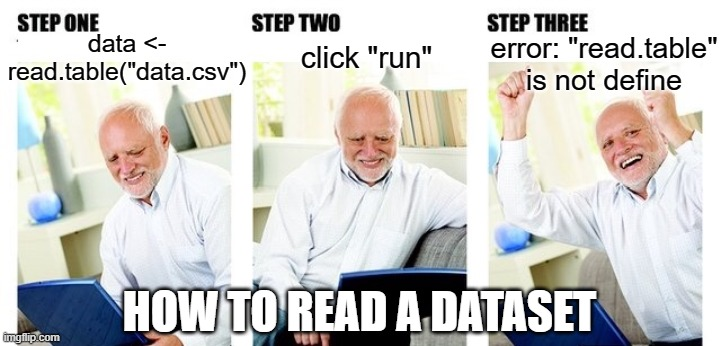

In [1308]:
from IPython.display import Image

# Specificazione del percorso del file immagine all'interno di una variabile
percorso_immagine_meme_1 = "meme how to read a dataset.jpg" # Bisogna sempre ricordarsi di specificare il tipo di file, nonchè in questo caso "jpg"

# Visualizzazione dell'immagine con l'apposito comando "Image"
Image(filename = percorso_immagine_meme_1)

## FASE 2: VISUALIZZAZIONE E ANALISI INTRODUTTIVA DEL DATASET (CON I GRAFICI)

1) STAMPARE IL DATASET
2) PER OGNI FEATURE ANALIZZARE COME SIA COMPOSTA: CIOè CHE VALORI HA NEL DETTAGLIO (TIPO UNITà DI MISURA O VALUTE)
3) ANALIZZARE COSA SIA MEGLIO TENERE O COSA INVECE è MEGLIO BUTTARE

- **Esperienza Lavorativa:**
  - Questa feature indica il livello di esperienza lavorativa del candidato. Può assumere i seguenti valori:
    - SE (Senior)
    - MI (Mid-level)
    - EN (Entry-level)

- **Tipo di Impiego:**
  - Questa feature specifica il tipo di impiego svolto dal candidato. Può essere:
    - FT (Full-time)
    - CT (Contract)


In [1309]:
dataset # Stampare il Dataset serve per poterlo analizzare nel dettaglio meglio, come ad esempio visualizzare le Feature e le istanze per decidere cose sia meglio tenere e cosa invece sia meglio eliminare
# Scrivendo solo il nome del dataset, quest'ultimo si stamperà (solo la parte iniziale e finale)

work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0       80000             EUR          85847                 ES           100   
1       30000             USD          30000                 US           100   
2       25500             USD          25500                 US           100   
3      175000             USD         175000                 CA           100   
4      120000             USD         120000                 CA           100   
...       ...             ...            ...                ...           ...   
3750   412000             USD         412000                 US           100   
3751   151000             USD         151000                 US           100   
3752   105000             USD         105000                 US           100   
3753   100000             USD         100000                 US           100   
3754  7000000             INR          94665                 IN            50   

     company_location company_size  
0                  ES            L  
1                  US            S  
2                  US            S  
3                  CA            M  
4                  CA            M  
...               ...          ...  
3750               US            L  
3751               US            L  
3752               US            S  
3753               US            L  
3754               IN            L  

[3755 rows x 11 columns]

In [1310]:
print("le Feature del dataset sono:")
dataset.columns

le Feature del dataset sono:


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [1311]:
feature_dataset = dataset.columns
print("le Feature del dataset sono:")
feature_dataset

le Feature del dataset sono:


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

### ANALISI DELLE OCCORRENZE DELLE FEATURE NEL DATASET

In [1312]:
# Stampare i valori unici (unique), nonchè tutti i possibili output per ogni Feature, serve per analizzare meglio il Dataset nel dettaglio di ogni Feature e capire così tutti i possibili ambiti del Dataset
for column in feature_dataset:
    print(f"Le occorrenze di {column} sono:") # All'inizio viene stampata una stringa di testo esplicativa
    print(dataset[column].unique()) # Poi con "unique" si stampano i veri e propri valori unici
    quantità_occorrenze_feature=(len(dataset[column].unique())) # Poi con "unique" si stampano i veri e propri valori unici
    print(f"Quindi ci sono {quantità_occorrenze_feature} occorrenze in questa Feature")
    print() # Il print con nulla all'interno delle parentesi serve per lasciare uno spazio tra una Feature e l'altra, quando non si inserisce una stringa di testo o una variabile allora viene in automatico questo

Le occorrenze di work_year sono:
[2023 2022 2020 2021]
Quindi ci sono 4 occorrenze in questa Feature

Le occorrenze di experience_level sono:
['SE' 'MI' 'EN' 'EX']
Quindi ci sono 4 occorrenze in questa Feature

Le occorrenze di employment_type sono:
['FT' 'CT' 'FL' 'PT']
Quindi ci sono 4 occorrenze in questa Feature

Le occorrenze di job_title sono:
['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data En

In [1313]:
for column in feature_dataset:
    print(f"Numero di occorrenze per ogni valore di {column}:") # All'inizio viene stampata una stringa di testo esplicativa
    print(dataset[column].value_counts()) # Con "value_counts" si contano i valori, in questo caso per ogni occorrenza di ogni colonna (Feature) del Dataset
    print()

Numero di occorrenze per ogni valore di work_year:
2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

Numero di occorrenze per ogni valore di experience_level:
SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

Numero di occorrenze per ogni valore di employment_type:
FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

Numero di occorrenze per ogni valore di job_title:
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

Numero di 

### GRAFICI INTRODUTTIVI GENERALI AL DATASET (DATASET NON ANCORA MODIFICATO)

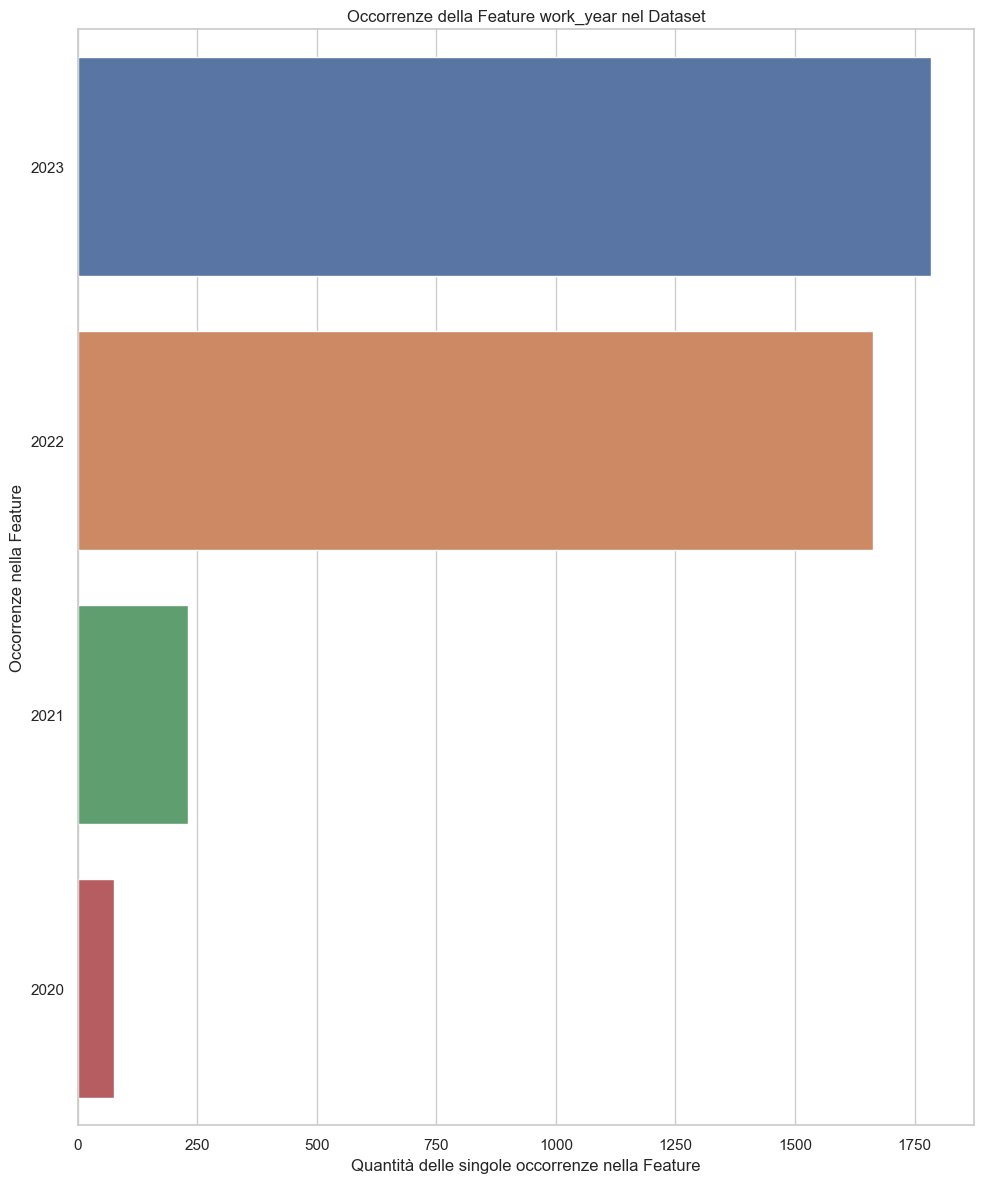

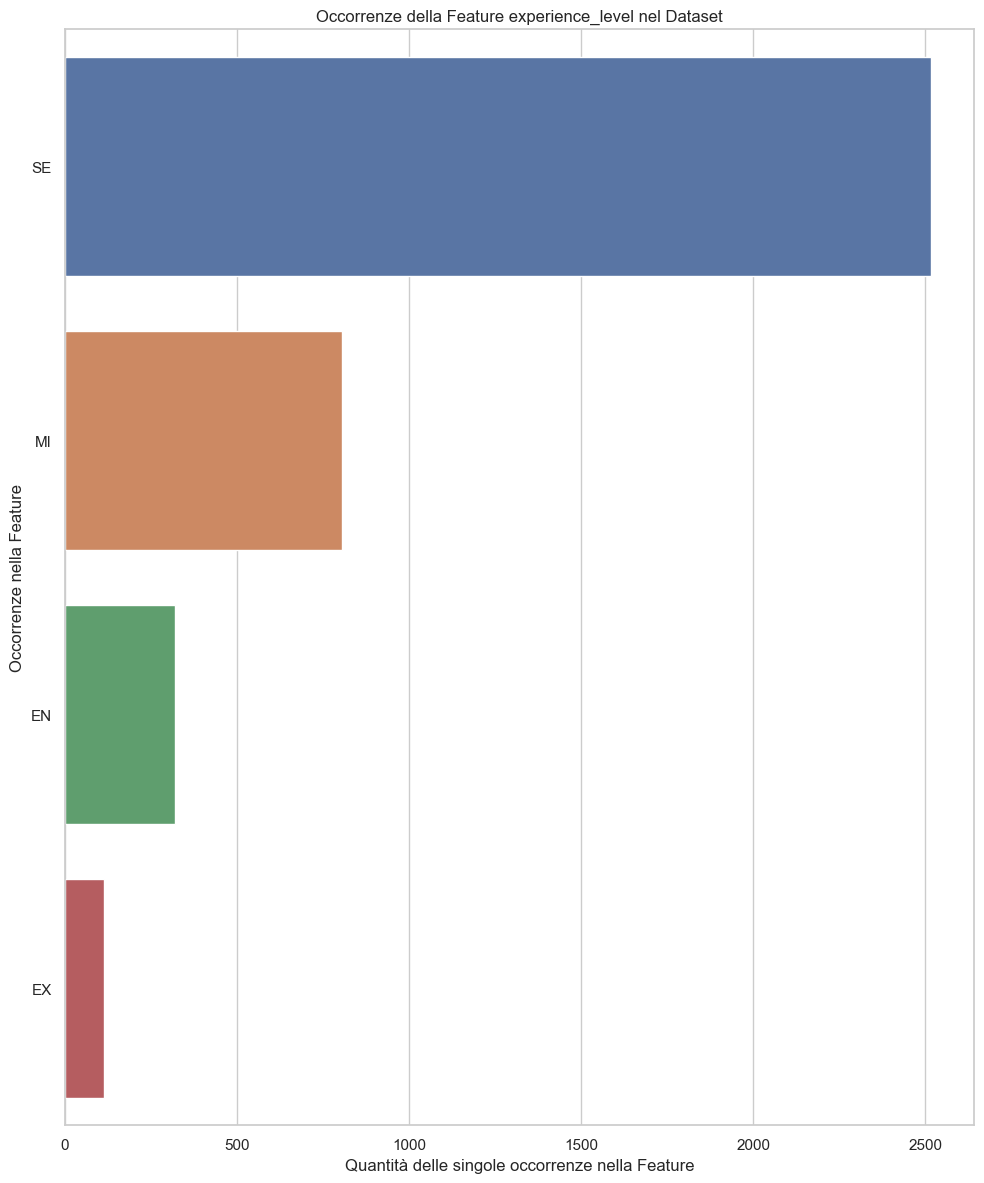

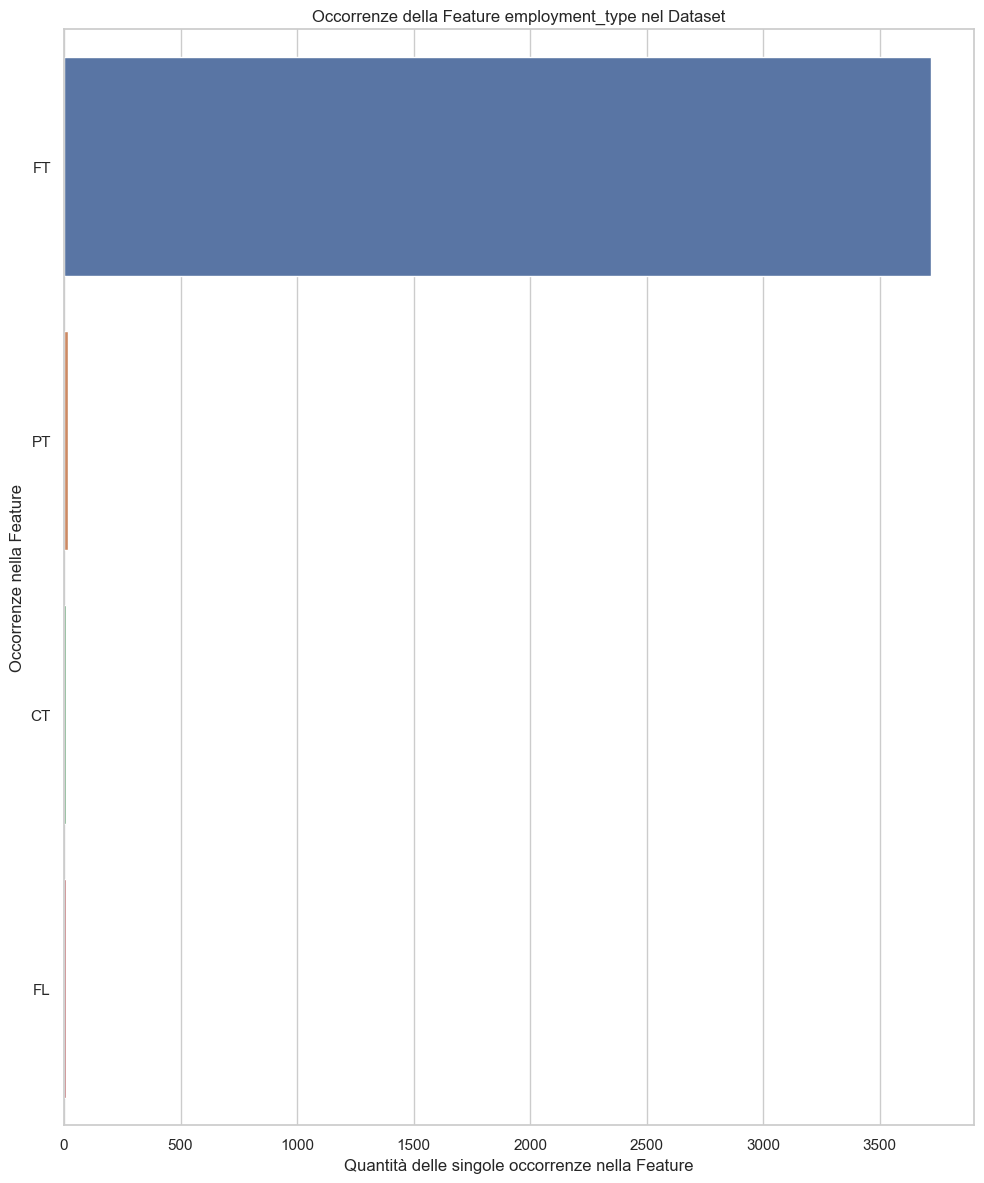

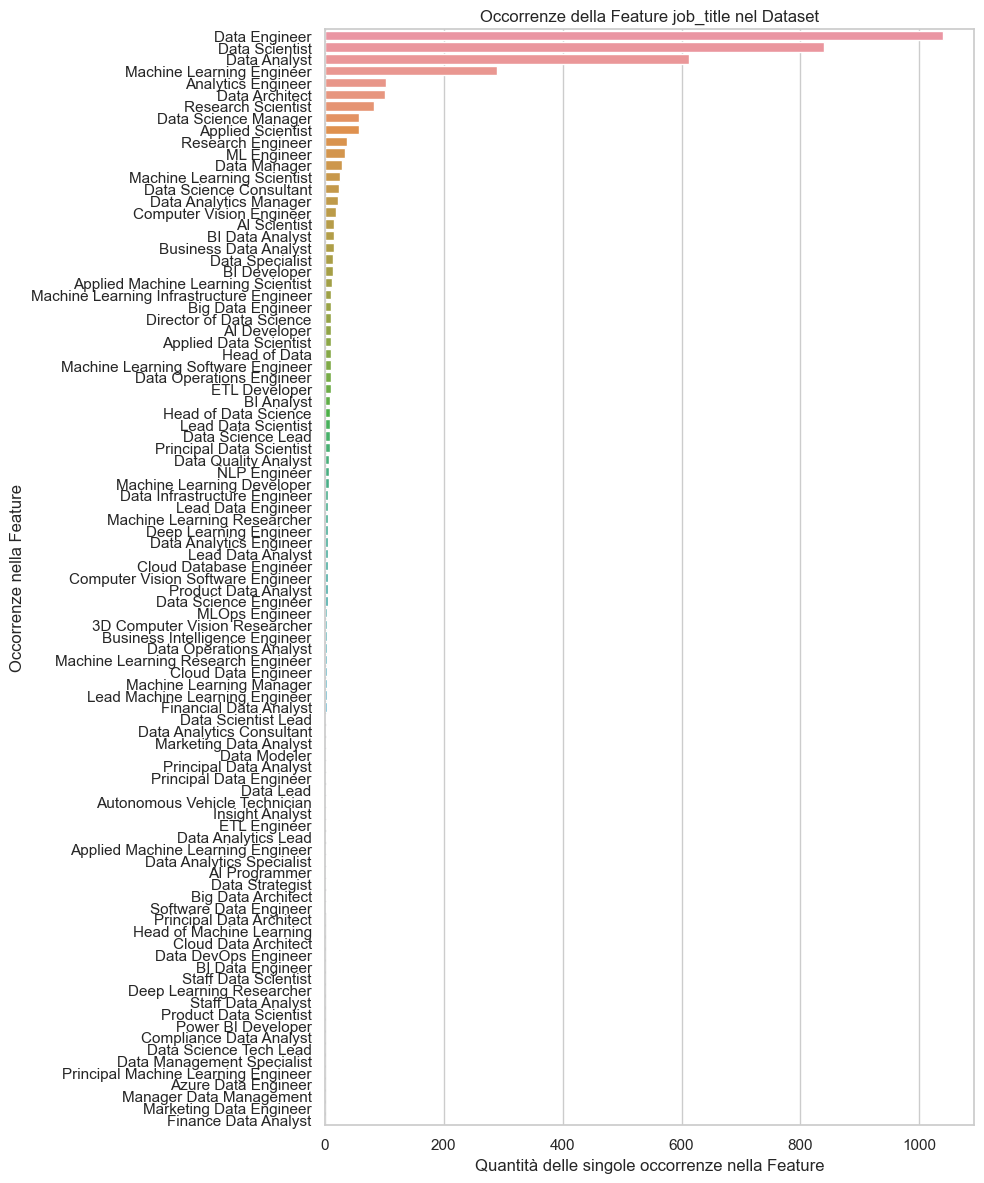

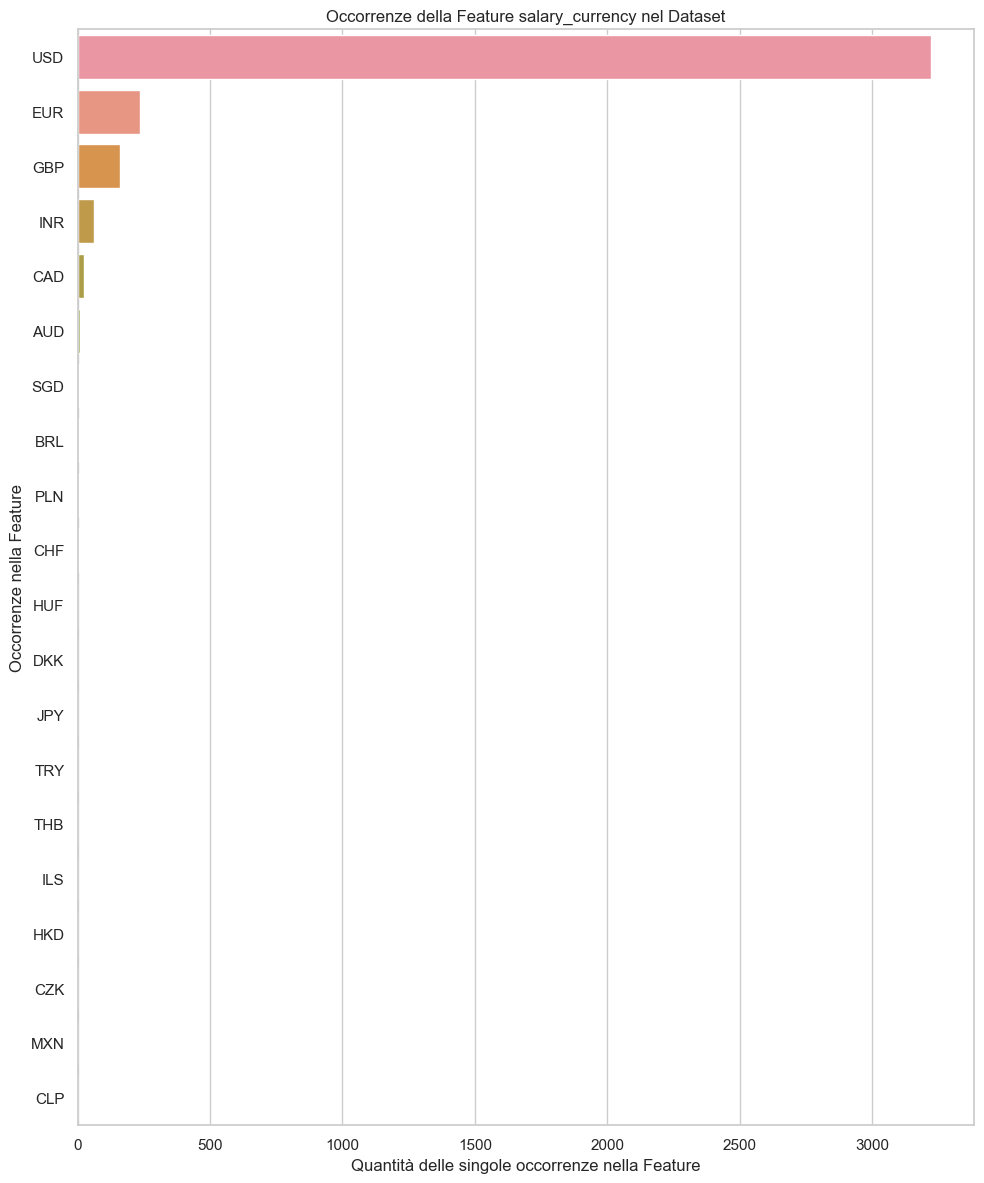

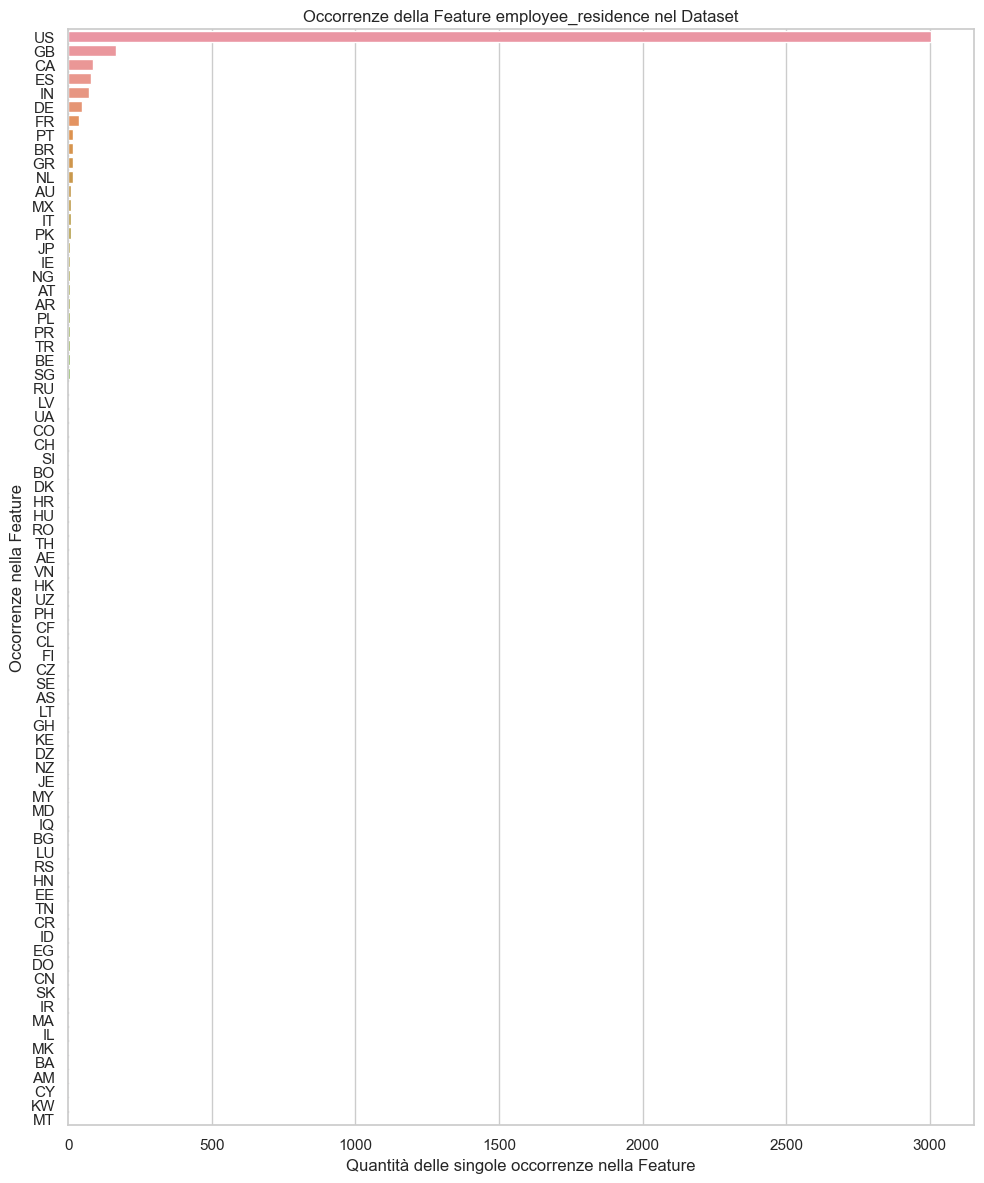

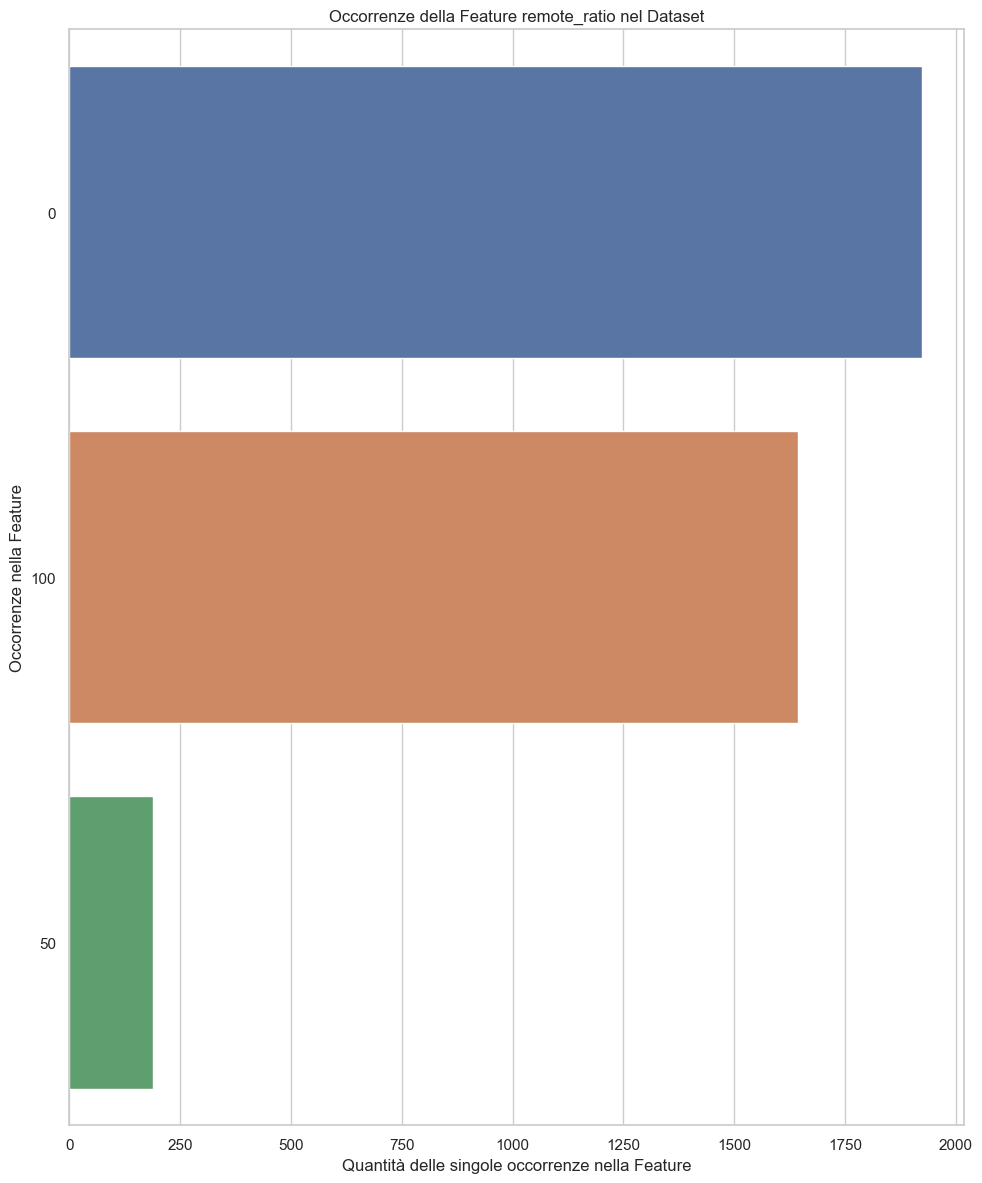

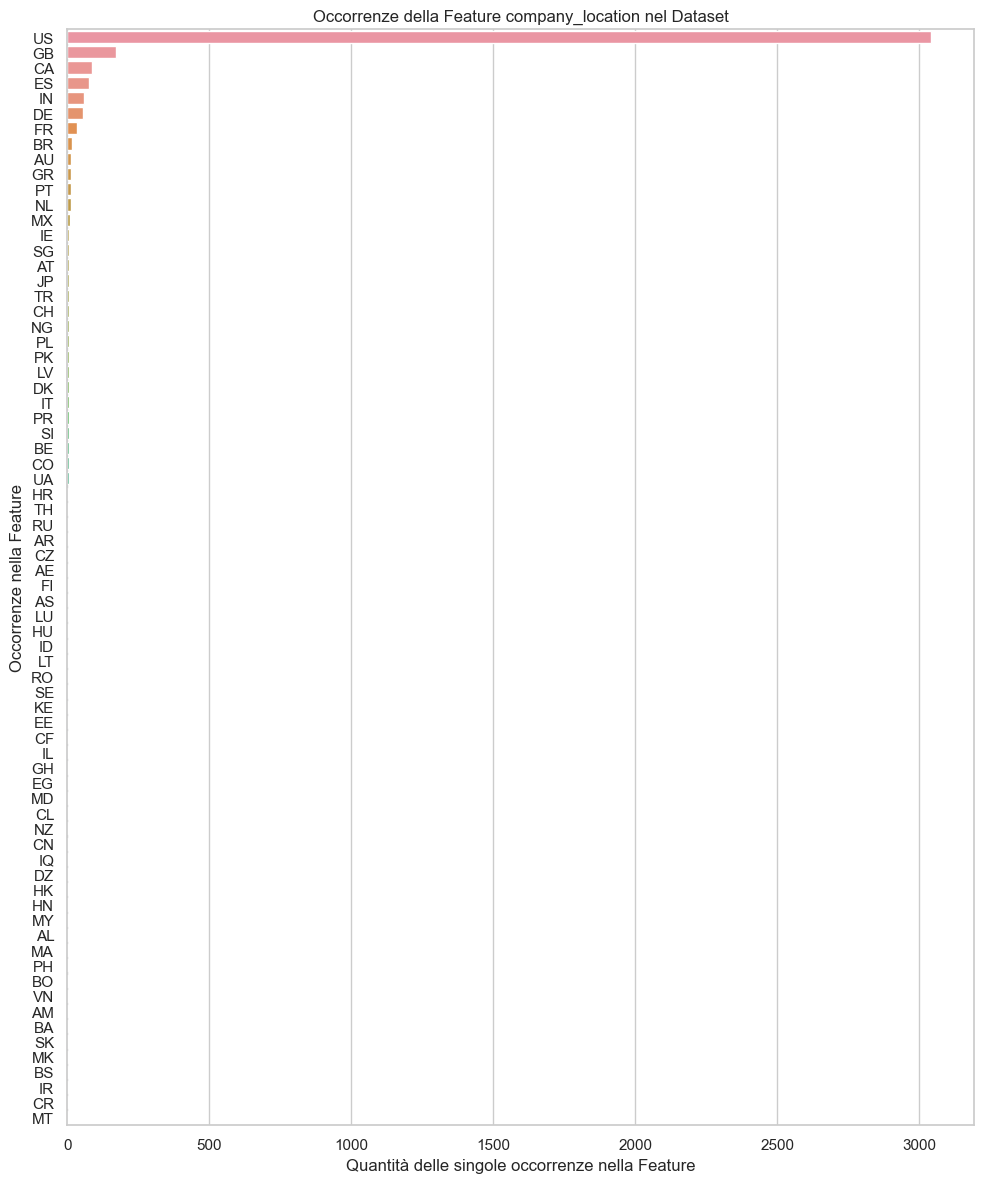

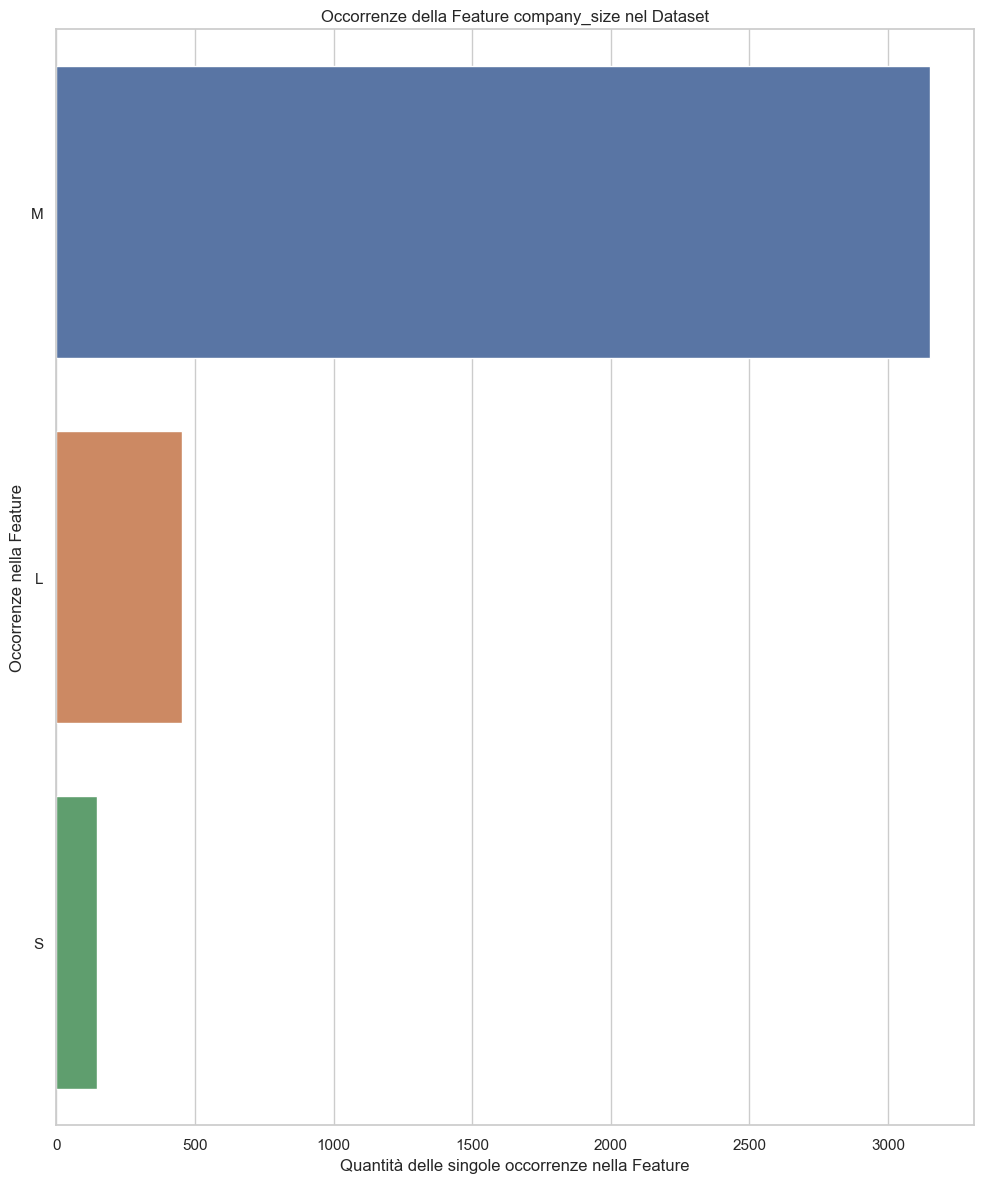

In [1314]:
import matplotlib.pyplot as plt
import seaborn as sns

# Impostazione dello stile di visualizzazione per i grafici
sns.set(style = "whitegrid")

# Definizione delle feature per le quali si vuole fare il grafico delle occorrenze (nonchè quelle più interessanti e non tutte)
feature_interessanti = ["work_year", "experience_level", "employment_type", "job_title", "salary_currency", "employee_residence", "remote_ratio", "company_location", "company_size"]

# Creazione dei grafici per ogni feature attraverso un "comodo" ciclo for
for feature in feature_interessanti:
    plt.figure(figsize=(10, 12))  # Imposta le dimensioni del grafico, nel figsize prima si indica la larghezza e poi dopo la virgola l'altezza del grafico
    sns.countplot(y = feature, data = dataset, order = dataset[feature].value_counts().index)  # Crea il grafico a barre indicando i valori di y, da dove prendere i dati (nel data), poi conta i valori e infine "index" restituisce gli indici della serie, che rappresentano i valori unici delle diverse Feature, ordinati in base al conteggio decrescente
    plt.title(f"Occorrenze della Feature {feature} nel Dataset") # Permette di inserire il titolo del grafico con una semplice stringa
    plt.xlabel(f"Quantità delle singole occorrenze nella Feature")  # Etichetta l'asse x
    plt.ylabel(f"Occorrenze nella Feature") # Etichetta l'asse y, cioè quindi le occorrenze per ogni Feature
    plt.tight_layout() # Ottimizza lo spaziamento per evitare sovrapposizioni tra i diversi nomi nei due assi
    plt.show() # Plotta, cioè stampa, il grafico finale

In [1315]:
# Trova i 10 salari più alti all'interno della colonna "salary"
valori_salary_disumani = dataset["salary"].nlargest(10)
# Itera sui valori dell'indice dei 10 valori maggiori di "salary" e aggiunge informazioni aggiuntive
for index in valori_salary_disumani.index:
    # Ottiene il singolo valore di salario dall'elenco dei 10 salari più alti usando il suo indice
    valore_salary_disumano = valori_salary_disumani.loc[index]
    # Ottiene la posizione dell'azienda nella colonna "company_location" del dataset usando l'indice
    valore_company_location = dataset.loc[index, "company_location"]
    # Ottiene la dimensione dell'azienda nella colonna "company_size" del dataset usando l'indice
    valore_company_size = dataset.loc[index, "company_size"]
    # Ottiene il titolo di lavoro nella colonna "job_title" del dataset usando l'indice
    valore_job_title = dataset.loc[index, "job_title"]
    # Stampa le informazioni
    print(f"Un esempio di salario disumano è {valore_salary_disumano} e la persona in questione lavora in una società/azienda in {valore_company_location} in un'azienda di tipo {valore_company_size} e nello specifico è un {valore_job_title}")

Un esempio di salario disumano è 30400000 e la persona in questione lavora in una società/azienda in CL in un'azienda di tipo L e nello specifico è un Data Scientist
Un esempio di salario disumano è 11000000 e la persona in questione lavora in una società/azienda in US in un'azienda di tipo L e nello specifico è un BI Data Analyst
Un esempio di salario disumano è 11000000 e la persona in questione lavora in una società/azienda in HU in un'azienda di tipo L e nello specifico è un Data Scientist
Un esempio di salario disumano è 8500000 e la persona in questione lavora in una società/azienda in JP in un'azienda di tipo S e nello specifico è un ML Engineer
Un esempio di salario disumano è 7500000 e la persona in questione lavora in una società/azienda in IN in un'azienda di tipo L e nello specifico è un Lead Machine Learning Engineer
Un esempio di salario disumano è 7000000 e la persona in questione lavora in una società/azienda in JP in un'azienda di tipo S e nello specifico è un ML Engin

## FASE 3: MODIFICA DEL DATASET (CON I GRAFICI) E CREAZIONE DEL DATASET RIDOTTO

1) VOGLIAMO MODIFICARE IL DATASET CONSIDERANDO SOLO TRE FEATURES E CON TUTTI I SALARI IN DOLLARI 
2) ELIMINARE LE FEATURE INUTILI AL NOSTRO ALGORITMO FINALE
3) SALVARE SOVRASCRIVENDO IL DATASET
4) STAMPARE IL NUOVO DATASET PER VERIFICARE SE LE OPERAZIONE FATTE PRECEDENENTE HANNO AVUTO UN SEGUITO POSITIVO

TUTTE LE MODIFICHE VENGONO FATTE SU UN DATASET CLONE, IN MODO POI DA POTERLO COMPARARE CON L'ORIGINALE

### CREAZIONE DEL DATASET RIDOTTO

In [1316]:
job_titles = ["Data Scientist", "Machine Learning Engineer", "Data Analyst", "Data Engineer", "Data Architect", "Business Intelligence Engineer", "Data Strategist", "Data Quality Analyst", "Data Science Manager", "Data Operations Engineer"]
dataset_ridotto = dataset[dataset["job_title"].isin(job_titles)] # Con "isin" si filtrano i valori della colonna indicata e poi dentro la parentesi si indicano quali valori nuovi inseire nella Feature
dataset_ridotto["job_title"].unique() # Stampa tutti le correlazioni per quella colonna aggiornata per il dataset ridotto

array(['Data Scientist', 'Data Analyst', 'Business Intelligence Engineer',
       'Machine Learning Engineer', 'Data Strategist', 'Data Engineer',
       'Data Quality Analyst', 'Data Architect', 'Data Science Manager',
       'Data Operations Engineer'], dtype=object)

In [1317]:
print("Le nuove occorrenze di job title nel Dataset ridotto sono:")
print(dataset_ridotto["job_title"].unique())

Le nuove occorrenze di job title nel Dataset ridotto sono:
['Data Scientist' 'Data Analyst' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Data Quality Analyst' 'Data Architect' 'Data Science Manager'
 'Data Operations Engineer']


In [1318]:
print("Il nuovo numero di occorrenze di job title nel Dataset ridotto è:")
print(len(dataset_ridotto["job_title"]))

Il nuovo numero di occorrenze di job title nel Dataset ridotto è:
2963


In [1319]:
dataset_ridotto = dataset[dataset["salary_currency"] == "USD"] # Filtra le righe (istanze) del dataset in cui i valori di salary currency è "USD"
dataset_ridotto["salary_currency"].unique() # Controlla che l'unico valore in salary currency sia "USD"

array(['USD'], dtype=object)

In [1320]:
print("Le nuove occorrenze di salary_currency nel Dataset ridotto sono:")
print(dataset_ridotto["salary_currency"].unique())

Le nuove occorrenze di salary_currency nel Dataset ridotto sono:
['USD']


In [1321]:
print("Il nuovo numero di occorrenze di salary_currency nel Dataset ridotto è:")
print(len(dataset_ridotto["salary_currency"]))

Il nuovo numero di occorrenze di salary_currency nel Dataset ridotto è:
3224


In [1322]:
dataset_ridotto = dataset[dataset["company_location"] == "US"] # Filtra le righe (istanze) del dataset in cui i valori di company location è "US"
dataset_ridotto["company_location"].unique() # Controlla che l'unico valore in company location sia "US"

array(['US'], dtype=object)

In [1323]:
print("Le nuove occorrenze di company_location nel Dataset ridotto sono:")
print(dataset_ridotto["company_location"].unique())

Le nuove occorrenze di company_location nel Dataset ridotto sono:
['US']


In [1324]:
print("Il nuovo numero di occorrenze di company_location nel Dataset ridotto è:")
print(len(dataset_ridotto["company_location"]))

Il nuovo numero di occorrenze di company_location nel Dataset ridotto è:
3040


In [1325]:
dataset_ridotto

work_year experience_level employment_type                 job_title  \
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
5          2023               SE              FT         Applied Scientist   
6          2023               SE              FT         Applied Scientist   
9          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3749       2021               SE              FT           Data Specialist   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   

      salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
1      30000             USD          30000                 US           100   
2      25500             USD          25500                 US           100   
5     222200             USD         222200                 US             0   
6     136000             USD         136000                 US             0   
9     147100             USD         147100                 US             0   
...      ...             ...            ...                ...           ...   
3749  165000             USD         165000                 US           100   
3750  412000             USD         412000                 US           100   
3751  151000             USD         151000                 US           100   
3752  105000             USD         105000                 US           100   
3753  100000             USD         100000                 US           100   

     company_location company_size  
1                  US            S  
2                  US            S  
5                  US            L  
6                  US            L  
9                  US            M  
...               ...          ...  
3749               US            L  
3750               US            L  
3751               US            L  
3752               US            S  
3753               US            L  

[3040 rows x 11 columns]

In [1326]:
dataset

work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0       80000             EUR          85847                 ES           100   
1       30000             USD          30000                 US           100   
2       25500             USD          25500                 US           100   
3      175000             USD         175000                 CA           100   
4      120000             USD         120000                 CA           100   
...       ...             ...            ...                ...           ...   
3750   412000             USD         412000                 US           100   
3751   151000             USD         151000                 US           100   
3752   105000             USD         105000                 US           100   
3753   100000             USD         100000                 US           100   
3754  7000000             INR          94665                 IN            50   

     company_location company_size  
0                  ES            L  
1                  US            S  
2                  US            S  
3                  CA            M  
4                  CA            M  
...               ...          ...  
3750               US            L  
3751               US            L  
3752               US            S  
3753               US            L  
3754               IN            L  

[3755 rows x 11 columns]

### ELIMINAZIONE DEGLI ANNI 2020, 2021, 2022 PER ENTRAMBI I DATASET

#### PER IL DATASET

In [1327]:
dataset = dataset[dataset["work_year"] == 2023] # Filtra le righe (istanze) dal Dataset in cui i valori (le occorrenze) di work_year sono "2023"
dataset["work_year"].unique() # Controlla che l'unico valore in work_year sia "2023"

array([2023], dtype=int64)

In [1328]:
print("Le nuove occorrenze di work_year nel Dataset sono:")
print(dataset["work_year"].unique())

Le nuove occorrenze di work_year nel Dataset sono:
[2023]


In [1329]:
print("Il nuovo numero di occorrenze di work_year nel Dataset è:")
print(len(dataset["work_year"]))

Il nuovo numero di occorrenze di work_year nel Dataset è:
1785


In [1330]:
dataset

work_year experience_level employment_type                  job_title  \
0          2023               SE              FT   Principal Data Scientist   
1          2023               MI              CT                ML Engineer   
2          2023               MI              CT                ML Engineer   
3          2023               SE              FT             Data Scientist   
4          2023               SE              FT             Data Scientist   
...         ...              ...             ...                        ...   
1815       2023               SE              FT  Machine Learning Engineer   
1817       2023               MI              FT             Data Scientist   
1818       2023               MI              FT             Data Scientist   
1819       2023               EN              FT              Data Engineer   
1820       2023               EN              FT              Data Engineer   

      salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0      80000             EUR          85847                 ES           100   
1      30000             USD          30000                 US           100   
2      25500             USD          25500                 US           100   
3     175000             USD         175000                 CA           100   
4     120000             USD         120000                 CA           100   
...      ...             ...            ...                ...           ...   
1815  134500             USD         134500                 US             0   
1817  130000             USD         130000                 US             0   
1818   90000             USD          90000                 US             0   
1819  160000             USD         160000                 US             0   
1820  135000             USD         135000                 US             0   

     company_location company_size  
0                  ES            L  
1                  US            S  
2                  US            S  
3                  CA            M  
4                  CA            M  
...               ...          ...  
1815               US            L  
1817               US            M  
1818               US            M  
1819               US            M  
1820               US            M  

[1785 rows x 11 columns]

#### PER IL DATASET RIDOTTO

In [1331]:
dataset_ridotto = dataset_ridotto[dataset_ridotto["work_year"] == 2023] # Filtra le righe (istanze) dal Dataset ridotto in cui i valori (le occorrenze) di work_year sono "2023"
dataset_ridotto["work_year"].unique() # Controlla che l'unico valore in work_year sia "2023"

array([2023], dtype=int64)

In [1332]:
print("Le nuove occorrenze di work_year nel Dataset ridotto sono:")
print(dataset_ridotto["work_year"].unique())

Le nuove occorrenze di work_year nel Dataset ridotto sono:
[2023]


In [1333]:
print("Il nuovo numero di occorrenze di work_year nel Dataset ridotto è:")
print(len(dataset_ridotto["work_year"]))

Il nuovo numero di occorrenze di work_year nel Dataset ridotto è:
1570


In [1334]:
dataset_ridotto

work_year experience_level employment_type                  job_title  \
1          2023               MI              CT                ML Engineer   
2          2023               MI              CT                ML Engineer   
5          2023               SE              FT          Applied Scientist   
6          2023               SE              FT          Applied Scientist   
9          2023               SE              FT             Data Scientist   
...         ...              ...             ...                        ...   
1815       2023               SE              FT  Machine Learning Engineer   
1817       2023               MI              FT             Data Scientist   
1818       2023               MI              FT             Data Scientist   
1819       2023               EN              FT              Data Engineer   
1820       2023               EN              FT              Data Engineer   

      salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
1      30000             USD          30000                 US           100   
2      25500             USD          25500                 US           100   
5     222200             USD         222200                 US             0   
6     136000             USD         136000                 US             0   
9     147100             USD         147100                 US             0   
...      ...             ...            ...                ...           ...   
1815  134500             USD         134500                 US             0   
1817  130000             USD         130000                 US             0   
1818   90000             USD          90000                 US             0   
1819  160000             USD         160000                 US             0   
1820  135000             USD         135000                 US             0   

     company_location company_size  
1                  US            S  
2                  US            S  
5                  US            L  
6                  US            L  
9                  US            M  
...               ...          ...  
1815               US            L  
1817               US            M  
1818               US            M  
1819               US            M  
1820               US            M  

[1570 rows x 11 columns]

### ELIMINAZIONE DELLE FEATURE NON IMPORTANTI PER ENTRAMBI I DATASET

#### PER IL DATASET

In [1335]:
dataset = dataset[["experience_level","job_title","salary","company_location"]] # Filtra solo le feature scelte (cioè solo quelle che si ritengono necessarie) e il target (salary). Le altre features non scritte veranno automaticamente eliminate dal dataset
dataset

experience_level                  job_title  salary company_location
0                  SE   Principal Data Scientist   80000               ES
1                  MI                ML Engineer   30000               US
2                  MI                ML Engineer   25500               US
3                  SE             Data Scientist  175000               CA
4                  SE             Data Scientist  120000               CA
...               ...                        ...     ...              ...
1815               SE  Machine Learning Engineer  134500               US
1817               MI             Data Scientist  130000               US
1818               MI             Data Scientist   90000               US
1819               EN              Data Engineer  160000               US
1820               EN              Data Engineer  135000               US

[1785 rows x 4 columns]

#### PER IL DATASET RIDOTTO

In [1336]:
dataset_ridotto = dataset_ridotto[["experience_level","job_title","salary","company_location"]] # Filtra solo le feature scelte (cioè solo quelle che si ritengono necessarie) e il target (salary). Le altre features non scritte veranno automaticamente eliminate dal dataset ridotto
dataset_ridotto

experience_level                  job_title  salary company_location
1                  MI                ML Engineer   30000               US
2                  MI                ML Engineer   25500               US
5                  SE          Applied Scientist  222200               US
6                  SE          Applied Scientist  136000               US
9                  SE             Data Scientist  147100               US
...               ...                        ...     ...              ...
1815               SE  Machine Learning Engineer  134500               US
1817               MI             Data Scientist  130000               US
1818               MI             Data Scientist   90000               US
1819               EN              Data Engineer  160000               US
1820               EN              Data Engineer  135000               US

[1570 rows x 4 columns]

### GESTIONE DEI DUPLICATI PER ENTRAMBI I DATASET

#### PER IL DATASET

In [1337]:
print("Le righe duplicate nel Dataset sono:")
dataset.duplicated().sum() # Con questo comando si possono sapere le righe duplicate, cioè quelle perfettamennte uguali, che si possono togliere perchè non hanno senso tenerle in quanto sono superflue. Con "sum()" alla fine si può sapere direttamente il numero di righe duplicate

Le righe duplicate nel Dataset sono:


722

In [1338]:
print("Le singole righe duplicate nel Dataset sono:")
dataset[dataset.duplicated()] # Senza "sum()" alla fine vengono stampate le righe duplicate senza sapere il numero di righe duplicate direttamente

Le singole righe duplicate nel Dataset sono:


experience_level           job_title  salary company_location
98                 SE       Data Engineer  185000               US
115                SE      Data Scientist  150000               US
123                SE  Analytics Engineer  289800               US
153                MI       Data Engineer  100000               US
154                MI       Data Engineer   70000               US
...               ...                 ...     ...              ...
1807               SE       Data Engineer   75000               US
1812               MI        Data Analyst  150000               US
1813               MI        Data Analyst  100000               US
1819               EN       Data Engineer  160000               US
1820               EN       Data Engineer  135000               US

[722 rows x 4 columns]

In [1339]:
dataset = dataset.drop_duplicates() # Droppa, cioè elimina, i duplicati nel dataset

In [1340]:
print("Le righe duplicate nel Dataset dopo eliminazione sono:")
dataset.duplicated().sum() # Per sicurezza è sempre bene ricontrollare i duplicati dopo averli eliminati, infatti dovrà sempre dare 0 come output

Le righe duplicate nel Dataset dopo eliminazione sono:


0

In [1341]:
print("Le singole righe duplicate nel Dataset dopo eliminazione sono:")
dataset[dataset.duplicated()] # Senza "sum()" alla fine vengono stampate le righe duplicate senza sapere il numero di righe duplicate direttamente

Le singole righe duplicate nel Dataset dopo eliminazione sono:


Empty DataFrame
Columns: [experience_level, job_title, salary, company_location]
Index: []

In [1342]:
dataset

experience_level                  job_title  salary company_location
0                  SE   Principal Data Scientist   80000               ES
1                  MI                ML Engineer   30000               US
2                  MI                ML Engineer   25500               US
3                  SE             Data Scientist  175000               CA
4                  SE             Data Scientist  120000               CA
...               ...                        ...     ...              ...
1809               SE              Data Engineer  182000               US
1814               SE  Machine Learning Engineer  261500               US
1815               SE  Machine Learning Engineer  134500               US
1817               MI             Data Scientist  130000               US
1818               MI             Data Scientist   90000               US

[1063 rows x 4 columns]

#### PER IL DATASET RIDOTTO

In [1343]:
print("Le righe duplicate nel Dataset ridotto sono:")
dataset_ridotto.duplicated().sum() # Bisogna controllare ed effetuare la rimozione anche delle righe duplicate nel Dataset ridotto

Le righe duplicate nel Dataset ridotto sono:


703

In [1344]:
print("Le singole righe duplicate nel Dataset ridotto sono:")
dataset_ridotto[dataset_ridotto.duplicated()]

Le singole righe duplicate nel Dataset ridotto sono:


experience_level           job_title  salary company_location
98                 SE       Data Engineer  185000               US
115                SE      Data Scientist  150000               US
123                SE  Analytics Engineer  289800               US
153                MI       Data Engineer  100000               US
154                MI       Data Engineer   70000               US
...               ...                 ...     ...              ...
1807               SE       Data Engineer   75000               US
1812               MI        Data Analyst  150000               US
1813               MI        Data Analyst  100000               US
1819               EN       Data Engineer  160000               US
1820               EN       Data Engineer  135000               US

[703 rows x 4 columns]

In [1345]:
dataset_ridotto = dataset_ridotto.drop_duplicates()

In [1346]:
print("Le righe duplicate nel Dataset dopo eliminazione sono:")
dataset_ridotto.duplicated().sum()

Le righe duplicate nel Dataset dopo eliminazione sono:


0

In [1347]:
print("Le singole righe duplicate nel Dataset ridotto dopo eliminazione sono:")
dataset[dataset.duplicated()] # Senza "sum()" alla fine vengono stampate le righe duplicate senza sapere il numero di righe duplicate direttamente

Le singole righe duplicate nel Dataset ridotto dopo eliminazione sono:


Empty DataFrame
Columns: [experience_level, job_title, salary, company_location]
Index: []

In [1348]:
dataset_ridotto

experience_level                  job_title  salary company_location
1                  MI                ML Engineer   30000               US
2                  MI                ML Engineer   25500               US
5                  SE          Applied Scientist  222200               US
6                  SE          Applied Scientist  136000               US
9                  SE             Data Scientist  147100               US
...               ...                        ...     ...              ...
1809               SE              Data Engineer  182000               US
1814               SE  Machine Learning Engineer  261500               US
1815               SE  Machine Learning Engineer  134500               US
1817               MI             Data Scientist  130000               US
1818               MI             Data Scientist   90000               US

[867 rows x 4 columns]

## FASE 4: LE DISTRIBUZIONI E LE PERCENTUALI PER OGNI LAVORO NEL DATASET RISPETTO AL DATASET RIDOTTO (CON I GRAFICI)

1) CONFRONTO DELLE DISTRIBUZIONI DEI TITOLI DI LAVORI "MONDIALI" VS CON QUELLI AMERICANI

In [1349]:
persone_totali_dataset = len(dataset)
print("Le persone totali presenti nel Dataset sono:")
print(persone_totali_dataset)

Le persone totali presenti nel Dataset sono:
1063


In [1350]:
persone_totali_dataset_ridotto = len(dataset_ridotto)
print("Le persone totali presenti nel Dataset ridotto sono:")
print(persone_totali_dataset_ridotto)

Le persone totali presenti nel Dataset ridotto sono:
867


### CALCOLO DELLE PERCENTUALI MONDIALI RISPETTO AD UNA SINGOLA CATEGORIA DI LAVORO

Adesso bisogna calcolare le percentuali dei titoli di lavoro mondiali rispetto ad una singola categoria di lavoro

In [1351]:
# Calcolo della percentuale di "Data Scientist" mondiale

DataScientist_mondiali = dataset[dataset["job_title"] == "Data Scientist"]
numero_DataScientist_mondiali = len(DataScientist_mondiali)
percentuale_DataScientist_mondiali = numero_DataScientist_mondiali/persone_totali_dataset*100

# Calcolo della percentuale di "Machine Learning Engineer" mondiale

Machine_Learning_Engineer_mondiali = dataset[dataset["job_title"] == "Machine Learning Engineer"]
numero_Machine_Learning_Engineer_mondiali = len(Machine_Learning_Engineer_mondiali)
percentuale_Machine_Learning_Engineer_mondiali = numero_Machine_Learning_Engineer_mondiali/persone_totali_dataset*100

# Calcolo della percentuale di "Data Analyst" mondiale

Data_Analyst_mondiali = dataset[dataset["job_title"] == "Data Analyst"]
numero_Data_Analyst_mondiali = len(Data_Analyst_mondiali)
percentuale_Data_Analyst_mondiali = numero_Data_Analyst_mondiali/persone_totali_dataset*100

# Calcolo della percentuale di "Data Engineer" mondiale

Data_Engineer_mondiali = dataset[dataset["job_title"] == "Data Engineer"]
numero_Data_Engineer_mondiali = len(Data_Engineer_mondiali)
percentuale_Data_Engineer_mondiali = numero_Data_Engineer_mondiali/persone_totali_dataset*100

# Calcolo della percentuale di "Data Architect" mondiale

Data_Architect_mondiali = dataset[dataset["job_title"] == "Data Architect"]
numero_Data_Architect_mondiali = len(Data_Architect_mondiali)
percentuale_Data_Architect_mondiali = numero_Data_Architect_mondiali/persone_totali_dataset*100

# Calcolo della percentuale di "Business Intelligence Engineer" mondiale

Business_Intelligence_Engineer_mondiali = dataset[dataset["job_title"] == "Business Intelligence Engineer"]
numero_Business_Intelligence_Engineer_mondiali = len(Business_Intelligence_Engineer_mondiali)
percentuale_Business_Intelligence_Engineer_mondiali = numero_Business_Intelligence_Engineer_mondiali/persone_totali_dataset*100

# Calcolo della percentuale di "Data Strategist" mondiale

Data_Strategist_mondiali = dataset[dataset["job_title"] == "Data Strategist"]
numero_Data_Strategist_mondiali = len(Data_Strategist_mondiali)
percentuale_Data_Strategist_mondiali = numero_Data_Strategist_mondiali/persone_totali_dataset*100

# Calcolo della percentuale di "Data Quality Analyst" mondiale

Data_Quality_Analyst_mondiali = dataset[dataset["job_title"] == "Data Quality Analyst"]
numero_Data_Quality_Analyst_mondiali = len(Data_Quality_Analyst_mondiali)
percentuale_Data_Quality_Analyst_mondiali = numero_Data_Quality_Analyst_mondiali/persone_totali_dataset*100

# Calcolo della percentuale di "Data Science Manager" mondiale

Data_Science_Manager_mondiali = dataset[dataset["job_title"] == "Data Science Manager"]
numero_Data_Science_Manager_mondiali = len(Data_Science_Manager_mondiali)
percentuale_Data_Science_Manager_mondiali = numero_Data_Science_Manager_mondiali/persone_totali_dataset*100

# Calcolo della percentuale di "Data Operations Engineer" mondiale

Data_Operations_Engineer_mondiali = dataset[dataset["job_title"] == "Data Operations Engineer"]
numero_Data_Operations_Engineer_mondiali = len(Data_Operations_Engineer_mondiali)
percentuale_Data_Operations_Engineer_mondiali = numero_Data_Operations_Engineer_mondiali/persone_totali_dataset*100

Il codice sotto stampa i valori delle percentuali mondiali calcolate precedentemente

In [1352]:
# Stampa della percentuale di "Data Scientist" mondiale

print("Le percentuali mondiali di \"Data Scientist\" sono:")
print(percentuale_DataScientist_mondiali)

# Stampa della percentuale di "Machine Learning Engineer" mondiale

print("Le percentuali mondiali di \"Machine Learning Engineer\" sono:")
print(percentuale_Machine_Learning_Engineer_mondiali)

# Stampa della percentuale di "Data Analyst" mondiale

print("Le percentuali mondiali di \"Data Analyst\" sono:")
print(percentuale_Data_Analyst_mondiali)

# Stampa della percentuale di "Data Engineer" mondiale

print("Le percentuali mondiali di \"Data Engineer\" sono:")
print(percentuale_Data_Engineer_mondiali)

# Stampa della percentuale di "Data Architect" mondiale

print("Le percentuali mondiali di \"Data Architect\" sono:")
print(percentuale_Data_Architect_mondiali)

# Stampa della percentuale di "Business Intelligence Engineer" mondiale

print("Le percentuali mondiali di \"Business Intelligence Engineer\" sono:")
print(percentuale_Business_Intelligence_Engineer_mondiali)

# Stampa della percentuale di "Data Strategist" mondiale

print("Le percentuali mondiali di \"Data Strategist\" sono:")
print(percentuale_Data_Strategist_mondiali)

# Stampa della percentuale di "Data Quality Analyst" mondiale

print("Le percentuali mondiali di \"Data Quality Analyst\" sono:")
print(percentuale_Data_Quality_Analyst_mondiali)

# Stampa della percentuale di "Data Science Manager" mondiale

print("Le percentuali mondiali di \"Data Science Manager\" sono:")
print(percentuale_Data_Science_Manager_mondiali)

# Stampa della percentuale di "Data Operations Engineer" mondiale

print("Le percentuali mondiali di \"Data Operations Engineer\" sono:")
print(percentuale_Data_Operations_Engineer_mondiali)

Le percentuali mondiali di "Data Scientist" sono:
19.285042333019756
Le percentuali mondiali di "Machine Learning Engineer" sono:
9.125117591721544
Le percentuali mondiali di "Data Analyst" sono:
15.61618062088429
Le percentuali mondiali di "Data Engineer" sono:
22.295390404515523
Le percentuali mondiali di "Data Architect" sono:
2.916274694261524
Le percentuali mondiali di "Business Intelligence Engineer" sono:
0.37629350893697083
Le percentuali mondiali di "Data Strategist" sono:
0.18814675446848542
Le percentuali mondiali di "Data Quality Analyst" sono:
0.4703668861712135
Le percentuali mondiali di "Data Science Manager" sono:
1.5051740357478833
Le percentuali mondiali di "Data Operations Engineer" sono:
0.18814675446848542


### CALCOLO DELLE PERCENTUALI AMERICANE RISPETTO AD UNA SINGOLA CATEGORIA DI LAVORO

Adesso bisogna calcolare le percentuali dei titoli di lavoro americane rispetto ad una singola categoria di lavoro

In [1353]:
# Calcolo della percentuale di "Data Scientist" americani

DataScientist_americani = dataset_ridotto[dataset_ridotto["job_title"] == "Data Scientist"]
numero_DataScientist_americani = len(DataScientist_americani)
percentuale_DataScientist_americani = numero_DataScientist_americani/persone_totali_dataset_ridotto*100

# Calcolo della percentuale di "Machine Learning Engineer" americani

Machine_Learning_Engineer_americani = dataset_ridotto[dataset_ridotto["job_title"] == "Machine Learning Engineer"]
numero_Machine_Learning_Engineer_americani = len(Machine_Learning_Engineer_americani)
percentuale_Machine_Learning_Engineer_americani = numero_Machine_Learning_Engineer_americani/persone_totali_dataset_ridotto*100

# Calcolo della percentuale di "Data Analyst" americani

Data_Analyst_americani = dataset_ridotto[dataset_ridotto["job_title"] == "Data Analyst"]
numero_Data_Analyst_americani = len(Data_Analyst_americani)
percentuale_Data_Analyst_americani = numero_Data_Analyst_americani/persone_totali_dataset_ridotto*100

# Calcolo della percentuale di "Data Engineer" americani

Data_Engineer_americani = dataset_ridotto[dataset_ridotto["job_title"] == "Data Engineer"]
numero_Data_Engineer_americani = len(Data_Engineer_americani)
percentuale_Data_Engineer_americani = numero_Data_Engineer_americani/persone_totali_dataset_ridotto*100

# Calcolo della percentuale di "Data Architect" americani

Data_Architect_americani = dataset_ridotto[dataset_ridotto["job_title"] == "Data Architect"]
numero_Data_Architect_americani = len(Data_Architect_americani)
percentuale_Data_Architect_americani = numero_Data_Architect_americani/persone_totali_dataset_ridotto*100

# Calcolo della percentuale di "Business Intelligence Engineer" americani

Business_Intelligence_Engineer_americani = dataset_ridotto[dataset_ridotto["job_title"] == "Business Intelligence Engineer"]
numero_Business_Intelligence_Engineer_americani = len(Business_Intelligence_Engineer_americani)
percentuale_Business_Intelligence_Engineer_americani = numero_Business_Intelligence_Engineer_americani/persone_totali_dataset_ridotto*100

# Calcolo della percentuale di "Data Strategist" americani

Data_Strategist_americani = dataset_ridotto[dataset_ridotto["job_title"] == "Data Strategist"]
numero_Data_Strategist_americani = len(Data_Strategist_americani)
percentuale_Data_Strategist_americani = numero_Data_Strategist_americani/persone_totali_dataset_ridotto*100

# Calcolo della percentuale di "Data Quality Analyst" americani

Data_Quality_Analyst_americani = dataset_ridotto[dataset_ridotto["job_title"] == "Data Quality Analyst"]
numero_Data_Quality_Analyst_americani = len(Data_Quality_Analyst_americani)
percentuale_Data_Quality_Analyst_americani = numero_Data_Quality_Analyst_americani/persone_totali_dataset_ridotto*100

# Calcolo della percentuale di "Data Science Manager" americani

Data_Science_Manager_americani = dataset_ridotto[dataset_ridotto["job_title"] == "Data Science Manager"]
numero_Data_Science_Manager_americani = len(Data_Science_Manager_americani)
percentuale_Data_Science_Manager_americani = numero_Data_Science_Manager_americani/persone_totali_dataset_ridotto*100

# Calcolo della percentuale di "Data Operations Engineer" americani

Data_Operations_Engineer_americani = dataset_ridotto[dataset_ridotto["job_title"] == "Data Operations Engineer"]
numero_Data_Operations_Engineer_americani = len(Data_Operations_Engineer_americani)
percentuale_Data_Operations_Engineer_americani = numero_Data_Operations_Engineer_americani/persone_totali_dataset_ridotto*100

Il codice sotto stampa i valori delle percentuali americane calcolate precedentemente

In [1354]:
# Stampa della percentuale di "Data Strategist" americani

print("Le percentuali americane di \"Data Scientist\" sono:")
print(percentuale_DataScientist_americani)

# Stampa della percentuale di "Machine Learning Engineer" americani

print("Le percentuali americane di \"Machine Learning Engineer\" sono:")
print(percentuale_Machine_Learning_Engineer_americani)

# Stampa della percentuale di "Data Analyst" americani

print("Le percentuali americane di \"Data Analyst\" sono:")
print(percentuale_Data_Analyst_americani)

# Stampa della percentuale di "Data Engineer" americani

print("Le percentuali americane di \"Data Engineer\" sono:")
print(percentuale_Data_Engineer_americani)

# Stampa della percentuale di "Data Architect" americani

print("Le percentuali americane di \"Data Architect\" sono:")
print(percentuale_Data_Architect_americani)

# Stampa della percentuale di "Business Intelligence Engineer" americani

print("Le percentuali americane di \"Business Intelligence Engineer\" sono:")
print(percentuale_Business_Intelligence_Engineer_americani)

# Stampa della percentuale di "Data Strategist" americani

print("Le percentuali americane di \"Data Strategist\" sono:")
print(percentuale_Data_Strategist_americani)

# Stampa della percentuale di "Data Quality Analyst" americani

print("Le percentuali americane di \"Data Quality Analyst\" sono:")
print(percentuale_Data_Quality_Analyst_americani)

# Stampa della percentuale di "Data Science Manager" americani

print("Le percentuali americane di \"Data Science Manager\" sono:")
print(percentuale_Data_Science_Manager_americani)

# Stampa della percentuale di "Data Operations Engineer" americani

print("Le percentuali americane di \"Data Operations Engineer\" sono:")
print(percentuale_Data_Operations_Engineer_americani)

Le percentuali americane di "Data Scientist" sono:
18.569780853517877
Le percentuali americane di "Machine Learning Engineer" sono:
8.535178777393309
Le percentuali americane di "Data Analyst" sono:
16.147635524798154
Le percentuali americane di "Data Engineer" sono:
24.22145328719723
Le percentuali americane di "Data Architect" sono:
3.3448673587081887
Le percentuali americane di "Business Intelligence Engineer" sono:
0.461361014994233
Le percentuali americane di "Data Strategist" sono:
0.0
Le percentuali americane di "Data Quality Analyst" sono:
0.461361014994233
Le percentuali americane di "Data Science Manager" sono:
1.6147635524798154
Le percentuali americane di "Data Operations Engineer" sono:
0.2306805074971165


### CALCOLO DELLA PERCENTUALE TOTALE

In [1355]:
# Calcolo della percentuale totale mondiale
percentuale_totale_mondiale = percentuale_Data_Analyst_mondiali + percentuale_Data_Engineer_mondiali + percentuale_DataScientist_mondiali + percentuale_Data_Architect_mondiali + percentuale_Data_Quality_Analyst_mondiali + percentuale_Data_Science_Manager_mondiali + percentuale_Data_Operations_Engineer_mondiali + percentuale_Machine_Learning_Engineer_mondiali + percentuale_Business_Intelligence_Engineer_mondiali + percentuale_Data_Strategist_mondiali
print(f"La percentuale totale mondiale è pari a: {int(percentuale_totale_mondiale)}%") # con "int" prima di specificare la variabile (percentuale_totale_mondiale) si può far tramutare il valore da float a integer, quindi trasformalo in intero, in modo che quando la variabile viene stampata il suo valore sarà intero

La percentuale totale mondiale è pari a: 71%


In [1356]:
# Calcolo della percentuale totale americana
percentuale_totale_americana = percentuale_Data_Analyst_americani + percentuale_Data_Engineer_americani + percentuale_DataScientist_americani + percentuale_Data_Architect_americani + percentuale_Data_Quality_Analyst_americani + percentuale_Data_Science_Manager_americani + percentuale_Data_Operations_Engineer_americani + percentuale_Machine_Learning_Engineer_americani + percentuale_Business_Intelligence_Engineer_americani + percentuale_Data_Strategist_americani
print(f"La percentuale totale americana è pari a: {int(percentuale_totale_americana)}%")

La percentuale totale americana è pari a: 73%


In [1357]:
percentuali_totali = [percentuale_totale_mondiale, percentuale_totale_americana]
print("Le percentuali totali, cioè sia quella americana che mondiale, sono:")
print(percentuali_totali)

Le percentuali totali, cioè sia quella americana che mondiale, sono:
[71.96613358419567, 73.58708189158016]


In [1358]:
lista_percentuali_mondiali = [percentuale_DataScientist_mondiali, percentuale_Machine_Learning_Engineer_mondiali, percentuale_Data_Analyst_mondiali, percentuale_Data_Engineer_mondiali, percentuale_Data_Architect_mondiali, percentuale_Business_Intelligence_Engineer_mondiali, percentuale_Data_Strategist_mondiali, percentuale_Data_Quality_Analyst_mondiali, percentuale_Data_Science_Manager_mondiali, percentuale_Data_Operations_Engineer_mondiali]
print("Le percentuali dei lavori mondiali nel Dataset sono:")
print(lista_percentuali_mondiali)
print("Il numero dei lavori delle percentuali mondiali nel Dataset è:")
print(len(lista_percentuali_mondiali))

Le percentuali dei lavori mondiali nel Dataset sono:
[19.285042333019756, 9.125117591721544, 15.61618062088429, 22.295390404515523, 2.916274694261524, 0.37629350893697083, 0.18814675446848542, 0.4703668861712135, 1.5051740357478833, 0.18814675446848542]
Il numero dei lavori delle percentuali mondiali nel Dataset è:
10


In [1359]:
lista_percentuali_americane = [percentuale_DataScientist_americani, percentuale_Machine_Learning_Engineer_americani, percentuale_Data_Analyst_americani, percentuale_Data_Engineer_americani, percentuale_Data_Architect_americani, percentuale_Business_Intelligence_Engineer_americani, percentuale_Data_Strategist_americani, percentuale_Data_Quality_Analyst_americani, percentuale_Data_Science_Manager_americani, percentuale_Data_Operations_Engineer_americani]
print("Le percentuali dei lavori americani nel Dataset sono:")
print(lista_percentuali_americane)
print("Il numero dei lavori delle percentuali americane nel Dataset è:")
print(len(lista_percentuali_americane))

Le percentuali dei lavori americani nel Dataset sono:
[18.569780853517877, 8.535178777393309, 16.147635524798154, 24.22145328719723, 3.3448673587081887, 0.461361014994233, 0.0, 0.461361014994233, 1.6147635524798154, 0.2306805074971165]
Il numero dei lavori delle percentuali americane nel Dataset è:
10


### GRAFICI SULLE PERCENTUALI AMERICANE E MONDIALI

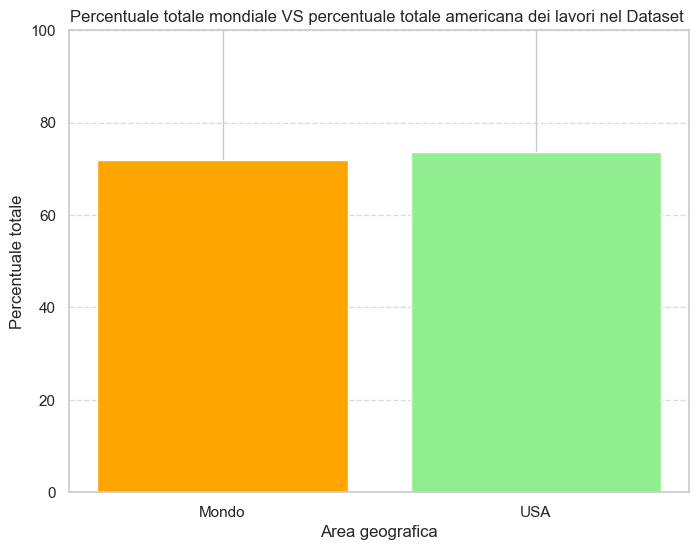

In [1360]:
# Etichette dei dati delle percentuali totali
etichette_dati_percentuali = ["Mondo", "USA"]
colori_dati_percentuali = ["orange", "lightgreen"]

# Creazione del grafico a barre
plt.figure(figsize = (8, 6))
plt.bar(etichette_dati_percentuali, percentuali_totali, color = colori_dati_percentuali)
plt.xlabel("Area geografica")
plt.ylabel("Percentuale totale")
plt.title("Percentuale totale mondiale VS percentuale totale americana dei lavori nel Dataset ")
plt.ylim(0, 100) # Impostazione del limite dei valori dell"asse y da 0 a 100 (perchè il massimo è il 100%)
plt.grid(axis = "y", linestyle = "--", alpha = 0.7)

# Stampa del grafico
plt.show()

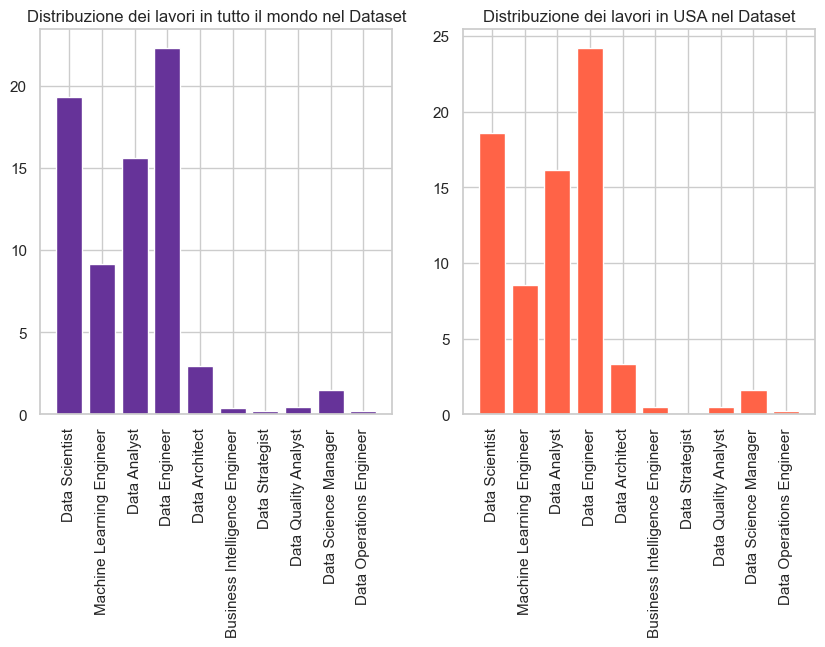

In [1361]:
etichette_lavori_dataset = job_titles

# Creazione del grafico a barre dela distribuzione dei lavori mondiali
fig,axs = plt.subplots(1, 2,figsize = (10,5))
axs[0].set_title("Distribuzione dei lavori in tutto il mondo nel Dataset")
axs[0].bar(etichette_lavori_dataset, lista_percentuali_mondiali, color = "rebeccapurple")
axs[0].tick_params(axis = "x", rotation = 90)

# Creazione del grafico a barre dela distribuzione dei lavori americani
axs[1].set_title("Distribuzione dei lavori in USA nel Dataset")
axs[1].bar(etichette_lavori_dataset, lista_percentuali_americane, color = "tomato")
axs[1].tick_params(axis = "x", rotation = 90)

# Stampa del grafico
plt.show()

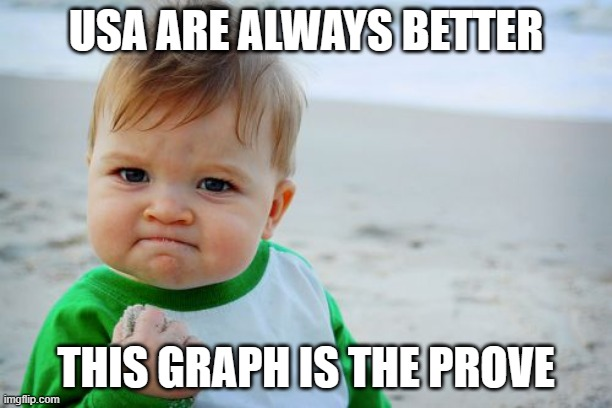

In [1362]:
# Specificazione del percorso del file immagine all'interno di una variabile
percorso_immagine_meme_2 = "meme USA is always better.jpg" # Bisogna sempre ricordarsi di specificare il tipo di file, nonchè in questo caso "jpg"

# Visualizzazione dell'immagine con l'apposito comando "Image"
Image(filename = percorso_immagine_meme_2)

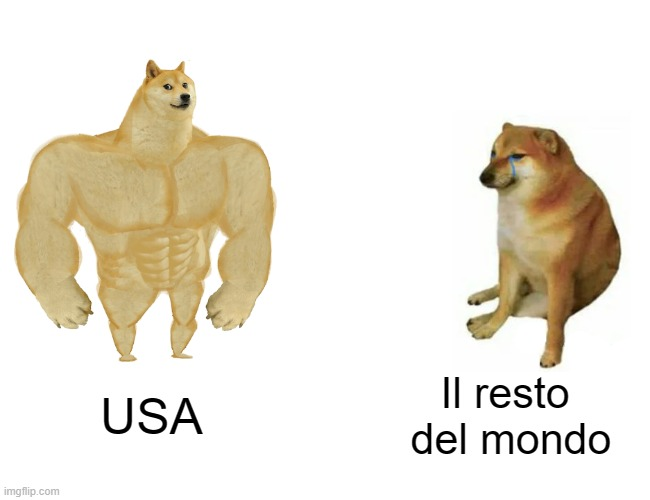

In [1363]:
# Specificazione del percorso del file immagine all'interno di una variabile
percorso_immagine_meme_3 = "meme USA vs il resto del mondo.jpg" # Bisogna sempre ricordarsi di specificare il tipo di file, nonchè in questo caso "jpg"

# Visualizzazione dell'immagine con l'apposito comando "Image"
Image(filename = percorso_immagine_meme_3)

## FASE 5: L'ANALISI DELLA PRESENZA DI NAN NEL DATASET E NEL DATASET RIDOTTO, LA GESTIONE DI QUEST'ULTIMI ED EVENTUALI GRAFICI

### CONTROLLO DEI NAN NELLE RIGHE (ISTANZE) E NELLE COLONNE (FEATURE) NEL DATASET

In [1364]:
# Calcolo delle righe con i dati mancanti nel Dataset
righe_dati_mancanti_dataset = dataset.isnull().any(axis = 1) # Calcola quali sono le righe con almeno un dato mancante nel Dataset, con axis = 1 si indicano le righe

In [1365]:
# Calcolo del totale delle righe con i dati mancanti nel Dataset
numero_righe_dati_mancanti_dataset = dataset.isnull().any(axis = 1).sum() # Con "sum()" si può direttamente venire a conoscienza del totale di tutte le righe con almeno un dato mancante, in questo caso quindi "sum()" somma tutte le righe con i valori NaN nel Dataset ottenendo così il numero di righe con valori NaN totali

In [1366]:
# Stampa delle righe con i dati mancanti nel Dataset
print("Le righe con i NaN nel Dataset sono:")
print(righe_dati_mancanti_dataset) # È "True" se almeno un valore in una singola riga è un dato mancante (NaN), altrimenti è False
# Stampa del totale delle righe con i dati mancanti nel Dataset
print(f"Il numero di righe con i NaN nel Dataset sono: {numero_righe_dati_mancanti_dataset}")

Le righe con i NaN nel Dataset sono:
0       False
1       False
2       False
3       False
4       False
        ...  
1809    False
1814    False
1815    False
1817    False
1818    False
Length: 1063, dtype: bool
Il numero di righe con i NaN nel Dataset sono: 0


In [1367]:
# Calcolo delle colonne con i dati mancanti nel Dataset
colonne_dati_mancanti_dataset = dataset.isnull().any(axis = 0) # Calcola quali sono le colonne con almeno un dato mancante nel Dataset, con axis = 0 si indicano le colonne

In [1368]:
# Calcolo del totale delle colonne con i dati mancanti nel Dataset
numero_colonne_dati_mancanti_dataset = dataset.isnull().any(axis = 0).sum() # Con "sum()" si può direttamente venire a conoscienza del totale di tutte le colonne con almeno un dato mancante, in questo caso quindi "sum()" somma tutte le colonne con i valori NaN nel Dataset ottenendo così il numero di colonne con valori NaN totali

In [1369]:
# Stampa delle colonne con i dati mancanti nel Dataset
print("Le colonne con i NaN nel Dataset sono:")
print(colonne_dati_mancanti_dataset) # È "True" se almeno un valore in una singola colonna è un dato mancante (NaN), altrimenti è False
# Stampa del totale delle colonne con i dati mancanti nel Dataset
print(f"Il numero di colonne con i NaN nel Dataset sono: {numero_colonne_dati_mancanti_dataset}")

Le colonne con i NaN nel Dataset sono:
experience_level    False
job_title           False
salary              False
company_location    False
dtype: bool
Il numero di colonne con i NaN nel Dataset sono: 0


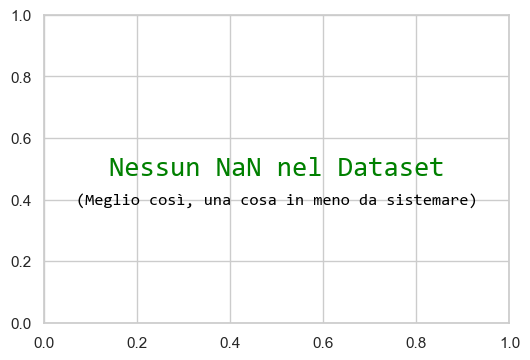

In [1370]:
# Grafico finto sulla presenza dei NaN nel Dataset
plt.figure(figsize = (6, 4))
plt.text(0.5, 0.5, "Nessun NaN nel Dataset", ha = "center", va = "center", fontsize = 20, color = "green", fontname = "Consolas") # con il comando plt.text per i grafici si inserisce del testo e si possono settare diversi parametri
plt.text(0.5, 0.4, "(Meglio così, una cosa in meno da sistemare)", ha = "center", va = "center", fontsize = 12, color = "black", fontname = "Consolas")
plt.show()

### CONTROLLO DEI NAN NELLE RIGHE (ISTANZE) E NELLE COLONNE (FEATURE) NEL DATASET RIDOTTO

In [1371]:
# Calcolo delle righe con i dati mancanti nel Dataset ridotto
righe_dati_mancanti_dataset_ridotto = dataset_ridotto.isnull().any(axis = 1) # Calcola quali sono le righe con almeno un dato mancante nel Dataset ridotto, con axis = 1 si indicano le righe

In [1372]:
# Calcolo del totale delle righe con i dati mancanti nel Dataset ridotto
numero_righe_dati_mancanti_dataset_ridotto = dataset_ridotto.isnull().any(axis = 1).sum() # Con "sum()" si può direttamente venire a conoscienza del totale di tutte le righe con almeno un dato mancante, in questo caso quindi "sum()" somma tutte le righe con i valori NaN nel Dataset ridotto ottenendo così il numero di righe con valori NaN totali

In [1373]:
# Stampa delle righe con i dati mancanti nel Dataset ridotto
print("Le righe con i NaN nel Dataset ridotto sono:")
print(righe_dati_mancanti_dataset_ridotto) # È "True" se almeno un valore in una singola riga è un dato mancante (NaN), altrimenti è False
# Stampa del totale delle righe con i dati mancanti nel Dataset ridotto
print(f"Il numero di righe con i NaN nel Dataset ridotto sono: {numero_righe_dati_mancanti_dataset_ridotto}")

Le righe con i NaN nel Dataset ridotto sono:
1       False
2       False
5       False
6       False
9       False
        ...  
1809    False
1814    False
1815    False
1817    False
1818    False
Length: 867, dtype: bool
Il numero di righe con i NaN nel Dataset ridotto sono: 0


In [1374]:
# Calcolo delle colonne con i dati mancanti nel Dataset ridotto
colonne_dati_mancanti_dataset_ridotto = dataset_ridotto.isnull().any(axis = 0) # Calcola quali sono le colonne con almeno un dato mancante nel Dataset ridotto, con axis = 0 si indicano le colonne

In [1375]:
# Calcolo del totale delle colonne con i dati mancanti nel Dataset ridotto
numero_colonne_dati_mancanti_dataset_ridotto = dataset_ridotto.isnull().any(axis = 0).sum() # Con "sum()" si può direttamente venire a conoscienza del totale di tutte le colonne con almeno un dato mancante, in questo caso quindi "sum()" somma tutte le colonne con i valori NaN nel Dataset ridotto ottenendo così il numero di colonne con valori NaN totali

In [1376]:
# Stampa delle colonne con i dati mancanti nel Dataset ridotto
print("Le colonne con i NaN nel Dataset ridotto sono:")
print(colonne_dati_mancanti_dataset_ridotto) # È "True" se almeno un valore in una singola colonna è un dato mancante (NaN), altrimenti è False
# Stampa del totale delle colonne con i dati mancanti nel Dataset ridotto
print(f"Il numero di colonne con i NaN nel Dataset ridotto sono: {numero_colonne_dati_mancanti_dataset_ridotto}")

Le colonne con i NaN nel Dataset ridotto sono:
experience_level    False
job_title           False
salary              False
company_location    False
dtype: bool
Il numero di colonne con i NaN nel Dataset ridotto sono: 0


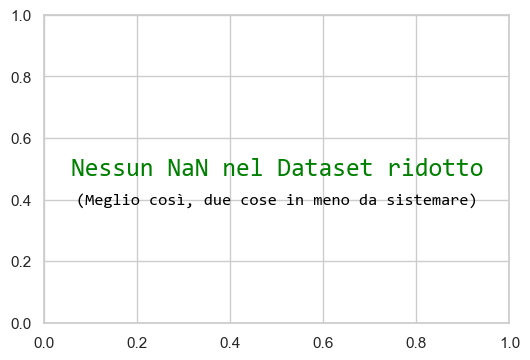

In [1377]:
# Grafico finto sulla presenza dei NaN nel Dataset ridotto
plt.figure(figsize = (6, 4))
plt.text(0.5, 0.5, "Nessun NaN nel Dataset ridotto", ha = "center", va = "center", fontsize = 18, color = "green", fontname = "Consolas") # con il comando plt.text per i grafici si inserisce del testo e si possono settare diversi parametri
plt.text(0.5, 0.4, "(Meglio così, due cose in meno da sistemare)", ha = "center", va = "center", fontsize = 12, color = "black", fontname = "Consolas")
plt.show()

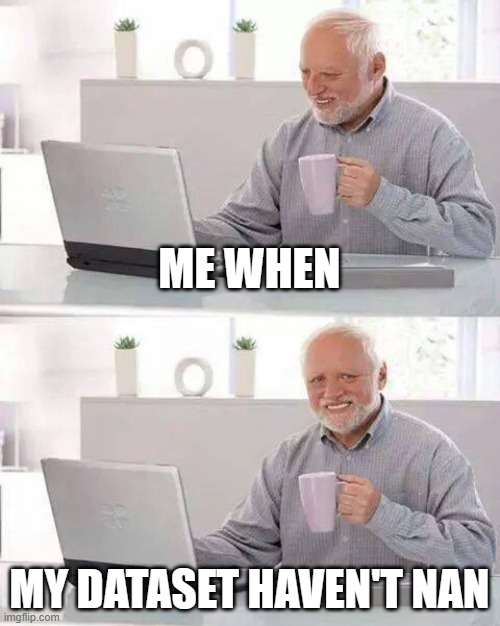

In [1378]:
# Specificazione del percorso del file immagine all'interno di una variabile
percorso_immagine_meme_4 = "meme old man with dataset with no nan.jpg" # Bisogna sempre ricordarsi di specificare il tipo di file, nonchè in questo caso "jpg"

# Visualizzazione dell'immagine con l'apposito comando "Image"
Image(filename = percorso_immagine_meme_4)

## FASE 6: L'ANALISI DELLA PRESENZA DI OUTLIERS NEL DATASET E NEL DATASET RIDOTTO, LA GESTIONE DI QUEST'ULTIMI ED EVENTUALI GRAFICI

### CALCOLO DELLA MEDIA DEI VALORI DELLA FEATURE "SALARY" NEL DATASET E NEL DATASET RIDOTTO

In [1379]:
# Calcolo della media dei valori del Dataset nella Feature "salary"
media_valori_salary_dataset = dataset["salary"].mean()
print("La media dei valori del Dataset nella Feature \"salary\" è:")
print(media_valori_salary_dataset)

La media dei valori del Dataset nella Feature "salary" è:
166798.63123236125


In [1380]:
# Calcolo della media dei valori del Dataset ridotto nella Feature "salary"
media_valori_salary_dataset_ridotto = dataset_ridotto["salary"].mean()
print("La media dei valori del Dataset ridotto nella Feature \"salary\" è:")
print(media_valori_salary_dataset_ridotto)

La media dei valori del Dataset ridotto nella Feature "salary" è:
160131.97462514418


### CALCOLO DELLA DEVIAZIONE STANDARD DEI VALORI DELLA FEATURE "SALARY" NEL DATASET E NEL DATASET RIDOTTO

La formula della deviazione standard è: **σ = √(Σ(xi - x̄)² / n)**, dove:
- √ = radice quadrata
- Σ = sommatoria di tutti gli elementi dentro la parentesi quadra
- xi = sono i singoli valori dei dati
- x̄ = è la media dei dati
- n = è il numero totale di dati

In [1381]:
# Calcolo della deviazione standard dei valori del Dataset nella Feature "salary"
deviazione_standard_salary_dataset = dataset["salary"].std()
print("La deviazione standard del Dataset nella Feature \"salary\" è:")
print(deviazione_standard_salary_dataset)

La deviazione standard del Dataset nella Feature "salary" è:
205073.26639455935


In [1382]:
# Calcolo della deviazione standard dei valori del Dataset ridotto nella Feature "salary"
deviazione_standard_salary_dataset_ridotto = dataset_ridotto["salary"].std()
print("La deviazione standard del Dataset ridotto nella Feature \"salary\" è:")
print(deviazione_standard_salary_dataset_ridotto)

La deviazione standard del Dataset ridotto nella Feature "salary" è:
60578.67710373906


### IDENTIFICAZIONE DEGLI OUTLIERS NEL DATASET E NEL DATASET RIDOTTO

#### PER IL DATASET

In [1383]:
# Identificazione degli Outliers nel Dataset consiederando + o -3 sigma dalla media
outliers_dataset = dataset[(dataset["salary"] > media_valori_salary_dataset + 3 * deviazione_standard_salary_dataset) | (dataset["salary"] < media_valori_salary_dataset - 3 * deviazione_standard_salary_dataset)] # Serve per controllare la presenza effettiva di Outliers comparando se i valori della Feature "salary" si discostano di 3σ (sigma) dalla media
outliers_dataset

experience_level                job_title   salary company_location
156                MI   Applied Data Scientist  1700000               IN
217                EN            Data Engineer  1400000               IN
528                SE             AI Scientist  1500000               IL
735                MI           Data Scientist  1400000               IN
738                MI        Lead Data Analyst  1500000               IN
988                SE             Data Analyst  1300000               IN
998                SE  Data Science Consultant  1000000               TH
1230               EN           Data Scientist   800000               IN
1260               MI     Product Data Analyst  1350000               IN
1341               EN           Data Scientist  1050000               IN
1462               MI     Head of Data Science  5000000               IN
1512               EN           Data Scientist  1060000               IN
1549               MI      Data Analytics Lead  1440000               SG
1595               MI           Data Scientist   840000               TH

In [1384]:
# Ordinamento dei valori degli Outliers nel Dataset dal maggiore al minore
outliers_dataset_ordinati = outliers_dataset.sort_values(by = "salary", ascending = False) # Se ascending è su False vuol dire che i valori verranno ordinati NON dal minore al maggiore bensì il contrario, quindi dal maggiore al minore
outliers_dataset_ordinati

experience_level                job_title   salary company_location
1462               MI     Head of Data Science  5000000               IN
156                MI   Applied Data Scientist  1700000               IN
528                SE             AI Scientist  1500000               IL
738                MI        Lead Data Analyst  1500000               IN
1549               MI      Data Analytics Lead  1440000               SG
217                EN            Data Engineer  1400000               IN
735                MI           Data Scientist  1400000               IN
1260               MI     Product Data Analyst  1350000               IN
988                SE             Data Analyst  1300000               IN
1512               EN           Data Scientist  1060000               IN
1341               EN           Data Scientist  1050000               IN
998                SE  Data Science Consultant  1000000               TH
1595               MI           Data Scientist   840000               TH
1230               EN           Data Scientist   800000               IN

#### PER IL DATASET RIDOTTO

In [1385]:
# Identificazione degli Outliers nel Dataset ridotto consiederando + o -3 sigma dalla media
outliers_dataset_ridotto = dataset_ridotto[(dataset_ridotto["salary"] > media_valori_salary_dataset_ridotto + 3 * deviazione_standard_salary_dataset_ridotto) | (dataset_ridotto["salary"] < media_valori_salary_dataset_ridotto - 3 * deviazione_standard_salary_dataset_ridotto)]
outliers_dataset_ridotto

experience_level                  job_title  salary company_location
33                 SE   Computer Vision Engineer  342810               US
133                SE  Machine Learning Engineer  342300               US
478                EX   Director of Data Science  353200               US
649                SE             Data Architect  376080               US
1105               SE             Data Scientist  370000               US
1288               SE               Data Analyst  385000               US
1311               SE         Research Scientist  370000               US
1421               SE          Applied Scientist  350000               US

In [1386]:
# Ordinamento i valori degli Outliers nel Dataset ridotto dal maggiore al minore
outliers_dataset_ridotto_ordinati = outliers_dataset_ridotto.sort_values(by = "salary", ascending = False) # Se ascending è su False vuol dire che i valori verranno ordinati NON dal minore al maggiore bensì il contrario, quindi dal maggiore al minore
outliers_dataset_ridotto_ordinati

experience_level                  job_title  salary company_location
1288               SE               Data Analyst  385000               US
649                SE             Data Architect  376080               US
1105               SE             Data Scientist  370000               US
1311               SE         Research Scientist  370000               US
478                EX   Director of Data Science  353200               US
1421               SE          Applied Scientist  350000               US
33                 SE   Computer Vision Engineer  342810               US
133                SE  Machine Learning Engineer  342300               US

### GRAFICI SUGLI OUTLIERS NEL DATASET E NEL DATASET RIDOTTO

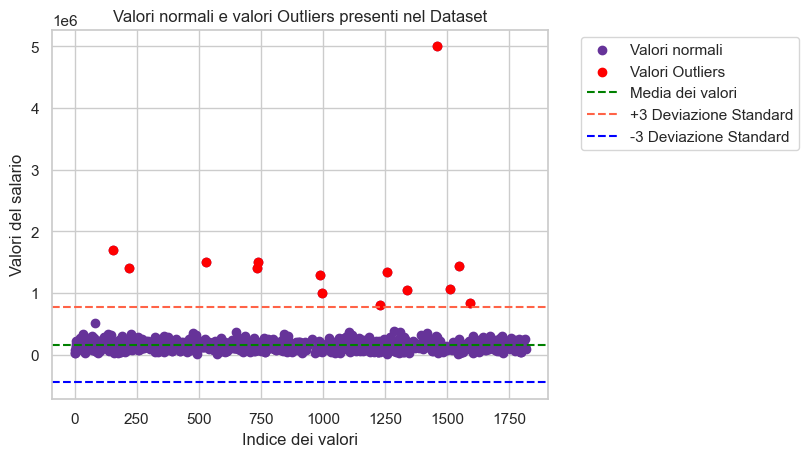

In [1387]:
# Evidenziazione dei valori normali nel grafico con un colore diverso ("rebeccapurple", che equivale quasi ad un fucsia intenso)
plt.scatter(dataset.index, dataset["salary"], label = "Valori normali", color = "rebeccapurple") # Si indica sempre prima l'asse x, in questo caso con gli indici dei valori, e poi l'asse y con in questo caso la Feature de

# Evidenziazione degli Outliers nel grafico con un colore diverso (rosso)
plt.scatter(outliers_dataset.index, outliers_dataset["salary"], color = "red", label = "Valori Outliers")

# Aggiunta della media e della deviazione standard al grafico e creazione delle etichette per ognuno
plt.axhline(y = media_valori_salary_dataset, color = "green", linestyle = "--", label = "Media dei valori") # Con "color" si indica il colore della tabella, invece con "linestyle" il tipo di linea (è preferibile sempre usare il tratteggio) e invece con "label" il nome dell'etichetta nella legenda
plt.axhline(y = media_valori_salary_dataset + 3 * deviazione_standard_salary_dataset, color = "tomato", linestyle = "--", label = "+3 Deviazione Standard")
plt.axhline(y = media_valori_salary_dataset - 3 * deviazione_standard_salary_dataset, color = "blue", linestyle = "--", label = "-3 Deviazione Standard")

# Aggiunta delle etichette e della legenda al grafico
plt.xlabel("Indice dei valori")
plt.ylabel("Valori del salario")
plt.title("Valori normali e valori Outliers presenti nel Dataset")
plt.legend(bbox_to_anchor = (1.05, 1), loc = "upper left") # Serve per creare una legenda a lato, oppure si può indicare la posizione preferita, con tutte le etichette create con l'apposito comando "axhline"

# Stampa del grafico
plt.show()

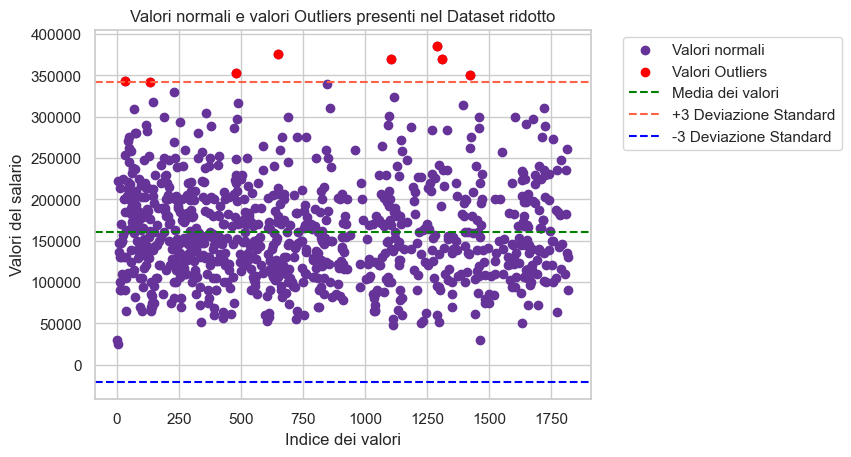

In [1388]:
# Evidenziazione dei valori normali nel grafico con un colore diverso ("rebeccapurple", che equivale quasi ad un fucsia intenso)
plt.scatter(dataset_ridotto.index, dataset_ridotto["salary"], label = "Valori normali", color = "rebeccapurple") # Si indica sempre prima l'asse x, in questo caso con gli indici dei valori, e poi l'asse y con in questo caso la Feature de

# Evidenziazione degli Outliers nel grafico con un colore diverso (rosso)
plt.scatter(outliers_dataset_ridotto.index, outliers_dataset_ridotto["salary"], color = "red", label = "Valori Outliers")

# Aggiunta della media e della deviazione standard al grafico e creazione delle etichette per ognuno
plt.axhline(y = media_valori_salary_dataset_ridotto, color = "green", linestyle = "--", label = "Media dei valori") # Con "color" si indica il colore della tabella, invece con "linestyle" il tipo di linea (è preferibile sempre usare il tratteggio) e invece con "label" il nome dell'etichetta nella legenda
plt.axhline(y = media_valori_salary_dataset_ridotto + 3 * deviazione_standard_salary_dataset_ridotto, color = "tomato", linestyle = "--", label = "+3 Deviazione Standard")
plt.axhline(y = media_valori_salary_dataset_ridotto - 3 * deviazione_standard_salary_dataset_ridotto, color = "blue", linestyle = "--", label = "-3 Deviazione Standard")

# Aggiunta delle etichette e della legenda al grafico
plt.xlabel("Indice dei valori")
plt.ylabel("Valori del salario")
plt.title("Valori normali e valori Outliers presenti nel Dataset ridotto")
plt.legend(bbox_to_anchor = (1.05, 1), loc = "upper left") # "bbox_to_anchor" serve per creare una legenda a lato, oppure si può indicare la posizione preferita, con tutte le etichette create con l'apposito comando "axhline"

# Stampa del grafico
plt.show()

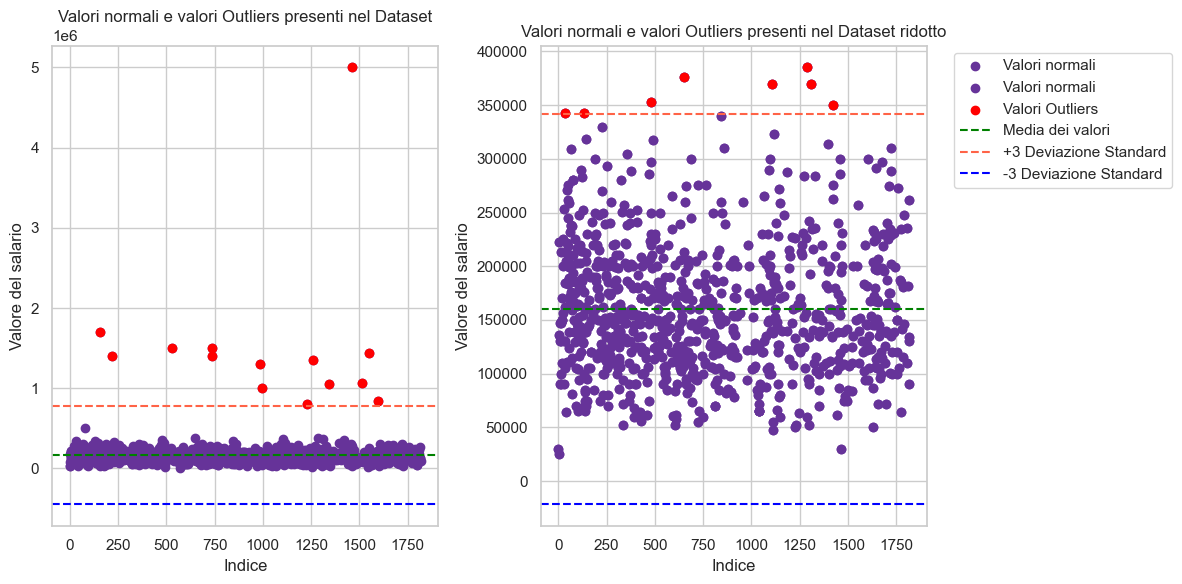

In [1389]:
# Creazione di una unica figura e due assi (subplot) definiti ciascuno come "axs" 0 o 1
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Grafico con gli Outliers nel Dataset (il codice è uguale a quello presente sopra, per i commenti esplicativi guardare lì)
axs[0].scatter(dataset.index, dataset["salary"], label = "Valori normali", color = "rebeccapurple")
axs[0].scatter(outliers_dataset.index, outliers_dataset["salary"], color = "red", label = "Valori Outliers")
axs[0].axhline(y = media_valori_salary_dataset, color = "green", linestyle = "--", label = "Media dei valori")
axs[0].axhline(y = media_valori_salary_dataset + 3 * deviazione_standard_salary_dataset, color = "tomato", linestyle = "--", label = "+3 Deviazione Standard")
axs[0].axhline(y = media_valori_salary_dataset - 3 * deviazione_standard_salary_dataset, color = "blue", linestyle = "--", label = "-3 Deviazione Standard")
axs[0].set_xlabel("Indice")
axs[0].set_ylabel("Valore del salario")
axs[0].set_title("Valori normali e valori Outliers presenti nel Dataset")

# Grafico con Outliers nel Dataset ridotto (il codice è uguale a quello presente sopra, per i commenti esplicativi guardare lì)
axs[1].scatter(dataset_ridotto.index, dataset_ridotto['salary'], label='Valori normali', color="rebeccapurple")
axs[1].scatter(dataset_ridotto.index, dataset_ridotto["salary"], label = "Valori normali", color = "rebeccapurple")
axs[1].scatter(outliers_dataset_ridotto.index, outliers_dataset_ridotto["salary"], color = "red", label = "Valori Outliers")
axs[1].axhline(y = media_valori_salary_dataset_ridotto, color = "green", linestyle = "--", label = "Media dei valori")
axs[1].axhline(y = media_valori_salary_dataset_ridotto + 3 * deviazione_standard_salary_dataset_ridotto, color = "tomato", linestyle = "--", label = "+3 Deviazione Standard")
axs[1].axhline(y = media_valori_salary_dataset_ridotto - 3 * deviazione_standard_salary_dataset_ridotto, color = "blue", linestyle = "--", label = "-3 Deviazione Standard")
axs[1].set_xlabel("Indice")
axs[1].set_ylabel("Valore del salario")
axs[1].set_title("Valori normali e valori Outliers presenti nel Dataset ridotto")
axs[1].legend(bbox_to_anchor = (1.05, 1), loc = "upper left")

plt.tight_layout() # Con questo comando si può regolare la disposizione e lo spazio tra i subplot in modo da rendere migliore la lettura dei grafici

# Stampa dei grafici
plt.show()

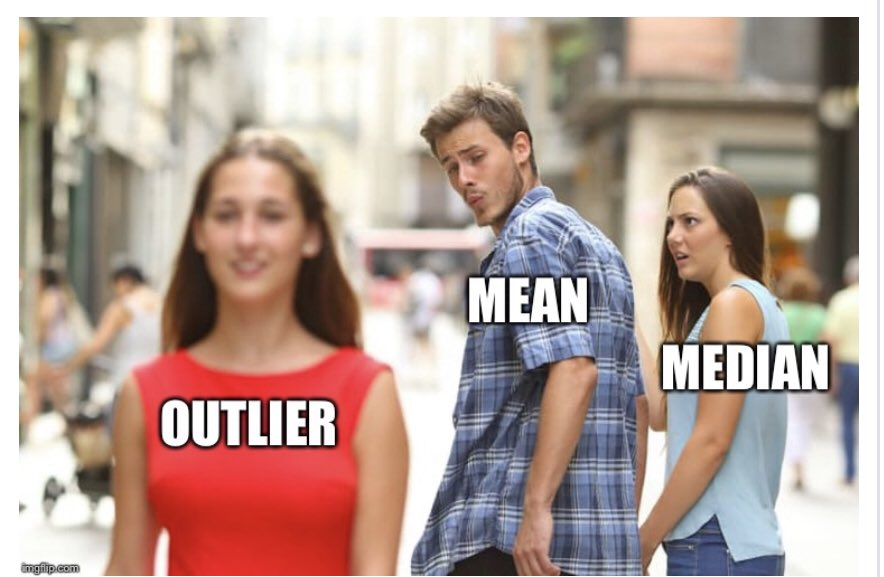

In [1390]:
# Specificazione del percorso del file immagine all'interno di una variabile
percorso_immagine_meme_5 = "meme Outliers with mean and median.jpg" # Bisogna sempre ricordarsi di specificare il tipo di file, nonchè in questo caso "jpg"

# Visualizzazione dell'immagine con l'apposito comando "Image"
Image(filename = percorso_immagine_meme_5)

### IDENTIFICAZIONE ED ANALISI DEGLI OUTLIERS NEL DATASET E NEL DATASET RIDOTTO (CON LA COSTANTE K E CON IL MIN FEATURES THRESHOLD)

In [1391]:
# Il "Min Features threshold" definisce nel Dataset il numero minimo di Feature che servono per poter considerare un dato un Outlier, in questo caso è 1 e quindi se una singola Feature ha un Outlier sopra o sotto il + o - 3 della deviazione standard, il singolo dato viene considerato come tale
min_features_threshold_dataset = 1
k = 3  # Il k indica l'intervallo di confidenza

# Lista per salvare gli indici dei singoli Outlier
lista_indici_outliers_dataset = []
print("La lista degli indici all'inizio, cioè prima dell'analisi della presenza degli Outliers, è:")
print(lista_indici_outliers_dataset) # È ovviamente una lista vuota all'inizio perchè non è ancora stata fatta l'analisi nel Dataset
print("Il numero di elementi nella lista è pari a:")
print(len(lista_indici_outliers_dataset))

La lista degli indici all'inizio, cioè prima dell'analisi della presenza degli Outliers, è:
[]
Il numero di elementi nella lista è pari a:
0


In [1392]:
# Identificazione degli Outliers nella Feature "salary" del Dataset con le costanti booleane True (vuol dire che è presente uno o più Outlier nella Feature) o False (cioè che non è presente nessun Outlier nella Feature)
dataset["Outlier_salary"] = (dataset["salary"] > media_valori_salary_dataset + k * deviazione_standard_salary_dataset) | (dataset["salary"] < media_valori_salary_dataset - k * deviazione_standard_salary_dataset) # Crea una Feature apposita per le costanti booleane e fa il controllo nella Feature "salary" degli Outliers
dataset

experience_level                  job_title  salary company_location  \
0                  SE   Principal Data Scientist   80000               ES   
1                  MI                ML Engineer   30000               US   
2                  MI                ML Engineer   25500               US   
3                  SE             Data Scientist  175000               CA   
4                  SE             Data Scientist  120000               CA   
...               ...                        ...     ...              ...   
1809               SE              Data Engineer  182000               US   
1814               SE  Machine Learning Engineer  261500               US   
1815               SE  Machine Learning Engineer  134500               US   
1817               MI             Data Scientist  130000               US   
1818               MI             Data Scientist   90000               US   

      Outlier_salary  
0              False  
1              False  
2              False  
3              False  
4              False  
...              ...  
1809           False  
1814           False  
1815           False  
1817           False  
1818           False  

[1063 rows x 5 columns]

In [1393]:
# Il "Min Features threshold" definisce nel Dataset ridotto il numero minimo di Feature che servono per poter considerare un dato un Outlier, in questo caso è 1 e quindi se una singola Feature ha un Outlier sopra o sotto il + o - 3 della deviazione standard, il singolo dato viene considerato come tale
min_features_threshold_dataset_ridotto = 1
k = 3  # Il k indica l'intervallo di confidenza

# Lista per salvare gli indici dei singoli Outlier
lista_indici_outliers_dataset_ridotto = []
print("La lista degli indici all'inizio, cioè prima dell'analisi della presenza degli Outliers, è:")
print(lista_indici_outliers_dataset_ridotto) # È ovviamente una lista vuota all'inizio perchè non è ancora stata fatta l'analisi nel Dataset_ridotto
print("Il numero di elementi nella lista è pari a:")
print(len(lista_indici_outliers_dataset_ridotto))

La lista degli indici all'inizio, cioè prima dell'analisi della presenza degli Outliers, è:
[]
Il numero di elementi nella lista è pari a:
0


In [1394]:
# Identificazione degli Outliers nella Feature "salary" del Dataset ridotto con le costanti booleane True (vuol dire che è presente uno o più Outlier nella Feature) o False (cioè che non è presente nessun Outlier nella Feature)
dataset_ridotto["Outlier_salary"] = (dataset_ridotto["salary"] > media_valori_salary_dataset_ridotto + k * deviazione_standard_salary_dataset_ridotto) | (dataset_ridotto["salary"] < media_valori_salary_dataset_ridotto - k * deviazione_standard_salary_dataset_ridotto) # Crea una Feature apposita per le costanti booleane e fa il controllo nella Feature "salary" degli Outliers
dataset_ridotto

experience_level                  job_title  salary company_location  \
1                  MI                ML Engineer   30000               US   
2                  MI                ML Engineer   25500               US   
5                  SE          Applied Scientist  222200               US   
6                  SE          Applied Scientist  136000               US   
9                  SE             Data Scientist  147100               US   
...               ...                        ...     ...              ...   
1809               SE              Data Engineer  182000               US   
1814               SE  Machine Learning Engineer  261500               US   
1815               SE  Machine Learning Engineer  134500               US   
1817               MI             Data Scientist  130000               US   
1818               MI             Data Scientist   90000               US   

      Outlier_salary  
1              False  
2              False  
5              False  
6              False  
9              False  
...              ...  
1809           False  
1814           False  
1815           False  
1817           False  
1818           False  

[867 rows x 5 columns]

### CALCOLO DELLA QUANTITÀ DI OUTLIERS PRESENTI NELLE RIGHE DEL DATASET E DEL DATASET RIDOTTO

In [1395]:
# Calcolo di quanti Outliers sono presenti per riga nel Dataset
outliers_dataset = dataset["Numero_Outliers_nella_riga"] = dataset.filter(like = "Outlier_").sum(axis = 1) # Aggiunge una nuova Feature chiamata "Numero_Outliers_nella_riga" che contiene il conteggio degli Outliers per ogni riga del Dataset. Si basa però SOLO sulle Feature nel Dataset in cui contengono "Outlier_" nel loro nome (quindi solo quelle numeriche, cioè solo "salary"). Questo valore sarà per forza 0 o 1 poiché ci sono solo due possibili valori (True o False) per le feature numeriche nel Dataset
outliers_dataset

0       0
1       0
2       0
3       0
4       0
       ..
1809    0
1814    0
1815    0
1817    0
1818    0
Length: 1063, dtype: int64

In [1396]:
dataset

experience_level                  job_title  salary company_location  \
0                  SE   Principal Data Scientist   80000               ES   
1                  MI                ML Engineer   30000               US   
2                  MI                ML Engineer   25500               US   
3                  SE             Data Scientist  175000               CA   
4                  SE             Data Scientist  120000               CA   
...               ...                        ...     ...              ...   
1809               SE              Data Engineer  182000               US   
1814               SE  Machine Learning Engineer  261500               US   
1815               SE  Machine Learning Engineer  134500               US   
1817               MI             Data Scientist  130000               US   
1818               MI             Data Scientist   90000               US   

      Outlier_salary  Numero_Outliers_nella_riga  
0              False                           0  
1              False                           0  
2              False                           0  
3              False                           0  
4              False                           0  
...              ...                         ...  
1809           False                           0  
1814           False                           0  
1815           False                           0  
1817           False                           0  
1818           False                           0  

[1063 rows x 6 columns]

In [1397]:
# Calcolo di quanti Outliers sono presenti per riga nel Dataset ridotto
outliers_dataset_ridotto = dataset_ridotto["Numero_Outliers_nella_riga"] = dataset_ridotto.filter(like = "Outlier_").sum(axis = 1) # Aggiunge una nuova Feature chiamata "Numero_Outliers_nella_riga" che contiene il conteggio degli outlier per ogni riga del Dataset ridotto. Si basa però SOLO sulle Feature nel Dataset ridotto in cui contengono "Outlier_" nel loro nome (quindi solo quelle numeriche, cioè solo "salary"). Questo valore sarà per forza 0 o 1 poiché ci sono solo due possibili valori (True o False) per le feature numeriche nel Dataset ridotto
outliers_dataset_ridotto

1       0
2       0
5       0
6       0
9       0
       ..
1809    0
1814    0
1815    0
1817    0
1818    0
Length: 867, dtype: int64

In [1398]:
dataset_ridotto

experience_level                  job_title  salary company_location  \
1                  MI                ML Engineer   30000               US   
2                  MI                ML Engineer   25500               US   
5                  SE          Applied Scientist  222200               US   
6                  SE          Applied Scientist  136000               US   
9                  SE             Data Scientist  147100               US   
...               ...                        ...     ...              ...   
1809               SE              Data Engineer  182000               US   
1814               SE  Machine Learning Engineer  261500               US   
1815               SE  Machine Learning Engineer  134500               US   
1817               MI             Data Scientist  130000               US   
1818               MI             Data Scientist   90000               US   

      Outlier_salary  Numero_Outliers_nella_riga  
1              False                           0  
2              False                           0  
5              False                           0  
6              False                           0  
9              False                           0  
...              ...                         ...  
1809           False                           0  
1814           False                           0  
1815           False                           0  
1817           False                           0  
1818           False                           0  

[867 rows x 6 columns]

### FILTRAGGIO DEGLI OUTLIERS DAL DATASET E DAL DATASET RIDOTTO

#### PER IL DATASET

In [1399]:
# Filtraggio degli Outliers per mantenere solo le righe in cui la quantità di Outliers presenti sia maggiore o uguale alla soglia della Min features threshold, questo fa sì che vengono mostrate nell'output le righe con un solo Outlier nel Dataset
outliers_dataset = dataset[dataset["Numero_Outliers_nella_riga"] >= min_features_threshold_dataset]
outliers_dataset

experience_level                job_title   salary company_location  \
156                MI   Applied Data Scientist  1700000               IN   
217                EN            Data Engineer  1400000               IN   
528                SE             AI Scientist  1500000               IL   
735                MI           Data Scientist  1400000               IN   
738                MI        Lead Data Analyst  1500000               IN   
988                SE             Data Analyst  1300000               IN   
998                SE  Data Science Consultant  1000000               TH   
1230               EN           Data Scientist   800000               IN   
1260               MI     Product Data Analyst  1350000               IN   
1341               EN           Data Scientist  1050000               IN   
1462               MI     Head of Data Science  5000000               IN   
1512               EN           Data Scientist  1060000               IN   
1549               MI      Data Analytics Lead  1440000               SG   
1595               MI           Data Scientist   840000               TH   

      Outlier_salary  Numero_Outliers_nella_riga  
156             True                           1  
217             True                           1  
528             True                           1  
735             True                           1  
738             True                           1  
988             True                           1  
998             True                           1  
1230            True                           1  
1260            True                           1  
1341            True                           1  
1462            True                           1  
1512            True                           1  
1549            True                           1  
1595            True                           1

In [1400]:
print("Il numero totale di Outliers presenti nelle righe del Dataset è:")
print(len(outliers_dataset))

Il numero totale di Outliers presenti nelle righe del Dataset è:
14


In [1401]:
# Eliminazione degli Outliers vera e propria, tutte le righe di cui il valore booleano della Feature "Numero_Outliers_nella_riga" è pari a True (quindi quelle che presentano un solo Outlier nella riga) vengono eliminate e il tutto viene salvato in un nuovo Dataset
dataset_filtrato = dataset[dataset["Outlier_salary"] == False] # Cioè quindi vengono filtrate (quindi tenute) solo le righe in cui la Feature "salary" NON è un Outlier quindi quando la costante booleana è False, invece le altre righe (cioè quelle con la costante True) con gli Outliers vengono eliminate
dataset_filtrato

experience_level                  job_title  salary company_location  \
0                  SE   Principal Data Scientist   80000               ES   
1                  MI                ML Engineer   30000               US   
2                  MI                ML Engineer   25500               US   
3                  SE             Data Scientist  175000               CA   
4                  SE             Data Scientist  120000               CA   
...               ...                        ...     ...              ...   
1809               SE              Data Engineer  182000               US   
1814               SE  Machine Learning Engineer  261500               US   
1815               SE  Machine Learning Engineer  134500               US   
1817               MI             Data Scientist  130000               US   
1818               MI             Data Scientist   90000               US   

      Outlier_salary  Numero_Outliers_nella_riga  
0              False                           0  
1              False                           0  
2              False                           0  
3              False                           0  
4              False                           0  
...              ...                         ...  
1809           False                           0  
1814           False                           0  
1815           False                           0  
1817           False                           0  
1818           False                           0  

[1049 rows x 6 columns]

In [1402]:
# Controllo di sicurezza per mostrare veramente se gli Outliers sono presenti ancora o meno nel Dataset, facendo lo stesso controllo di prima
outliers_dataset_filtrato = dataset_filtrato[dataset_filtrato["Numero_Outliers_nella_riga"] >= min_features_threshold_dataset]
outliers_dataset_filtrato

Empty DataFrame
Columns: [experience_level, job_title, salary, company_location, Outlier_salary, Numero_Outliers_nella_riga]
Index: []

In [1403]:
print("Il numero totale di Outliers presenti nelle righe del Dataset dopo eliminazione di quest'ultimi è:")
print(len(outliers_dataset_filtrato))

Il numero totale di Outliers presenti nelle righe del Dataset dopo eliminazione di quest'ultimi è:
0


In [1404]:
dataset

experience_level                  job_title  salary company_location  \
0                  SE   Principal Data Scientist   80000               ES   
1                  MI                ML Engineer   30000               US   
2                  MI                ML Engineer   25500               US   
3                  SE             Data Scientist  175000               CA   
4                  SE             Data Scientist  120000               CA   
...               ...                        ...     ...              ...   
1809               SE              Data Engineer  182000               US   
1814               SE  Machine Learning Engineer  261500               US   
1815               SE  Machine Learning Engineer  134500               US   
1817               MI             Data Scientist  130000               US   
1818               MI             Data Scientist   90000               US   

      Outlier_salary  Numero_Outliers_nella_riga  
0              False                           0  
1              False                           0  
2              False                           0  
3              False                           0  
4              False                           0  
...              ...                         ...  
1809           False                           0  
1814           False                           0  
1815           False                           0  
1817           False                           0  
1818           False                           0  

[1063 rows x 6 columns]

In [1405]:
dataset_filtrato

experience_level                  job_title  salary company_location  \
0                  SE   Principal Data Scientist   80000               ES   
1                  MI                ML Engineer   30000               US   
2                  MI                ML Engineer   25500               US   
3                  SE             Data Scientist  175000               CA   
4                  SE             Data Scientist  120000               CA   
...               ...                        ...     ...              ...   
1809               SE              Data Engineer  182000               US   
1814               SE  Machine Learning Engineer  261500               US   
1815               SE  Machine Learning Engineer  134500               US   
1817               MI             Data Scientist  130000               US   
1818               MI             Data Scientist   90000               US   

      Outlier_salary  Numero_Outliers_nella_riga  
0              False                           0  
1              False                           0  
2              False                           0  
3              False                           0  
4              False                           0  
...              ...                         ...  
1809           False                           0  
1814           False                           0  
1815           False                           0  
1817           False                           0  
1818           False                           0  

[1049 rows x 6 columns]

In [1406]:
print("I valori della grandezza del Dataset CON gli Outliers sono:")
print(dataset.shape) # Con "shape()" prima viene stampato il numero di righe (1063) e poi viene stampato il numero di colonne (6)
print("I valori della grandezza del Dataset SENZA gli Outliers sono:")
print(dataset_filtrato.shape)

I valori della grandezza del Dataset CON gli Outliers sono:
(1063, 6)
I valori della grandezza del Dataset SENZA gli Outliers sono:
(1049, 6)


#### PER IL DATASET RIDOTTO

In [1407]:
# Filtraggio degli Outliers per mantenere solo le righe in cui la quantità di Outliers presenti sia maggiore o uguale alla soglia della Min features threshold, questo fa sì che vengono mostrate nell'output le righe con un solo Outlier nel Dataset ridotto
outliers_dataset_ridotto = dataset_ridotto[dataset_ridotto["Numero_Outliers_nella_riga"] >= min_features_threshold_dataset_ridotto]
outliers_dataset_ridotto

experience_level                  job_title  salary company_location  \
33                 SE   Computer Vision Engineer  342810               US   
133                SE  Machine Learning Engineer  342300               US   
478                EX   Director of Data Science  353200               US   
649                SE             Data Architect  376080               US   
1105               SE             Data Scientist  370000               US   
1288               SE               Data Analyst  385000               US   
1311               SE         Research Scientist  370000               US   
1421               SE          Applied Scientist  350000               US   

      Outlier_salary  Numero_Outliers_nella_riga  
33              True                           1  
133             True                           1  
478             True                           1  
649             True                           1  
1105            True                           1  
1288            True                           1  
1311            True                           1  
1421            True                           1

In [1408]:
print("Il numero totale di Outliers presenti nelle righe del Dataset ridotto è:")
print(len(outliers_dataset_ridotto))

Il numero totale di Outliers presenti nelle righe del Dataset ridotto è:
8


In [1409]:
# Eliminazione degli Outliers vera e propria, tutte le righe di cui il valore booleano della Feature "Numero_Outliers_nella_riga" è pari a True (quindi quelle che presentano un solo Outlier nella riga) vengono eliminate e il tutto viene salvato in un nuovo Dataset
dataset_ridotto_filtrato = dataset_ridotto[dataset_ridotto["Outlier_salary"] == False] # Cioè quindi vengono filtrate (quindi tenute) solo le righe in cui la Feature "salary" NON è un Outlier quindi quando la costante booleana è False, invece le altre righe (cioè quelle con la costante True) con gli Outliers vengono eliminate
dataset_ridotto_filtrato

experience_level                  job_title  salary company_location  \
1                  MI                ML Engineer   30000               US   
2                  MI                ML Engineer   25500               US   
5                  SE          Applied Scientist  222200               US   
6                  SE          Applied Scientist  136000               US   
9                  SE             Data Scientist  147100               US   
...               ...                        ...     ...              ...   
1809               SE              Data Engineer  182000               US   
1814               SE  Machine Learning Engineer  261500               US   
1815               SE  Machine Learning Engineer  134500               US   
1817               MI             Data Scientist  130000               US   
1818               MI             Data Scientist   90000               US   

      Outlier_salary  Numero_Outliers_nella_riga  
1              False                           0  
2              False                           0  
5              False                           0  
6              False                           0  
9              False                           0  
...              ...                         ...  
1809           False                           0  
1814           False                           0  
1815           False                           0  
1817           False                           0  
1818           False                           0  

[859 rows x 6 columns]

In [1410]:
# Controllo di sicurezza per mostrare veramente se gli Outliers sono presenti ancora o meno nel Dataset, facendo lo stesso controllo di prima
outliers_dataset_ridotto_filtrato = dataset_ridotto_filtrato[dataset_ridotto_filtrato["Numero_Outliers_nella_riga"] >= min_features_threshold_dataset_ridotto]
outliers_dataset_ridotto_filtrato

Empty DataFrame
Columns: [experience_level, job_title, salary, company_location, Outlier_salary, Numero_Outliers_nella_riga]
Index: []

In [1411]:
print("Il numero totale di Outliers presenti nel Dataset ridotto dopo eliminazione di quest'ultimi è:")
print(len(outliers_dataset_ridotto_filtrato))

Il numero totale di Outliers presenti nel Dataset ridotto dopo eliminazione di quest'ultimi è:
0


In [1412]:
dataset_ridotto

experience_level                  job_title  salary company_location  \
1                  MI                ML Engineer   30000               US   
2                  MI                ML Engineer   25500               US   
5                  SE          Applied Scientist  222200               US   
6                  SE          Applied Scientist  136000               US   
9                  SE             Data Scientist  147100               US   
...               ...                        ...     ...              ...   
1809               SE              Data Engineer  182000               US   
1814               SE  Machine Learning Engineer  261500               US   
1815               SE  Machine Learning Engineer  134500               US   
1817               MI             Data Scientist  130000               US   
1818               MI             Data Scientist   90000               US   

      Outlier_salary  Numero_Outliers_nella_riga  
1              False                           0  
2              False                           0  
5              False                           0  
6              False                           0  
9              False                           0  
...              ...                         ...  
1809           False                           0  
1814           False                           0  
1815           False                           0  
1817           False                           0  
1818           False                           0  

[867 rows x 6 columns]

In [1413]:
dataset_ridotto_filtrato

experience_level                  job_title  salary company_location  \
1                  MI                ML Engineer   30000               US   
2                  MI                ML Engineer   25500               US   
5                  SE          Applied Scientist  222200               US   
6                  SE          Applied Scientist  136000               US   
9                  SE             Data Scientist  147100               US   
...               ...                        ...     ...              ...   
1809               SE              Data Engineer  182000               US   
1814               SE  Machine Learning Engineer  261500               US   
1815               SE  Machine Learning Engineer  134500               US   
1817               MI             Data Scientist  130000               US   
1818               MI             Data Scientist   90000               US   

      Outlier_salary  Numero_Outliers_nella_riga  
1              False                           0  
2              False                           0  
5              False                           0  
6              False                           0  
9              False                           0  
...              ...                         ...  
1809           False                           0  
1814           False                           0  
1815           False                           0  
1817           False                           0  
1818           False                           0  

[859 rows x 6 columns]

In [1414]:
print("I valori della grandezza del Dataset ridotto CON gli Outliers sono:")
print(dataset_ridotto.shape) # Con "shape()" prima viene stampato il numero di righe (1063) e poi viene stampato il numero di colonne (6)
print("I valori della grandezza del Dataset ridotto SENZA gli Outliers sono:")
print(dataset_ridotto_filtrato.shape)

I valori della grandezza del Dataset ridotto CON gli Outliers sono:
(867, 6)
I valori della grandezza del Dataset ridotto SENZA gli Outliers sono:
(859, 6)


### SALVATAGGIO DELLA ELIMINAZIONE DEGLI OUTLIERS NEL DATASET E NEL DATASET RIDOTTO

In [1415]:
# Salvataggio nel Dataset della eliminazione degli Outliers avvenuta nel Dataset filtrato, quindi sovrascrivendo il Dataset con quello filtrato quest'ultimo non avrà più i valori Outliers
dataset = dataset_filtrato

In [1416]:
dataset

experience_level                  job_title  salary company_location  \
0                  SE   Principal Data Scientist   80000               ES   
1                  MI                ML Engineer   30000               US   
2                  MI                ML Engineer   25500               US   
3                  SE             Data Scientist  175000               CA   
4                  SE             Data Scientist  120000               CA   
...               ...                        ...     ...              ...   
1809               SE              Data Engineer  182000               US   
1814               SE  Machine Learning Engineer  261500               US   
1815               SE  Machine Learning Engineer  134500               US   
1817               MI             Data Scientist  130000               US   
1818               MI             Data Scientist   90000               US   

      Outlier_salary  Numero_Outliers_nella_riga  
0              False                           0  
1              False                           0  
2              False                           0  
3              False                           0  
4              False                           0  
...              ...                         ...  
1809           False                           0  
1814           False                           0  
1815           False                           0  
1817           False                           0  
1818           False                           0  

[1049 rows x 6 columns]

In [1417]:
# Salvataggio nel Dataset ridotto della eliminazione degli Outliers avvenuta nel Dataset ridotto filtrato, quindi sovrascrivendo il Dataset ridotto con quello filtrato (ridotto) quest'ultimo non avrà più i valori Outliers
dataset_ridotto = dataset_ridotto_filtrato

In [1418]:
dataset_ridotto

experience_level                  job_title  salary company_location  \
1                  MI                ML Engineer   30000               US   
2                  MI                ML Engineer   25500               US   
5                  SE          Applied Scientist  222200               US   
6                  SE          Applied Scientist  136000               US   
9                  SE             Data Scientist  147100               US   
...               ...                        ...     ...              ...   
1809               SE              Data Engineer  182000               US   
1814               SE  Machine Learning Engineer  261500               US   
1815               SE  Machine Learning Engineer  134500               US   
1817               MI             Data Scientist  130000               US   
1818               MI             Data Scientist   90000               US   

      Outlier_salary  Numero_Outliers_nella_riga  
1              False                           0  
2              False                           0  
5              False                           0  
6              False                           0  
9              False                           0  
...              ...                         ...  
1809           False                           0  
1814           False                           0  
1815           False                           0  
1817           False                           0  
1818           False                           0  

[859 rows x 6 columns]

### ELIMINAZIONE DELLE FEATURE AUSILIARIE DEL DATASET E DEL DATASET RIDOTTO

In [1419]:
# Rimuove le colonne ausiliarie nel Dataset (cioè quelle create per gestire gli Outliers che però adesso non servono più)
dataset.drop(dataset.filter(like = "Outlier_").columns, axis = 1, inplace = True) # Questo serve per filtrare e succesivamente elimanare tutte quelle Feature che iniziano con quel determinato suffiso, che nel caso del Dataset è "salary" che è l'unica Feature numerica
dataset.drop("Numero_Outliers_nella_riga", axis = 1, inplace = True) # Drop vuol dire buttare, quindi elimina in questo caso la Feature "Numero_Outliers_nella_riga", mentre axis pari a 1 indica che si tratta di una colonna (e 0 indicherebbe le righe) e infine "inplace" indica che il Dataset viene sovrascritto con le nuove modifiche
dataset

experience_level                  job_title  salary company_location
0                  SE   Principal Data Scientist   80000               ES
1                  MI                ML Engineer   30000               US
2                  MI                ML Engineer   25500               US
3                  SE             Data Scientist  175000               CA
4                  SE             Data Scientist  120000               CA
...               ...                        ...     ...              ...
1809               SE              Data Engineer  182000               US
1814               SE  Machine Learning Engineer  261500               US
1815               SE  Machine Learning Engineer  134500               US
1817               MI             Data Scientist  130000               US
1818               MI             Data Scientist   90000               US

[1049 rows x 4 columns]

In [1420]:
# Rimuove le colonne ausiliarie nel Dataset ridotto (cioè quelle create per gestire gli Outliers che però adesso non servono più)
dataset_ridotto.drop(dataset_ridotto.filter(like = "Outlier_").columns, axis = 1, inplace = True) # Questo serve per filtrare e succesivamente elimanare tutte quelle Feature che iniziano con quel determinato suffiso, che nel caso del Dataset ridotto è "salary" che è l'unica Feature numerica
dataset_ridotto.drop("Numero_Outliers_nella_riga", axis = 1, inplace = True) # Drop vuol dire buttare, quindi elimina in questo caso la Feature "Numero_Outliers_nella_riga", mentre axis pari a 1 indica che si tratta di una colonna (e 0 indicherebbe le righe) e infine "inplace" indica che il Dataset viene sovrascritto con le nuove modifiche
dataset_ridotto

experience_level                  job_title  salary company_location
1                  MI                ML Engineer   30000               US
2                  MI                ML Engineer   25500               US
5                  SE          Applied Scientist  222200               US
6                  SE          Applied Scientist  136000               US
9                  SE             Data Scientist  147100               US
...               ...                        ...     ...              ...
1809               SE              Data Engineer  182000               US
1814               SE  Machine Learning Engineer  261500               US
1815               SE  Machine Learning Engineer  134500               US
1817               MI             Data Scientist  130000               US
1818               MI             Data Scientist   90000               US

[859 rows x 4 columns]

## FASE 7: L'ANALISI REALISTICA FINALE DEL DATASET (CON TUTTE LE MODIFICHE EFFETUATE PRECEDENTEMENTE) CON I GRAFICI

In [1421]:
dataset

experience_level                  job_title  salary company_location
0                  SE   Principal Data Scientist   80000               ES
1                  MI                ML Engineer   30000               US
2                  MI                ML Engineer   25500               US
3                  SE             Data Scientist  175000               CA
4                  SE             Data Scientist  120000               CA
...               ...                        ...     ...              ...
1809               SE              Data Engineer  182000               US
1814               SE  Machine Learning Engineer  261500               US
1815               SE  Machine Learning Engineer  134500               US
1817               MI             Data Scientist  130000               US
1818               MI             Data Scientist   90000               US

[1049 rows x 4 columns]

In [1422]:
dataset_ridotto

experience_level                  job_title  salary company_location
1                  MI                ML Engineer   30000               US
2                  MI                ML Engineer   25500               US
5                  SE          Applied Scientist  222200               US
6                  SE          Applied Scientist  136000               US
9                  SE             Data Scientist  147100               US
...               ...                        ...     ...              ...
1809               SE              Data Engineer  182000               US
1814               SE  Machine Learning Engineer  261500               US
1815               SE  Machine Learning Engineer  134500               US
1817               MI             Data Scientist  130000               US
1818               MI             Data Scientist   90000               US

[859 rows x 4 columns]

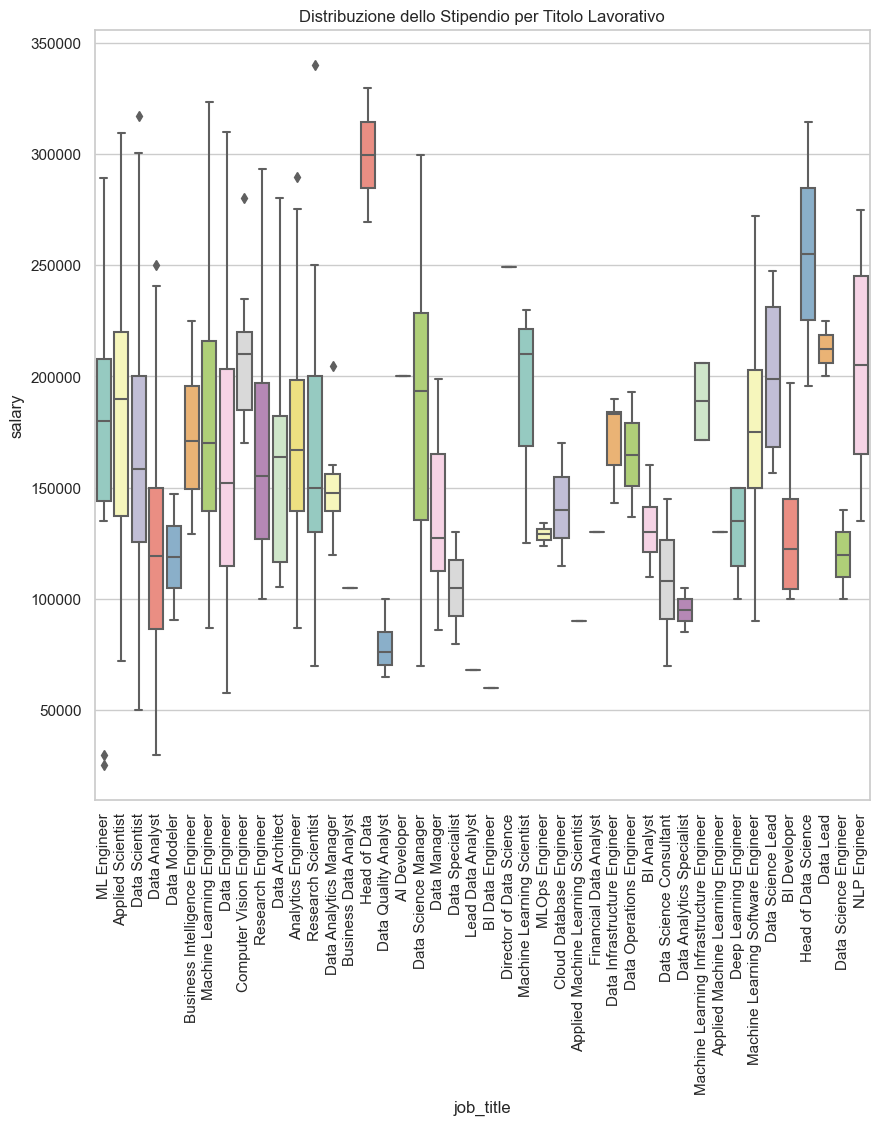

In [1423]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='job_title', y='salary', data=dataset_ridotto, palette='Set3')
plt.xticks(rotation=90)  # Per evitare sovrapposizioni dei titoli
plt.title('Distribuzione dello Stipendio per Titolo Lavorativo')
plt.show()
mean_salaries = dataset.groupby('job_title')['salary'].mean().reset_index()

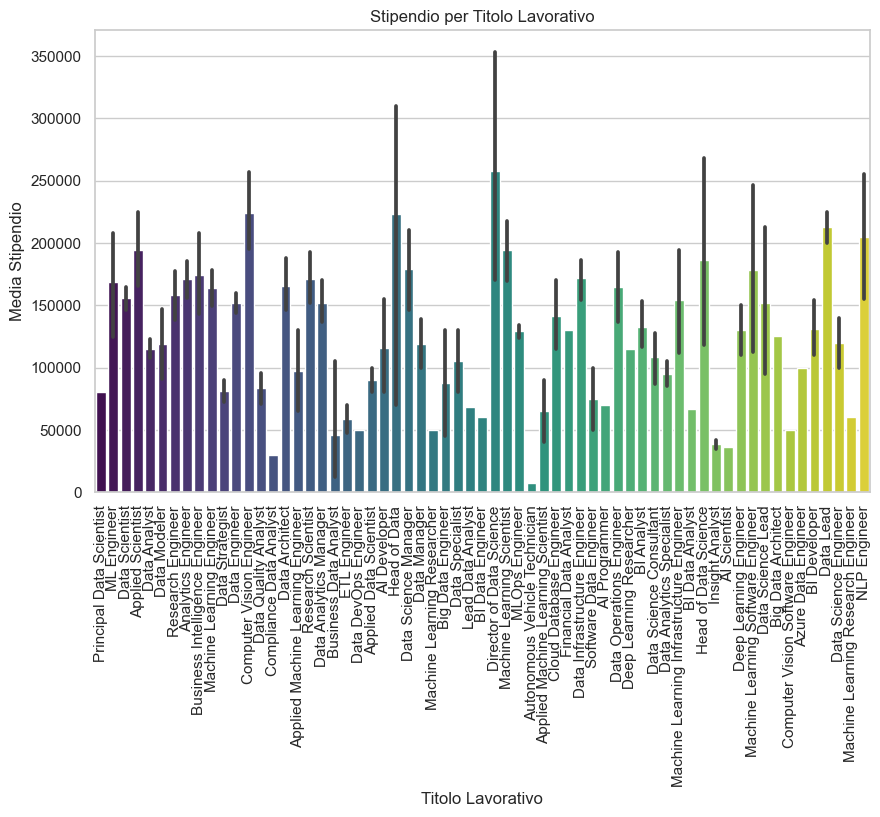

In [1424]:
# Creiamo il barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='job_title', y='salary', data=dataset, palette='viridis')
plt.xticks(rotation=90)  # Per evitare sovrapposizioni dei titoli
plt.title('Stipendio per Titolo Lavorativo')
plt.ylabel('Media Stipendio')
plt.xlabel('Titolo Lavorativo')
plt.show()

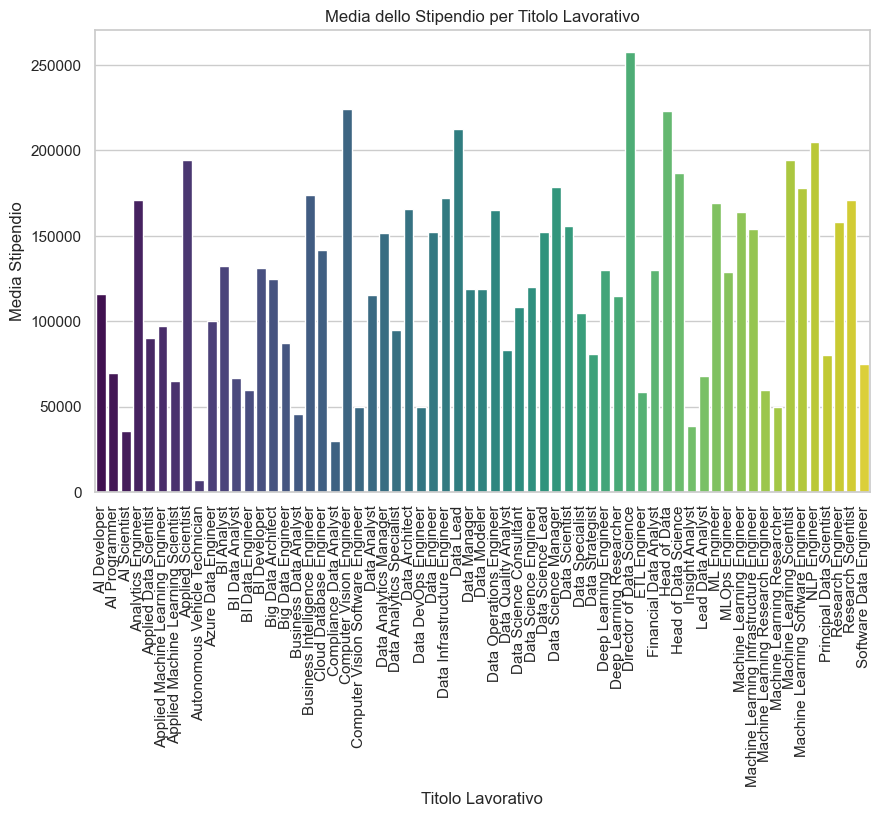

In [1425]:
# Creiamo il barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='job_title', y='salary', data=mean_salaries, palette='viridis')
plt.xticks(rotation=90)  # Per evitare sovrapposizioni dei titoli
plt.title('Media dello Stipendio per Titolo Lavorativo')
plt.ylabel('Media Stipendio')
plt.xlabel('Titolo Lavorativo')
plt.show()

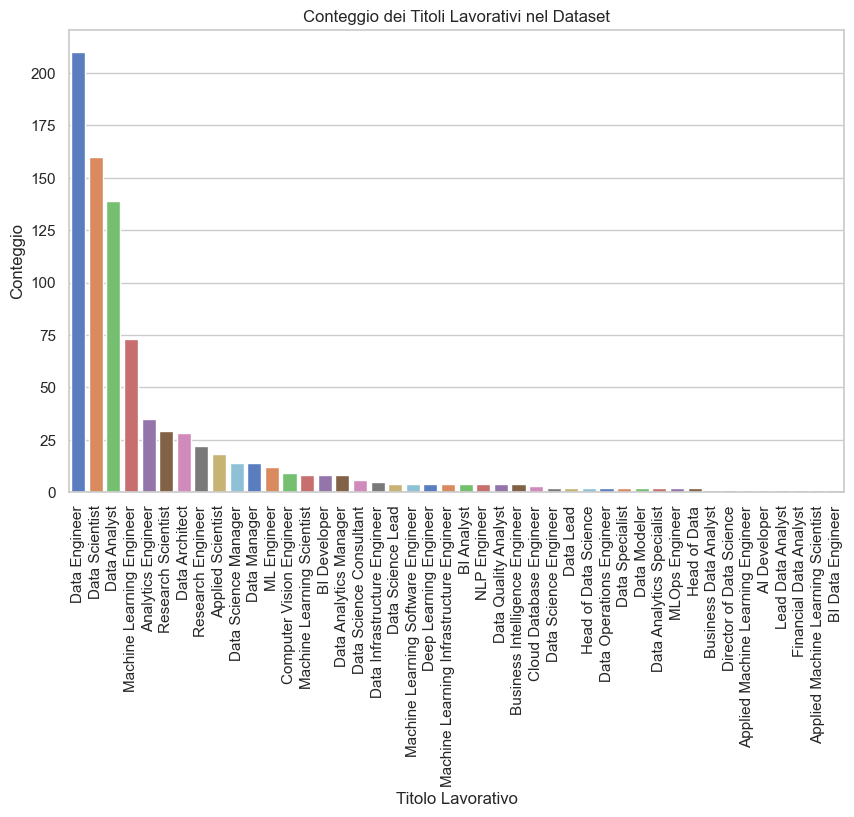

In [1426]:
title_counts = dataset_ridotto['job_title'].value_counts().reset_index()

# Creiamo il countplot
plt.figure(figsize=(10, 6))
sns.barplot(x='index', y='job_title', data=title_counts, palette='muted')
plt.xticks(rotation=90) # Per evitare sovrapposizioni dei titoli
plt.title('Conteggio dei Titoli Lavorativi nel Dataset')
plt.ylabel('Conteggio')
plt.xlabel('Titolo Lavorativo')
plt.show()

In [1427]:
import pandas as pd

valori_maggiori_salary_dataset_ridotto = dataset_ridotto['salary'].nlargest(10)

valori_maggiori_salary_dataset_ridotto

845     340000
228     329500
1116    323300
145     318300
488     317070
1396    314100
860     310000
1722    310000
68      309400
358     304000
Name: salary, dtype: int64

In [1428]:
#METTERE .DESCRIBE E IL RESTO CHE SI TROVA SU KAGGLE

In [1429]:
#PLOTTARE OGNI SINGOLA FEATURE E FARCI UN GRAFICO

In [1430]:
#FARE ALTRI GRAFICI CHE SON PRESENTI SU KAGGLE

## FASE 8: LO SCALING DEI DATI NELLE FEATURE (CON I GRAFICI)

### IL FILTRAGGIO DELLE FEATURE NUMERICHE

La prima operazione che è meglio svolgere è quella di comprendere quali sono le Feature numeriche in tutto il Dataset e in quello ridotto, capendo così quali sono le Feature da scalare o da effetuare l'Encoding in quanto solo le Feature numeriche sono scalabili ed è effetuabile l'Encoding

La descrizione di queste due operazioni (lo Scaling e l'Encoding) si trova più avanti

In [1431]:
# Filtraggio delle Feature numeriche del Dataset
dataset_solo_Feature_numeriche = dataset.select_dtypes(include = ["number"]) # Con "include" si può specificare i tipi di dati che si desidera filtrare

# Ora dataset_solo_Feature_numeriche è un Dataset contenente solo le Feature numeriche, cioè quelle con all'interno solo numeri
dataset_solo_Feature_numeriche

salary
0      80000
1      30000
2      25500
3     175000
4     120000
...      ...
1809  182000
1814  261500
1815  134500
1817  130000
1818   90000

[1049 rows x 1 columns]

In [1432]:
# Filtraggio delle Feature numeriche del Dataset ridotto
dataset_ridotto_solo_Feature_numeriche = dataset_ridotto.select_dtypes(include = ["number"]) # Con "include" si può specificare i tipi di dati che si desidera filtrare

# Ora dataset_ridotto_solo_Feature_numeriche è un Dataset contenente solo le Feature numeriche, cioè quelle con all'interno solo numeri
dataset_ridotto_solo_Feature_numeriche

salary
1      30000
2      25500
5     222200
6     136000
9     147100
...      ...
1809  182000
1814  261500
1815  134500
1817  130000
1818   90000

[859 rows x 1 columns]

### IL MIN-MAX SCALING

Il Min-Max scaling acquisisce il valore Max (il più alto valore della Feature "salary" in questo caso) e gli cambia il valore a 1. Dopo acquisisce il valore Min, quindi quello minimo sempre della Feature "salary", e lo transforma in 0. Infine gli altri valori vengono scalati tra 0 e 1 (esclusi)

La sua formula vera e propria è:

x scalata = (x - valore minimo di x)/(valore massimo di x - valore minimo di x)

#### PER IL DATASET

In [1433]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Min-Max scaling solo delle colonne numeriche
min_max_scaling_dataset = MinMaxScaler()
min_max_scaling_dati_dataset = min_max_scaling_dataset.fit_transform(dataset_solo_Feature_numeriche)
min_max_scaling_feature_dataset = pd.DataFrame(min_max_scaling_dati_dataset, columns = dataset_solo_Feature_numeriche.columns)
min_max_scaling_feature_dataset

salary
0     0.145129
1     0.045726
2     0.036779
3     0.333996
4     0.224652
...        ...
1044  0.347913
1045  0.505964
1046  0.253479
1047  0.244533
1048  0.165010

[1049 rows x 1 columns]

In [1434]:
# Per provare l'effettiva riuscita dello Min Max Scaling bisogna ricavare i primi numeri maggiori e minori del nuovo Dataset scalato
valore_minimo_min_max_scaling_dataset = min_max_scaling_feature_dataset.iloc[min_max_scaling_feature_dataset.min(axis = 1).idxmin()] # Utilizza il metodo iloc per indicare una riga o una Feature del Dataset scalato, in questo caso non si può indicare direttamente il numero ma attraverso il comando min si riesce a ricavare il numero minore del Dataset mentre con idxmin si indica che dev'essere il primo numero minore nel Dataset 
valore_massimo_min_max_scaling_dataset = min_max_scaling_feature_dataset.iloc[min_max_scaling_feature_dataset.max(axis = 1).idxmax()] # Utilizza il metodo iloc per indicare una riga o una Feature del Dataset scalato, in questo caso non si può indicare direttamente il numero ma attraverso il comando max si riesce a ricavare il numero maggiore del Dataset mentre con idxmin si indica che dev'essere il primo numero maggiore nel Dataset 

In [1435]:
print("Il valore minimo nel Dataset scalato con il Min-Max scaling è:")
print(valore_minimo_min_max_scaling_dataset) # Stampa del valore minimo
print("Il valore massimo nel Dataset scalato con il Min-Max scaling è:")
print(valore_massimo_min_max_scaling_dataset) # Stampa del valore massimo

Il valore minimo nel Dataset scalato con il Min-Max scaling è:
salary    0.0
Name: 429, dtype: float64
Il valore massimo nel Dataset scalato con il Min-Max scaling è:
salary    1.0
Name: 79, dtype: float64


In [1436]:
print("Informazioni sulla riga del valore minimo nel Dataset scalato con il Min-Max scaling:")
print(min_max_scaling_feature_dataset.iloc[429]) # Utilizzare il metodo iloc per indicare il numero o il nome di una riga o di una Feature di cui si desidera visualizzare
print("Informazioni sulla riga del valore massimo nel Dataset scalato con il Min-Max scaling:")
print(min_max_scaling_feature_dataset.iloc[79])

Informazioni sulla riga del valore minimo nel Dataset scalato con il Min-Max scaling:
salary    0.0
Name: 429, dtype: float64
Informazioni sulla riga del valore massimo nel Dataset scalato con il Min-Max scaling:
salary    1.0
Name: 79, dtype: float64


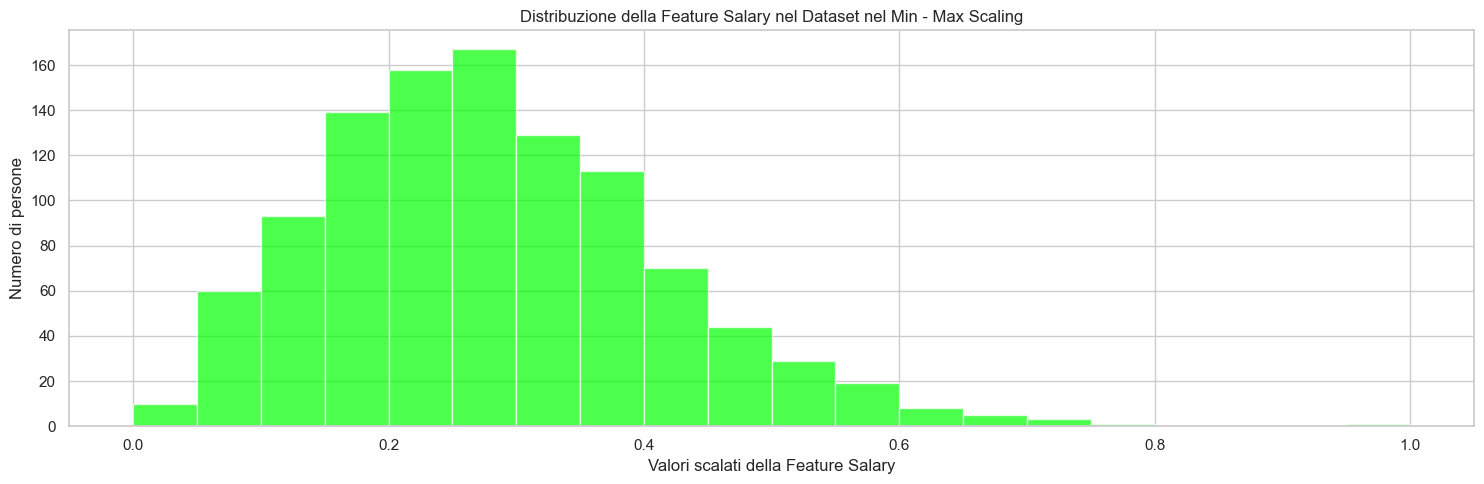

In [1437]:
import matplotlib.pyplot as plt

colore_barre = ["lime"]

# Creazione dei subplot per gli istogrammi
fig, axes = plt.subplots(nrows = 1, ncols = len(min_max_scaling_feature_dataset.columns), figsize = (15, 5)) # Con "nrows" si indicano il numero di righe mentre con "ncols" si indicano il numero di colonne, che in questo caso sono pari alla lunghezza del Min-Max scaling

# Se c'è solo una colonna, axes automaticamente non sarà una lista, quindi lo si mette in una lista per far iterare il ciclo for sottostante comunque
if len(min_max_scaling_feature_dataset.columns) == 1:
    axes = [axes]

# Loop attraverso le colonne per disegnare gli istogrammi
for i, col in enumerate(min_max_scaling_feature_dataset.columns):
    axes[i].hist(min_max_scaling_feature_dataset[col], bins = 20, alpha = 0.7, color = colore_barre) # "col" rappresenta una colonna specifica del Dataset scalato
    axes[i].set_title("Distribuzione della Feature Salary nel Dataset nel Min - Max Scaling") # Imposta il titolo
    axes[i].set_xlabel("Valori scalati della Feature Salary") # Imposta l'etichetta sull'asse x
    axes[i].set_ylabel("Numero di persone") # Imposta l'etichetta sull'asse y

plt.tight_layout()
plt.show()

#### PER IL DATASET RIDOTTO

In [1438]:
# Min-Max scaling solo delle colonne numeriche
min_max_scaling_dataset_ridotto = MinMaxScaler()
min_max_scaling_dati_dataset_ridotto = min_max_scaling_dataset_ridotto.fit_transform(dataset_ridotto_solo_Feature_numeriche)
min_max_scaling_feature_dataset_ridotto = pd.DataFrame(min_max_scaling_dati_dataset_ridotto, columns = dataset_ridotto_solo_Feature_numeriche.columns)
min_max_scaling_feature_dataset_ridotto

salary
0    0.014308
1    0.000000
2    0.625437
3    0.351351
4    0.386645
..        ...
854  0.497615
855  0.750397
856  0.346582
857  0.332273
858  0.205087

[859 rows x 1 columns]

In [1439]:
# Per provare l'effettiva riuscita dello Min Max Scaling bisogna ricavare i primi numeri maggiori e minori del nuovo Dataset ridotto scalato
valore_minimo_min_max_scaling_dataset_ridotto = min_max_scaling_feature_dataset_ridotto.iloc[min_max_scaling_feature_dataset_ridotto.min(axis = 1).idxmin()] # Utilizza il metodo iloc per indicare una riga o una Feature del Dataset ridotto scalato, in questo caso non si può indicare direttamente il numero ma attraverso il comando min si riesce a ricavare il numero minore del Dataset ridotto mentre con idxmin si indica che dev'essere il primo numero minore nel Dataset ridotto 
valore_massimo_min_max_scaling_dataset_ridotto = min_max_scaling_feature_dataset_ridotto.iloc[min_max_scaling_feature_dataset_ridotto.max(axis = 1).idxmax()] # Utilizza il metodo iloc per indicare una riga o una Feature del Dataset ridotto scalato, in questo caso non si può indicare direttamente il numero ma attraverso il comando max si riesce a ricavare il numero maggiore del Dataset ridotto mentre con idxmin si indica che dev'essere il primo numero maggiore nel Dataset ridotto 

In [1440]:
print("Il valore minimo nel Dataset ridotto scalato con il Min-Max scaling è:")
print(valore_minimo_min_max_scaling_dataset_ridotto) # Stampa del valore minimo
print("Il valore massimo nel Dataset ridotto scalato con il Min-Max scaling è:")
print(valore_massimo_min_max_scaling_dataset_ridotto) # Stampa del valore massimo

Il valore minimo nel Dataset ridotto scalato con il Min-Max scaling è:
salary    0.0
Name: 1, dtype: float64
Il valore massimo nel Dataset ridotto scalato con il Min-Max scaling è:
salary    1.0
Name: 512, dtype: float64


In [1441]:
print("Informazioni sulla riga del valore minimo nel Dataset scalato con il Min-Max scaling:")
print(min_max_scaling_feature_dataset_ridotto.iloc[1]) # Utilizzare il metodo iloc per indicare il numero o il nome di una riga o di una Feature di cui si desidera visualizzare
print("Informazioni sulla riga del valore massimo nel Dataset scalato con il Min-Max scaling:")
print(min_max_scaling_feature_dataset_ridotto.iloc[512])

Informazioni sulla riga del valore minimo nel Dataset scalato con il Min-Max scaling:
salary    0.0
Name: 1, dtype: float64
Informazioni sulla riga del valore massimo nel Dataset scalato con il Min-Max scaling:
salary    1.0
Name: 512, dtype: float64


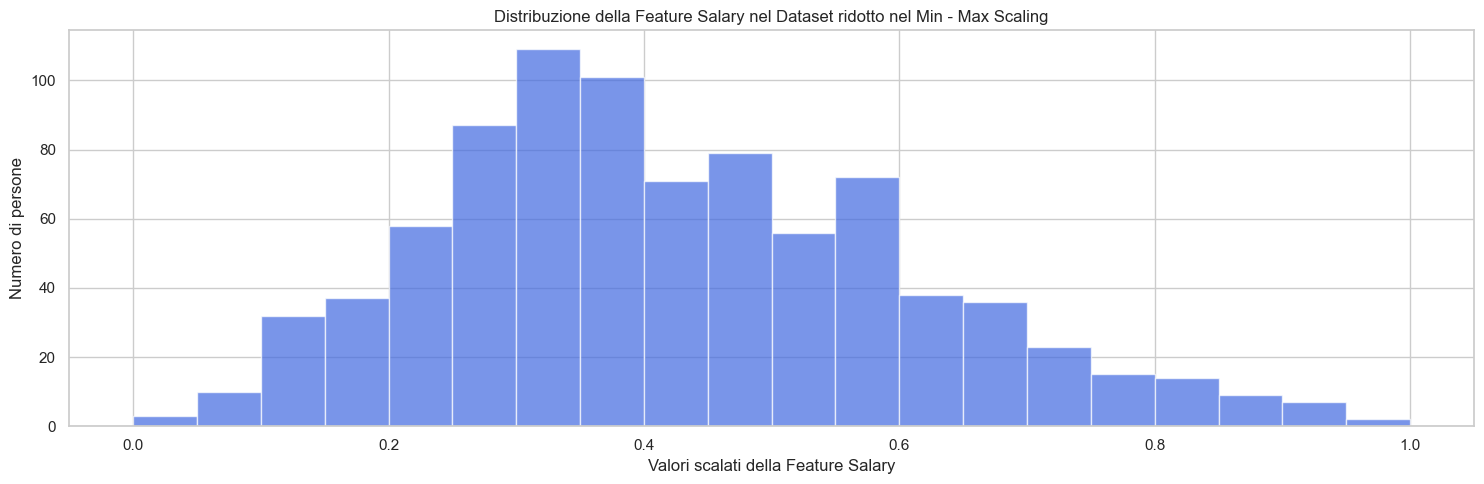

In [1442]:
colore_barre = ["royalblue"]

# Creazione dei subplot per gli istogrammi
fig, axes = plt.subplots(nrows = 1, ncols = len(min_max_scaling_feature_dataset_ridotto.columns), figsize = (15, 5)) # Con "nrows" si indicano il numero di righe mentre con "ncols" si indicano il numero di colonne, che in questo caso sono pari alla lunghezza del Min-Max scaling

# Se c'è solo una colonna, axes automaticamente non sarà una lista, quindi lo si mette in una lista per far iterare il ciclo for sottostante comunque
if len(min_max_scaling_feature_dataset_ridotto.columns) == 1:
    axes = [axes]

# Loop attraverso le colonne per disegnare gli istogrammi
for i, col in enumerate(min_max_scaling_feature_dataset_ridotto.columns):
    axes[i].hist(min_max_scaling_feature_dataset_ridotto[col], bins = 20, alpha = 0.7, color = colore_barre) # "col" rappresenta una colonna specifica del Dataset ridotto scalato
    axes[i].set_title("Distribuzione della Feature Salary nel Dataset ridotto nel Min - Max Scaling") # Imposta il titolo
    axes[i].set_xlabel("Valori scalati della Feature Salary") # Imposta l'etichetta sull'asse x
    axes[i].set_ylabel("Numero di persone") # Imposta l'etichetta sull'asse y

plt.tight_layout()
plt.show()

### LO Z-SCORE SCALING O LO STANDARD SCALING

Lo Z-score scaling o Standard scaling scala i valori usando la media dei valori e la deviazione standard applicando la seguente formula:

x_scalata = (x - valore_medio_di_x)/deviazione_standard_di_x

#### PER IL DATASET

In [1443]:
# Z-score scaling solo delle colonne numeriche
standard_scaling_dataset = StandardScaler()
standard_scaling_dati_dataset = standard_scaling_dataset.fit_transform(dataset_solo_Feature_numeriche)
standard_scaling_feature_dataset = pd.DataFrame(standard_scaling_dati_dataset, columns = dataset_solo_Feature_numeriche.columns)
standard_scaling_feature_dataset

salary
0    -1.039452
1    -1.796170
2    -1.864275
3     0.398313
4    -0.434077
...        ...
1044  0.504254
1045  1.707436
1046 -0.214629
1047 -0.282733
1048 -0.888108

[1049 rows x 1 columns]

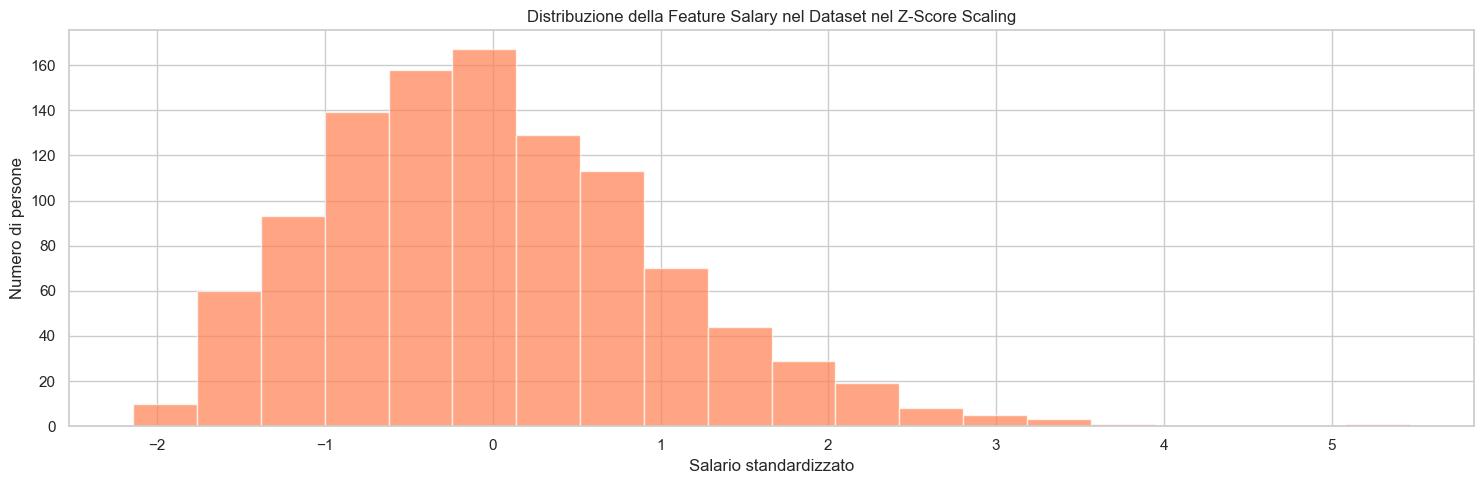

In [1444]:
import matplotlib.pyplot as plt

colore_barre = ["coral"]

# Numero di colonne nel Dataset scalato
numero_feature_standard_scaling_dataset = len(standard_scaling_feature_dataset.columns)

# Creazione dei subplot per gli istogrammi
fig, axes = plt.subplots(nrows = 1, ncols = numero_feature_standard_scaling_dataset, figsize = (15, 5)) # Con "nrows" si indicano il numero di righe mentre con "ncols" si indicano il numero di colonne, che in questo caso sono pari alla lunghezza del Min-Max scaling

# Se c'è solo una colonna, axes automaticamente non sarà una lista, quindi lo si mette in una lista per far iterare il ciclo for sottostante comunque
if numero_feature_standard_scaling_dataset == 1:
    axes = [axes]

# Loop attraverso le colonne per disegnare gli istogrammi
for i, col in enumerate(standard_scaling_feature_dataset.columns):
    axes[i].hist(standard_scaling_feature_dataset[col], bins = 20, alpha = 0.7, color = colore_barre)
    axes[i].set_title(col) # "col" rappresenta una colonna specifica del Dataset scalato
    axes[i].set_title("Distribuzione della Feature Salary nel Dataset nel Z-Score Scaling") # Imposta il titolo
    axes[i].set_xlabel("Salario standardizzato") # Imposta l'etichetta sull'asse x
    axes[i].set_ylabel("Numero di persone") # Imposta l'etichetta sull'asse y

plt.tight_layout()
plt.show()

#### PER IL DATASET RIDOTTO

In [1445]:
# Z-score scaling solo delle colonne numeriche
standard_scaling_dataset_ridotto = StandardScaler()
standard_scaling_dati_dataset_ridotto = standard_scaling_dataset_ridotto.fit_transform(dataset_ridotto_solo_Feature_numeriche)
standard_scaling_feature_dataset_ridotto = pd.DataFrame(standard_scaling_dati_dataset_ridotto, columns = dataset_ridotto_solo_Feature_numeriche.columns)
standard_scaling_feature_dataset_ridotto

salary
0   -2.226773
1   -2.304900
2    1.110097
3   -0.386460
4   -0.193748
..        ...
854  0.412167
855  1.792402
856 -0.412502
857 -0.490628
858 -1.185086

[859 rows x 1 columns]

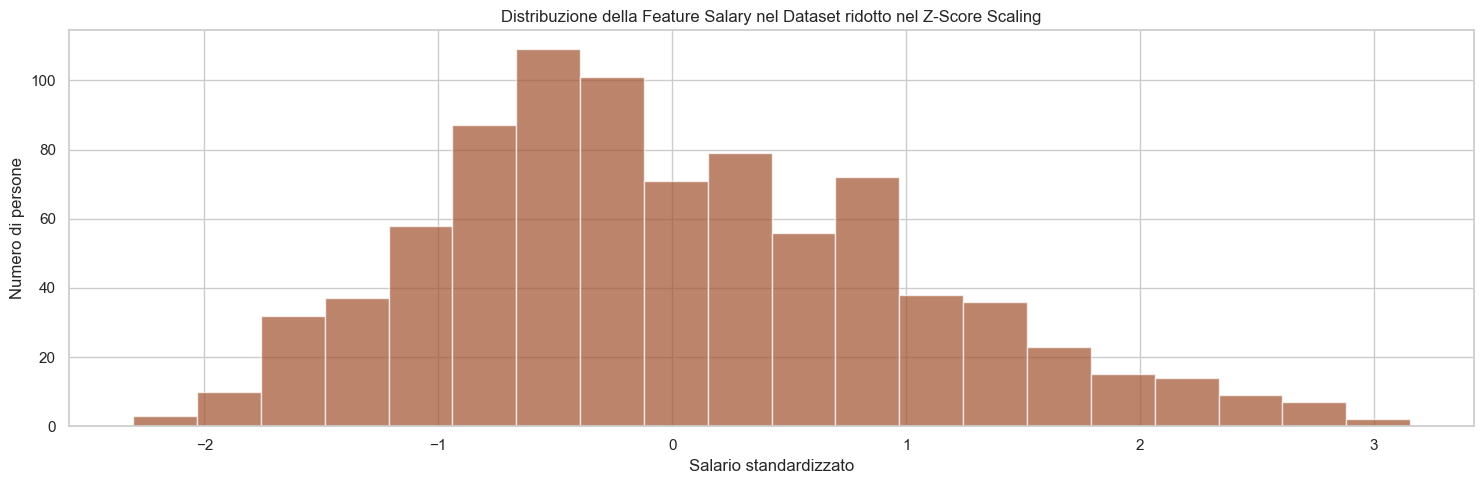

In [1446]:
import matplotlib.pyplot as plt

colore_barre = ["sienna"]

# Numero di colonne nel Dataset ridotto scalato
numero_feature_standard_scaling_dataset_ridotto = len(standard_scaling_feature_dataset_ridotto.columns) # Con "nrows" si indicano il numero di righe mentre con "ncols" si indicano il numero di colonne, che in questo caso sono pari alla lunghezza del Min-Max scaling

# Creazione dei subplot per gli istogrammi
fig, axes = plt.subplots(nrows = 1, ncols = numero_feature_standard_scaling_dataset_ridotto, figsize = (15, 5))

# Se c'è solo una colonna, axes automaticamente non sarà una lista, quindi lo si mette in una lista per far iterare il ciclo for sottostante comunque
if numero_feature_standard_scaling_dataset_ridotto == 1:
    axes = [axes]

# Loop attraverso le colonne per disegnare gli istogrammi
for i, col in enumerate(standard_scaling_feature_dataset_ridotto.columns):
    axes[i].hist(standard_scaling_feature_dataset_ridotto[col], bins = 20, alpha = 0.7, color = colore_barre)
    axes[i].set_title(col) # "col" rappresenta una colonna specifica del Dataset ridotto scalato
    axes[i].set_title("Distribuzione della Feature Salary nel Dataset ridotto nel Z-Score Scaling") # Imposta il titolo
    axes[i].set_xlabel("Salario standardizzato") # Imposta l'etichetta sull'asse x
    axes[i].set_ylabel("Numero di persone") # Imposta l'etichetta sull'asse y

plt.tight_layout()
plt.show()

### IL ROBUST SCALING

Il Robust scaling scala i dati in modo che possano essere confrontati tra di loro senza essere influenzati da Outliers, questo può essere utile quando nel Dataset a cui si sta lavorando esistono degli Outliers che però non sono stati precedemente eliminati o gestiti. Il Robust scaling quindi riesce a scalare i dati senza che gli Outliers presenti possano "sballare" lo scaling, come invece sarebbe successo nei casi precedenti con le altre tipologie di scaling se non si gestisce prima gli Outliers presenti nel Dataset

#### PER IL DATASET

In [1447]:
# Robust scaling solo delle colonne numeriche
robust_scaling_dataset = RobustScaler()
robust_scaling_dati_dataset = robust_scaling_dataset.fit_transform(dataset_solo_Feature_numeriche)
robust_scaling_feature_dataset = pd.DataFrame(robust_scaling_dati_dataset, columns = dataset_solo_Feature_numeriche.columns)
robust_scaling_feature_dataset

salary
0    -0.718424
1    -1.297798
2    -1.349942
3     0.382387
4    -0.254925
...        ...
1044  0.463499
1045  1.384705
1046 -0.086906
1047 -0.139050
1048 -0.602549

[1049 rows x 1 columns]

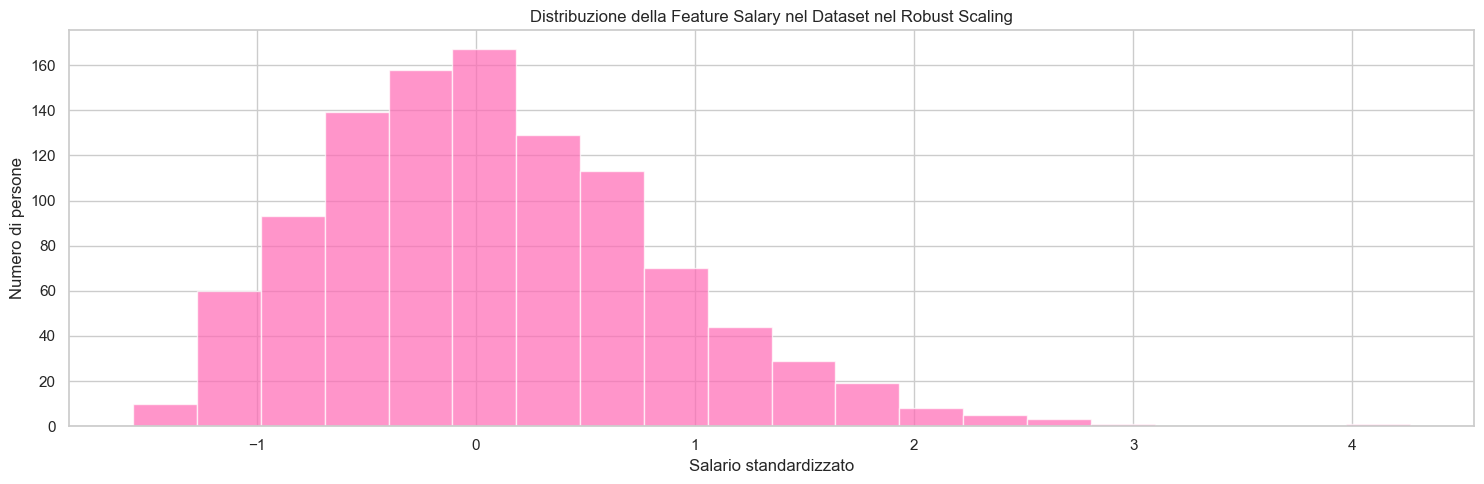

In [1448]:
import matplotlib.pyplot as plt

colore_barre = ["hotpink"]

# Numero di colonne nel Dataset scalato
numero_feature_robust_scaling_dataset = len(robust_scaling_feature_dataset.columns) # Con "nrows" si indicano il numero di righe mentre con "ncols" si indicano il numero di colonne, che in questo caso sono pari alla lunghezza del Min-Max scaling

# Creazione dei subplot per gli istogrammi
fig, axes = plt.subplots(nrows = 1, ncols = numero_feature_robust_scaling_dataset, figsize = (15, 5))

# Se c'è solo una colonna, axes automaticamente non sarà una lista, quindi lo si mette in una lista per far iterare il ciclo for sottostante comunque
if numero_feature_robust_scaling_dataset == 1:
    axes = [axes]

# Loop attraverso le colonne per disegnare gli istogrammi
for i, col in enumerate(robust_scaling_feature_dataset.columns):
    axes[i].hist(robust_scaling_feature_dataset[col], bins = 20, alpha = 0.7, color = colore_barre)
    axes[i].set_title(col) # "col" rappresenta una colonna specifica del Dataset scalato
    axes[i].set_title("Distribuzione della Feature Salary nel Dataset nel Robust Scaling") # Imposta il titolo
    axes[i].set_xlabel("Salario standardizzato") # Imposta l'etichetta sull'asse x
    axes[i].set_ylabel("Numero di persone") # Imposta l'etichetta sull'asse y

plt.tight_layout()
plt.show()

#### PER IL DATASET RIDOTTO

In [1449]:
# Robust scaling solo delle colonne numeriche
robust_scaling_dataset_ridotto = RobustScaler()
robust_scaling_dati_dataset_ridotto = robust_scaling_dataset_ridotto.fit_transform(dataset_ridotto_solo_Feature_numeriche)
robust_scaling_feature_dataset_ridotto = pd.DataFrame(robust_scaling_dati_dataset_ridotto, columns = dataset_ridotto_solo_Feature_numeriche.columns)
robust_scaling_feature_dataset_ridotto

salary
0   -1.438332
1   -1.492269
2    0.865396
3   -0.167805
4   -0.034760
..        ...
854  0.383555
855  1.336450
856 -0.185784
857 -0.239722
858 -0.719166

[859 rows x 1 columns]

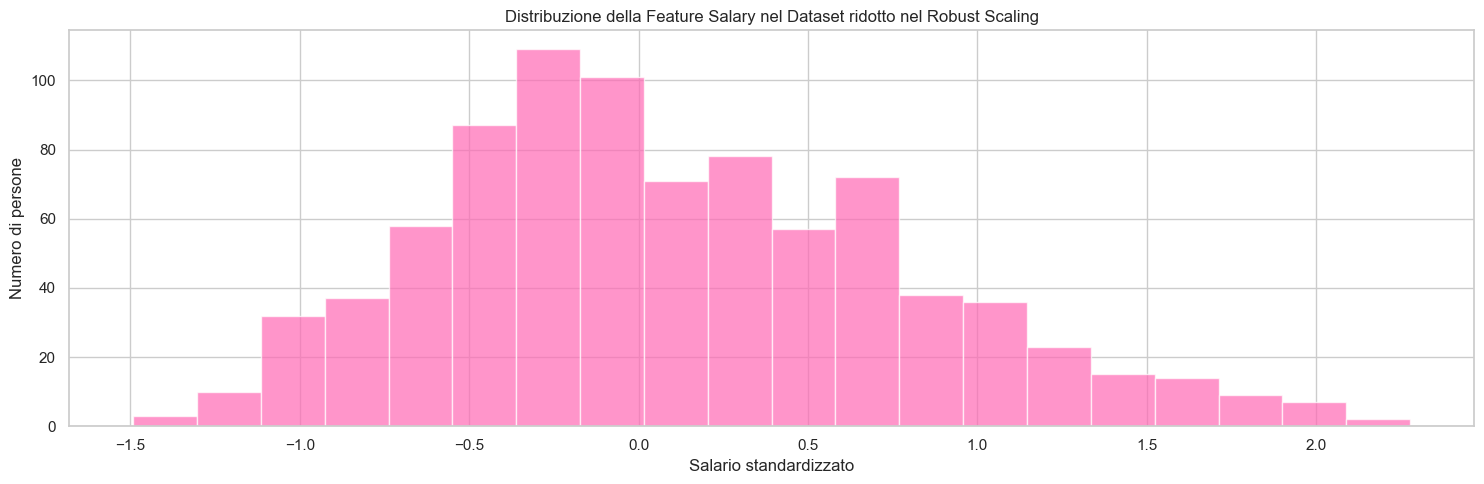

In [1450]:
import matplotlib.pyplot as plt

colore_barre = ["hotpink"]

# Numero di colonne nel Dataset ridotto scalato
numero_feature_robust_scaling_dataset_ridotto = len(robust_scaling_feature_dataset_ridotto.columns) # Con "nrows" si indicano il numero di righe mentre con "ncols" si indicano il numero di colonne, che in questo caso sono pari alla lunghezza del Min-Max scaling

# Creazione dei subplot per gli istogrammi
fig, axes = plt.subplots(nrows = 1, ncols = numero_feature_robust_scaling_dataset_ridotto, figsize = (15, 5))

# Se c'è solo una colonna, axes automaticamente non sarà una lista, quindi lo si mette in una lista per far iterare il ciclo for sottostante comunque
if numero_feature_robust_scaling_dataset_ridotto == 1:
    axes = [axes]

# Loop attraverso le colonne per disegnare gli istogrammi
for i, col in enumerate(robust_scaling_feature_dataset_ridotto.columns):
    axes[i].hist(robust_scaling_feature_dataset_ridotto[col], bins = 20, alpha = 0.7, color = colore_barre)
    axes[i].set_title(col) # "col" rappresenta una colonna specifica del Dataset ridotto scalato
    axes[i].set_title("Distribuzione della Feature Salary nel Dataset ridotto nel Robust Scaling") # Imposta il titolo
    axes[i].set_xlabel("Salario standardizzato") # Imposta l'etichetta sull'asse x
    axes[i].set_ylabel("Numero di persone") # Imposta l'etichetta sull'asse y

plt.tight_layout()
plt.show()

### IL MIN MAX SCALING SALVATO NEL DATASET E NEL DATASET RIDOTTO

In [1451]:
dataset

experience_level                  job_title  salary company_location
0                  SE   Principal Data Scientist   80000               ES
1                  MI                ML Engineer   30000               US
2                  MI                ML Engineer   25500               US
3                  SE             Data Scientist  175000               CA
4                  SE             Data Scientist  120000               CA
...               ...                        ...     ...              ...
1809               SE              Data Engineer  182000               US
1814               SE  Machine Learning Engineer  261500               US
1815               SE  Machine Learning Engineer  134500               US
1817               MI             Data Scientist  130000               US
1818               MI             Data Scientist   90000               US

[1049 rows x 4 columns]

In [1452]:
dataset_ridotto

experience_level                  job_title  salary company_location
1                  MI                ML Engineer   30000               US
2                  MI                ML Engineer   25500               US
5                  SE          Applied Scientist  222200               US
6                  SE          Applied Scientist  136000               US
9                  SE             Data Scientist  147100               US
...               ...                        ...     ...              ...
1809               SE              Data Engineer  182000               US
1814               SE  Machine Learning Engineer  261500               US
1815               SE  Machine Learning Engineer  134500               US
1817               MI             Data Scientist  130000               US
1818               MI             Data Scientist   90000               US

[859 rows x 4 columns]

In [1453]:
nuovi_dati_salary_dataset = min_max_scaling_feature_dataset["salary"].tolist()

In [1454]:
nuovi_dati_salary_dataset[:50] # Con i due punti prima del numero dentro la parentesi quadra si indicano i primi 50 numeri della lista

[0.14512922465208747,
 0.04572564612326044,
 0.036779324055666,
 0.33399602385685884,
 0.2246520874751491,
 0.42783300198807156,
 0.25646123260437376,
 0.42147117296222664,
 0.2664015904572564,
 0.2785288270377733,
 0.16640159045725644,
 0.24453280318091447,
 0.18489065606361826,
 0.4108548707753479,
 0.24604373757455267,
 0.2785288270377733,
 0.16640159045725644,
 0.3240556660039761,
 0.2842942345924453,
 0.2842942345924453,
 0.20477137176938368,
 0.532803180914513,
 0.33200795228628227,
 0.44333996023856853,
 0.27077534791252483,
 0.43339960238568587,
 0.29701789264413514,
 0.3836978131212723,
 0.24453280318091447,
 0.16500994035785285,
 0.12922465208747513,
 0.48946322067594433,
 0.16640159045725644,
 0.6676143141153081,
 0.35306163021868786,
 0.30914512922465204,
 0.24453280318091447,
 0.19558648111332005,
 0.1143141153081511,
 0.18489065606361826,
 0.04572564612326044,
 0.392882703777336,
 0.20612326043737572,
 0.5242604373757456,
 0.42640954274353876,
 0.40904572564612324,
 0.353

In [1455]:
nuovi_dati_salary_dataset[-50:] # Con i due punti dopo il numero dentro la parentesi quadra iniseme al meno del numero si indicano gli ultimi 50 numeri della lista

[0.3156063618290258,
 0.1644135188866799,
 0.0959244532803181,
 0.532803180914513,
 0.33399602385685884,
 0.3346083499005964,
 0.18629423459244532,
 0.45328031809145125,
 0.2544731610337972,
 0.6023856858846919,
 0.441351888667992,
 0.5607872763419484,
 0.38837574552683896,
 0.11530815109343935,
 0.055666003976143144,
 0.2246520874751491,
 0.18489065606361826,
 0.4458250497017892,
 0.26192842942345923,
 0.3817097415506958,
 0.3081510934393638,
 0.2842942345924453,
 0.2246520874751491,
 0.2842942345924453,
 0.18489065606361826,
 0.5279324055666004,
 0.19483101391650098,
 0.3588469184890656,
 0.11332007952286281,
 0.45328031809145125,
 0.3538767395626242,
 0.27057654075546717,
 0.2107355864811133,
 0.268389662027833,
 0.34504970178926436,
 0.21558648111332007,
 0.47932405566600395,
 0.2761431411530815,
 0.20477137176938368,
 0.10934393638170974,
 0.08946322067594434,
 0.08151093439363817,
 0.06163021868787276,
 0.20477137176938368,
 0.4552683896620278,
 0.3479125248508946,
 0.50596421471

In [1456]:
print("Il totale dei nuovi valori della variabile salary nel Dataset è:")
print(len(nuovi_dati_salary_dataset)) # Così si conta quanti numeri ci sono dentro questa variabile

Il totale dei nuovi valori della variabile salary nel Dataset è:
1049


In [1457]:
dataset

experience_level                  job_title  salary company_location
0                  SE   Principal Data Scientist   80000               ES
1                  MI                ML Engineer   30000               US
2                  MI                ML Engineer   25500               US
3                  SE             Data Scientist  175000               CA
4                  SE             Data Scientist  120000               CA
...               ...                        ...     ...              ...
1809               SE              Data Engineer  182000               US
1814               SE  Machine Learning Engineer  261500               US
1815               SE  Machine Learning Engineer  134500               US
1817               MI             Data Scientist  130000               US
1818               MI             Data Scientist   90000               US

[1049 rows x 4 columns]

In [1458]:
nuovi_dati_salary_dataset_ridotto = min_max_scaling_feature_dataset_ridotto["salary"].tolist()

In [1459]:
nuovi_dati_salary_dataset_ridotto[:50]

[0.014308426073131958,
 0.0,
 0.6254372019077901,
 0.35135135135135137,
 0.3866454689984102,
 0.20731319554848965,
 0.3322734499205087,
 0.2368839427662957,
 0.5982829888712242,
 0.3346899841017488,
 0.3866454689984102,
 0.20731319554848965,
 0.4594594594594595,
 0.3958664546899841,
 0.3958664546899841,
 0.2686804451510334,
 0.6343402225755166,
 0.41621621621621624,
 0.5548489666136724,
 0.3322734499205087,
 0.7240063593004769,
 0.20731319554848965,
 0.5058505564387916,
 0.4356120826709062,
 0.3322734499205087,
 0.2539904610492846,
 0.12400635930047693,
 0.5695389507154214,
 0.27084260731319554,
 0.7796597774244833,
 0.623160572337043,
 0.595389507154213,
 0.507154213036566,
 0.751987281399046,
 0.6979332273449921,
 0.7942766295707473,
 0.5023847376788553,
 0.6136724960254372,
 0.5519809220985692,
 0.565341812400636,
 0.31192368839427664,
 0.5202225755166932,
 0.36089030206677264,
 0.7416534181240064,
 0.507154213036566,
 0.6550079491255962,
 0.4467408585055644,
 0.4674085850556439,
 0

In [1460]:
nuovi_dati_salary_dataset_ridotto[-50:]

[0.5421303656597773,
 0.2686804451510334,
 0.319872813990461,
 0.1478537360890302,
 0.3640699523052464,
 0.6836248012718602,
 0.356120826709062,
 0.5151033386327504,
 0.4435612082670906,
 0.445945945945946,
 0.6343402225755166,
 0.445945945945946,
 0.7933227344992051,
 0.47535771065182825,
 0.4763370429252782,
 0.2391287758346582,
 0.6661367249602543,
 0.3481717011128776,
 0.904610492845787,
 0.6470588235294117,
 0.8380794912559619,
 0.5623306836248012,
 0.3004769475357711,
 0.2368839427662957,
 0.6542130365659777,
 0.3600953895071542,
 0.5516693163751987,
 0.4340222575516693,
 0.3958664546899841,
 0.3004769475357711,
 0.3958664546899841,
 0.2368839427662957,
 0.7855325914149442,
 0.2527821939586645,
 0.5151033386327504,
 0.12241653418124007,
 0.6661367249602543,
 0.507154213036566,
 0.37042925278219396,
 0.4930365659777424,
 0.2859777424483307,
 0.7077901430842608,
 0.38282988871224166,
 0.2686804451510334,
 0.6693163751987281,
 0.49761526232114467,
 0.7503974562798092,
 0.34658187599

In [1461]:
print("Il totale dei nuovi valori della variabile salary nel Dataset ridotto è:")
print(len(nuovi_dati_salary_dataset_ridotto))

Il totale dei nuovi valori della variabile salary nel Dataset ridotto è:
859


In [1462]:
dataset_ridotto

experience_level                  job_title  salary company_location
1                  MI                ML Engineer   30000               US
2                  MI                ML Engineer   25500               US
5                  SE          Applied Scientist  222200               US
6                  SE          Applied Scientist  136000               US
9                  SE             Data Scientist  147100               US
...               ...                        ...     ...              ...
1809               SE              Data Engineer  182000               US
1814               SE  Machine Learning Engineer  261500               US
1815               SE  Machine Learning Engineer  134500               US
1817               MI             Data Scientist  130000               US
1818               MI             Data Scientist   90000               US

[859 rows x 4 columns]

## FASE 9: L'ENCODING DEI DATI DELLE FEATURE NEL DATASET E NEL DATASET RIDOTTO

In [1463]:
dataset

experience_level                  job_title  salary company_location
0                  SE   Principal Data Scientist   80000               ES
1                  MI                ML Engineer   30000               US
2                  MI                ML Engineer   25500               US
3                  SE             Data Scientist  175000               CA
4                  SE             Data Scientist  120000               CA
...               ...                        ...     ...              ...
1809               SE              Data Engineer  182000               US
1814               SE  Machine Learning Engineer  261500               US
1815               SE  Machine Learning Engineer  134500               US
1817               MI             Data Scientist  130000               US
1818               MI             Data Scientist   90000               US

[1049 rows x 4 columns]

In [1464]:
dataset_ridotto

experience_level                  job_title  salary company_location
1                  MI                ML Engineer   30000               US
2                  MI                ML Engineer   25500               US
5                  SE          Applied Scientist  222200               US
6                  SE          Applied Scientist  136000               US
9                  SE             Data Scientist  147100               US
...               ...                        ...     ...              ...
1809               SE              Data Engineer  182000               US
1814               SE  Machine Learning Engineer  261500               US
1815               SE  Machine Learning Engineer  134500               US
1817               MI             Data Scientist  130000               US
1818               MI             Data Scientist   90000               US

[859 rows x 4 columns]

### L'ENCODING ONE HOT DELLE FEATURE DEL DATASET

In [1465]:
# Applicazione dell'encoding One-Hot in una Feature nel Dataset
dataset_encoding = pd.get_dummies(dataset, columns = ["experience_level"]) # il comando "get_dummies" serve ad applicare l'Encoding nel Dataset secondo la Feature indicata

# Visualizziamo il DataFrame dopo l'Encoding
dataset_encoding

job_title  salary company_location  experience_level_EN  \
0      Principal Data Scientist   80000               ES                    0   
1                   ML Engineer   30000               US                    0   
2                   ML Engineer   25500               US                    0   
3                Data Scientist  175000               CA                    0   
4                Data Scientist  120000               CA                    0   
...                         ...     ...              ...                  ...   
1809              Data Engineer  182000               US                    0   
1814  Machine Learning Engineer  261500               US                    0   
1815  Machine Learning Engineer  134500               US                    0   
1817             Data Scientist  130000               US                    0   
1818             Data Scientist   90000               US                    0   

      experience_level_EX  experience_level_MI  experience_level_SE  
0                       0                    0                    1  
1                       0                    1                    0  
2                       0                    1                    0  
3                       0                    0                    1  
4                       0                    0                    1  
...                   ...                  ...                  ...  
1809                    0                    0                    1  
1814                    0                    0                    1  
1815                    0                    0                    1  
1817                    0                    1                    0  
1818                    0                    1                    0  

[1049 rows x 7 columns]

In [1466]:
# Applicazione dell'encoding One-Hot in una Feature nel Dataset
dataset_encoding = pd.get_dummies(dataset_encoding, columns = ["job_title"])

# Visualizziamo il DataFrame dopo l'Encoding
dataset_encoding

salary company_location  experience_level_EN  experience_level_EX  \
0      80000               ES                    0                    0   
1      30000               US                    0                    0   
2      25500               US                    0                    0   
3     175000               CA                    0                    0   
4     120000               CA                    0                    0   
...      ...              ...                  ...                  ...   
1809  182000               US                    0                    0   
1814  261500               US                    0                    0   
1815  134500               US                    0                    0   
1817  130000               US                    0                    0   
1818   90000               US                    0                    0   

      experience_level_MI  experience_level_SE  job_title_AI Developer  \
0                       0                    1                       0   
1                       1                    0                       0   
2                       1                    0                       0   
3                       0                    1                       0   
4                       0                    1                       0   
...                   ...                  ...                     ...   
1809                    0                    1                       0   
1814                    0                    1                       0   
1815                    0                    1                       0   
1817                    1                    0                       0   
1818                    1                    0                       0   

      job_title_AI Programmer  job_title_AI Scientist  \
0                           0                       0   
1                           0                       0   
2                           0                       0   
3                           0                       0   
4                           0                       0   
...                       ...                     ...   
1809                        0                       0   
1814                        0                       0   
1815                        0                       0   
1817                        0                       0   
1818                        0                       0   

      job_title_Analytics Engineer  ...  \
0                                0  ...   
1                                0  ...   
2                                0  ...   
3                                0  ...   
4                                0  ...   
...                            ...  ...   
1809                             0  ...   
1814                             0  ...   
1815                             0  ...   
1817                             0  ...   
1818                             0  ...   

      job_title_Machine Learning Infrastructure Engineer  \
0                                                     0    
1                                                     0    
2                                                     0    
3                                                     0    
4                                                     0    
...                                                 ...    
1809                                                  0    
1814                                                  0    
1815                                                  0    
1817                                                  0    
1818                                                  0    

      job_title_Machine Learning Research Engineer  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                      

In [1467]:
# Applicazione dell'encoding One-Hot in una Feature nel Dataset
dataset_encoding = pd.get_dummies(dataset_encoding, columns = ["company_location"])

# Visualizziamo il DataFrame dopo l'Encoding
dataset_encoding

salary  experience_level_EN  experience_level_EX  experience_level_MI  \
0      80000                    0                    0                    0   
1      30000                    0                    0                    1   
2      25500                    0                    0                    1   
3     175000                    0                    0                    0   
4     120000                    0                    0                    0   
...      ...                  ...                  ...                  ...   
1809  182000                    0                    0                    0   
1814  261500                    0                    0                    0   
1815  134500                    0                    0                    0   
1817  130000                    0                    0                    1   
1818   90000                    0                    0                    1   

      experience_level_SE  job_title_AI Developer  job_title_AI Programmer  \
0                       1                       0                        0   
1                       0                       0                        0   
2                       0                       0                        0   
3                       1                       0                        0   
4                       1                       0                        0   
...                   ...                     ...                      ...   
1809                    1                       0                        0   
1814                    1                       0                        0   
1815                    1                       0                        0   
1817                    0                       0                        0   
1818                    0                       0                        0   

      job_title_AI Scientist  job_title_Analytics Engineer  \
0                          0                             0   
1                          0                             0   
2                          0                             0   
3                          0                             0   
4                          0                             0   
...                      ...                           ...   
1809                       0                             0   
1814                       0                             0   
1815                       0                             0   
1817                       0                             0   
1818                       0                             0   

      job_title_Applied Data Scientist  ...  company_location_NG  \
0                                    0  ...                    0   
1                                    0  ...                    0   
2                                    0  ...                    0   
3                                    0  ...                    0   
4                                    0  ...                    0   
...                                ...  ...                  ...   
1809                                 0  ...                    0   
1814                                 0  ...                    0   
1815                                 0  ...                    0   
1817                                 0  ...                    0   
1818                                 0  ...                    0   

      company_location_NL  company_location_PT  company_location_RO  \
0                       0                    0                    0   
1                       0                    0                    0   
2                       0                    0                    0   
3                       0                    0                    0   
4                       0                    0                    0   
...                   ...                  ...                  ...   
1809                    0                    0               

### L'ENCODING ONE HOT DELLE FEATURE DEL DATASET RIDOTTO

In [1468]:
# Applicazione dell'encoding One-Hot in una Feature nel Dataset ridotto
dataset_ridotto_encoding = pd.get_dummies(dataset_ridotto, columns = ["experience_level"])

# Visualizziamo il DataFrame dopo l'Encoding
dataset_ridotto_encoding

job_title  salary company_location  experience_level_EN  \
1                   ML Engineer   30000               US                    0   
2                   ML Engineer   25500               US                    0   
5             Applied Scientist  222200               US                    0   
6             Applied Scientist  136000               US                    0   
9                Data Scientist  147100               US                    0   
...                         ...     ...              ...                  ...   
1809              Data Engineer  182000               US                    0   
1814  Machine Learning Engineer  261500               US                    0   
1815  Machine Learning Engineer  134500               US                    0   
1817             Data Scientist  130000               US                    0   
1818             Data Scientist   90000               US                    0   

      experience_level_EX  experience_level_MI  experience_level_SE  
1                       0                    1                    0  
2                       0                    1                    0  
5                       0                    0                    1  
6                       0                    0                    1  
9                       0                    0                    1  
...                   ...                  ...                  ...  
1809                    0                    0                    1  
1814                    0                    0                    1  
1815                    0                    0                    1  
1817                    0                    1                    0  
1818                    0                    1                    0  

[859 rows x 7 columns]

In [1469]:
# Applicazione dell'encoding One-Hot in una Feature nel Dataset ridotto
dataset_ridotto_encoding = pd.get_dummies(dataset_ridotto_encoding, columns = ["job_title"])

# Visualizziamo il DataFrame dopo l'Encoding
dataset_ridotto_encoding

salary company_location  experience_level_EN  experience_level_EX  \
1      30000               US                    0                    0   
2      25500               US                    0                    0   
5     222200               US                    0                    0   
6     136000               US                    0                    0   
9     147100               US                    0                    0   
...      ...              ...                  ...                  ...   
1809  182000               US                    0                    0   
1814  261500               US                    0                    0   
1815  134500               US                    0                    0   
1817  130000               US                    0                    0   
1818   90000               US                    0                    0   

      experience_level_MI  experience_level_SE  job_title_AI Developer  \
1                       1                    0                       0   
2                       1                    0                       0   
5                       0                    1                       0   
6                       0                    1                       0   
9                       0                    1                       0   
...                   ...                  ...                     ...   
1809                    0                    1                       0   
1814                    0                    1                       0   
1815                    0                    1                       0   
1817                    1                    0                       0   
1818                    1                    0                       0   

      job_title_Analytics Engineer  \
1                                0   
2                                0   
5                                0   
6                                0   
9                                0   
...                            ...   
1809                             0   
1814                             0   
1815                             0   
1817                             0   
1818                             0   

      job_title_Applied Machine Learning Engineer  \
1                                               0   
2                                               0   
5                                               0   
6                                               0   
9                                               0   
...                                           ...   
1809                                            0   
1814                                            0   
1815                                            0   
1817                                            0   
1818                                            0   

      job_title_Applied Machine Learning Scientist  ...  \
1                                                0  ...   
2                                                0  ...   
5                                                0  ...   
6                                                0  ...   
9                                                0  ...   
...                                            ...  ...   
1809                                             0  ...   
1814                                             0  ...   
1815                                             0  ...   
1817                                             0  ...   
1818                                             0  ...   

      job_title_Lead Data Analyst  job_title_ML Engineer  \
1                               0                      1   
2                               0                      1   
5                               0                      0   
6                               0                      0   
9                               0                      0   
...                           ...                    

In [1470]:
# Applicazione dell'encoding One-Hot in una Feature nel Dataset ridotto
dataset_ridotto_encoding = pd.get_dummies(dataset_ridotto_encoding, columns = ["company_location"])

# Visualizziamo il DataFrame dopo l'Encoding
dataset_ridotto_encoding

salary  experience_level_EN  experience_level_EX  experience_level_MI  \
1      30000                    0                    0                    1   
2      25500                    0                    0                    1   
5     222200                    0                    0                    0   
6     136000                    0                    0                    0   
9     147100                    0                    0                    0   
...      ...                  ...                  ...                  ...   
1809  182000                    0                    0                    0   
1814  261500                    0                    0                    0   
1815  134500                    0                    0                    0   
1817  130000                    0                    0                    1   
1818   90000                    0                    0                    1   

      experience_level_SE  job_title_AI Developer  \
1                       0                       0   
2                       0                       0   
5                       1                       0   
6                       1                       0   
9                       1                       0   
...                   ...                     ...   
1809                    1                       0   
1814                    1                       0   
1815                    1                       0   
1817                    0                       0   
1818                    0                       0   

      job_title_Analytics Engineer  \
1                                0   
2                                0   
5                                0   
6                                0   
9                                0   
...                            ...   
1809                             0   
1814                             0   
1815                             0   
1817                             0   
1818                             0   

      job_title_Applied Machine Learning Engineer  \
1                                               0   
2                                               0   
5                                               0   
6                                               0   
9                                               0   
...                                           ...   
1809                                            0   
1814                                            0   
1815                                            0   
1817                                            0   
1818                                            0   

      job_title_Applied Machine Learning Scientist  \
1                                                0   
2                                                0   
5                                                0   
6                                                0   
9                                                0   
...                                            ...   
1809                                             0   
1814                                             0   
1815                                             0   
1817                                             0   
1818                                             0   

      job_title_Applied Scientist  ...  job_title_ML Engineer  \
1                               0  ...                      1   
2                               0  ...                      1   
5                               1  ...                      0   
6                               1  ...                      0   
9                               0  ...                      0   
...                           ...  ...                    ...   
1809                            0  ...                      0   
1814                            0  ...                      0   
1815                            0  ...                      0   
1817                       

## FASE 10: LO SPLITTING DATASET E I GRAFICI CORRELATI

In [1471]:
dataset

experience_level                  job_title  salary company_location
0                  SE   Principal Data Scientist   80000               ES
1                  MI                ML Engineer   30000               US
2                  MI                ML Engineer   25500               US
3                  SE             Data Scientist  175000               CA
4                  SE             Data Scientist  120000               CA
...               ...                        ...     ...              ...
1809               SE              Data Engineer  182000               US
1814               SE  Machine Learning Engineer  261500               US
1815               SE  Machine Learning Engineer  134500               US
1817               MI             Data Scientist  130000               US
1818               MI             Data Scientist   90000               US

[1049 rows x 4 columns]

In [1472]:
dataset_ridotto

experience_level                  job_title  salary company_location
1                  MI                ML Engineer   30000               US
2                  MI                ML Engineer   25500               US
5                  SE          Applied Scientist  222200               US
6                  SE          Applied Scientist  136000               US
9                  SE             Data Scientist  147100               US
...               ...                        ...     ...              ...
1809               SE              Data Engineer  182000               US
1814               SE  Machine Learning Engineer  261500               US
1815               SE  Machine Learning Engineer  134500               US
1817               MI             Data Scientist  130000               US
1818               MI             Data Scientist   90000               US

[859 rows x 4 columns]

### SALVATAGGIO DI VALORI DI DETERMINATE FEATURE NEL DATASET E NEL DATASET RIDOTTO

In [1473]:
import numpy as np
from sklearn.model_selection import train_test_split # in questo caso viene solo importata una parte di libreria poichè è strettamente necessaria quella determinata funzione

valori_salary_dataset = dataset["salary"]
valori_salary_dataset

0        80000
1        30000
2        25500
3       175000
4       120000
         ...  
1809    182000
1814    261500
1815    134500
1817    130000
1818     90000
Name: salary, Length: 1049, dtype: int64

In [1474]:
import numpy as np
from sklearn.model_selection import train_test_split # in questo caso viene solo importata una parte di libreria poichè è strettamente necessaria quella determinata funzione

valori_salary_dataset_ridotto = dataset_ridotto["salary"]
valori_salary_dataset_ridotto

1        30000
2        25500
5       222200
6       136000
9       147100
         ...  
1809    182000
1814    261500
1815    134500
1817    130000
1818     90000
Name: salary, Length: 859, dtype: int64

In [1475]:
valori_job_title_dataset = dataset["job_title"]
valori_job_title_dataset

0        Principal Data Scientist
1                     ML Engineer
2                     ML Engineer
3                  Data Scientist
4                  Data Scientist
                  ...            
1809                Data Engineer
1814    Machine Learning Engineer
1815    Machine Learning Engineer
1817               Data Scientist
1818               Data Scientist
Name: job_title, Length: 1049, dtype: object

In [1476]:
valori_job_title_dataset_ridotto = dataset_ridotto["job_title"]
valori_job_title_dataset_ridotto

1                     ML Engineer
2                     ML Engineer
5               Applied Scientist
6               Applied Scientist
9                  Data Scientist
                  ...            
1809                Data Engineer
1814    Machine Learning Engineer
1815    Machine Learning Engineer
1817               Data Scientist
1818               Data Scientist
Name: job_title, Length: 859, dtype: object

### LO SPLITTING DEL DATASET E DEL DATASET RIDOTTO

In [1477]:
# Suddividere il dataset in training set (70%) e test set (30%) formando due DataSet
X_train_dataset, X_test_dataset, y_train_dataset, y_test_dataset = train_test_split(valori_salary_dataset, valori_job_title_dataset, test_size = 0.3, random_state = 42) # la formula è: le X sono i valori del salary perchè sono le Feature del DataSet, cioè l'input. Invece le Y sono gli output o target del DataSet, cioè i valori del job title. "test_size = 0.3" vuol dire che il DataSet di Test è il 30% di quello totale mentre random_state sceglie in modo randomico i valori del DataSet per il Training e il Test
# Stampare le dimensioni dei training set e test set
print("Dimensioni del Training Set del Dataset (valori di \"salary\" e valori \"job_title\"):", X_train_dataset.shape, y_train_dataset.shape) # shape = dimensione dei DataSet di Training
print("Dimensioni del Test Set del Dataset (valori di \"salary\" e valori \"job_title\"):", X_test_dataset.shape, y_test_dataset.shape) # shape = dimensione dei DataSet di Test

Dimensioni del Training Set del Dataset (valori di "salary" e valori "job_title"): (734,) (734,)
Dimensioni del Test Set del Dataset (valori di "salary" e valori "job_title"): (315,) (315,)


In [1478]:
# Suddividere il dataset in training set (70%) e test set (30%) formando due DataSet
X_train_dataset_ridotto, X_test_dataset_ridotto, y_train_dataset_ridotto, y_test_dataset_ridotto = train_test_split(valori_salary_dataset_ridotto, valori_job_title_dataset_ridotto, test_size = 0.3, random_state = 42) # la formula è: le X sono i valori del salary perchè sono le Feature del DataSet, cioè l'input. Invece le Y sono gli output o target del DataSet, cioè i valori del job title. "test_size=0.3" vuol dire che il DataSet di Test è il 30% di quello totale mentre random_state sceglie in modo randomico i valori del DataSet per il Training e il Test
# Stampare le dimensioni dei training set e test set
print("Dimensioni del Training Set del Dataset ridotto (valori di \"salary\" e valori \"job_title\"):", X_train_dataset_ridotto.shape, y_train_dataset_ridotto.shape) # shape = dimensione dei DataSet di Training
print("Dimensioni del Test Set del Dataset ridotto (valori di \"salary\" e valori \"job_title\"):", X_test_dataset_ridotto.shape, y_test_dataset_ridotto.shape) # shape = dimensione dei DataSet di Test

Dimensioni del Training Set del Dataset ridotto (valori di "salary" e valori "job_title"): (601,) (601,)
Dimensioni del Test Set del Dataset ridotto (valori di "salary" e valori "job_title"): (258,) (258,)


NameError: name 'salary' is not defined

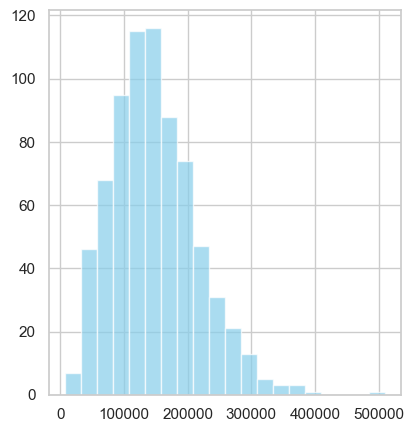

In [1479]:
import matplotlib.pyplot as plt

# Visualizzare le distribuzioni dei valori di "salary" nel training set e nel test set
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.hist(X_train_dataset, bins = 20, color = "skyblue", alpha = 0.7)
plt.title(f"Distribuzione di {salary} nel Training Set del Dataset")
plt.xlabel("Salary")
plt.ylabel("Frequenza")

plt.subplot(1, 2, 2)
plt.hist(X_test_dataset, bins = 20, color = "salmon", alpha = 0.7)
plt.title(f"Distribuzione di {salary} nel Test Set del Dataset")
plt.xlabel("Salary")
plt.ylabel("Frequenza")

plt.tight_layout()
plt.show()

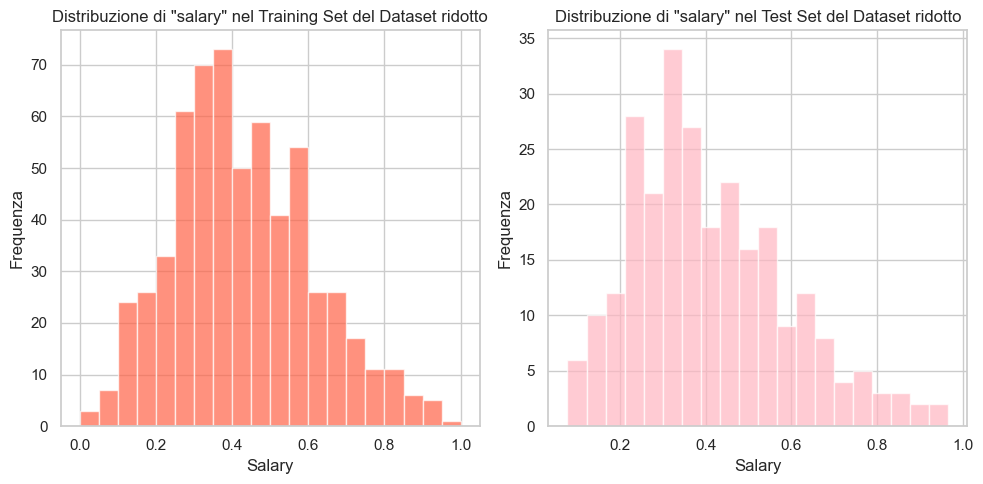

In [ ]:
import matplotlib.pyplot as plt

# Visualizzare le distribuzioni dei valori di "salary" nel training set e nel test set
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.hist(X_train_dataset_ridotto, bins = 20, color = "tomato", alpha = 0.7)
plt.title(f"Distribuzione di {salary} nel Training Set del Dataset ridotto")
plt.xlabel("Salary")
plt.ylabel("Frequenza")

plt.subplot(1, 2, 2)
plt.hist(X_test_dataset_ridotto, bins = 20, color = "lightpink", alpha = 0.7)
plt.title(f"Distribuzione di {salary} nel Test Set del Dataset ridotto")
plt.xlabel("Salary")
plt.ylabel("Frequenza")

plt.tight_layout()
plt.show()

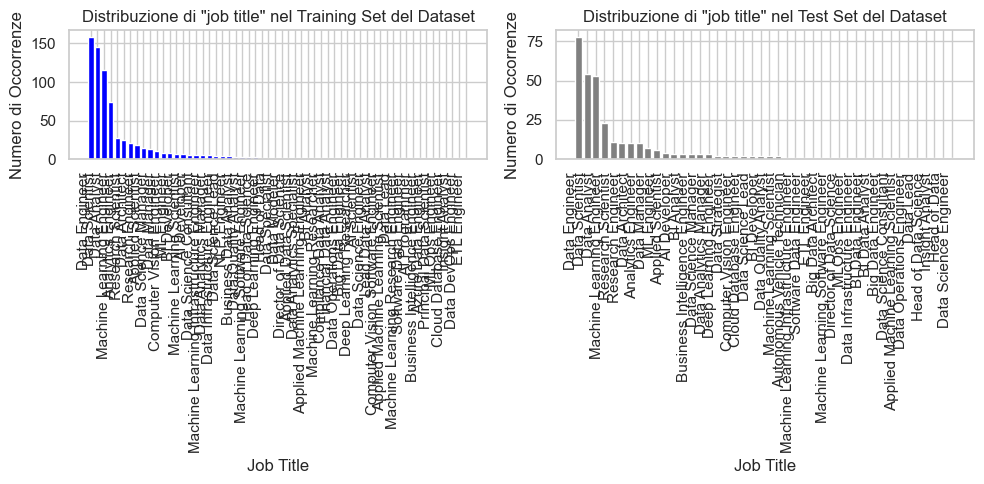

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.bar(y_train_dataset.value_counts().index, y_train_dataset.value_counts().values, color = "blue")
plt.title(f"Distribuzione di {salary} nel Training Set del Dataset")
plt.xlabel("Job Title")
plt.ylabel("Numero di Occorrenze")
plt.xticks(rotation = 90, ha = "right")

plt.subplot(1, 2, 2)
plt.bar(y_test_dataset.value_counts().index, y_test_dataset.value_counts().values, color = "grey")
plt.titlef(f"Distribuzione di {salary} nel Test Set del Dataset")
plt.xlabel("Job Title")
plt.ylabel("Numero di Occorrenze")

plt.xticks(rotation = 90, ha = "right")
plt.tight_layout()
plt.show()

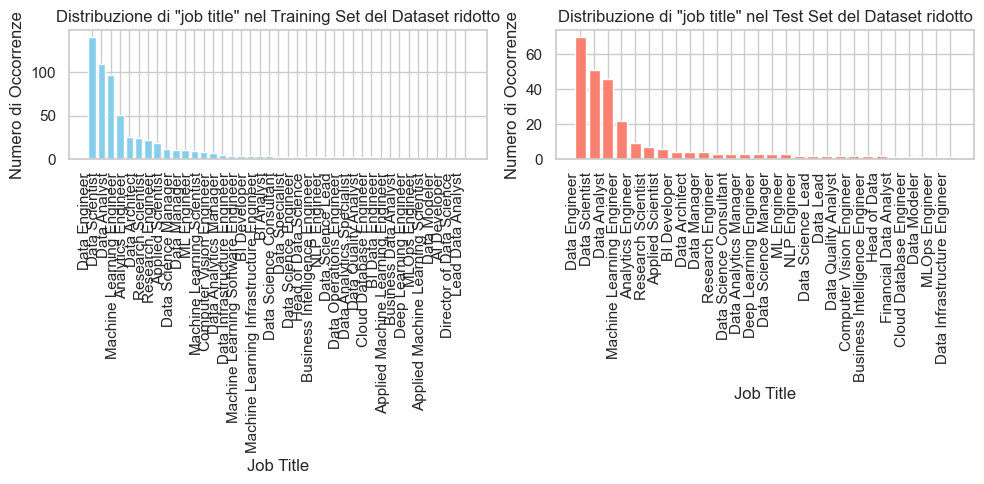

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.bar(y_train_dataset_ridotto.value_counts().index, y_train_dataset_ridotto.value_counts().values, color = "skyblue")
plt.title(f"Distribuzione di {salary} nel Training Set del Dataset ridotto")
plt.xlabel("Job Title")
plt.ylabel("Numero di Occorrenze")
plt.xticks(rotation = 90, ha = "right")

plt.subplot(1, 2, 2)
plt.bar(y_test_dataset_ridotto.value_counts().index, y_test_dataset_ridotto.value_counts().values, color = "salmon")
plt.title(f"Distribuzione di {salary} nel Test Set del Dataset ridotto")
plt.xlabel("Job Title")
plt.ylabel("Numero di Occorrenze")

plt.xticks(rotation = 90, ha = "right")
plt.tight_layout()
plt.show()

## FASE 11: SVILUPPO DEL MODELLO (ALGORITMO) CON LINEAR REGRESSION

In [ ]:
dataset

experience_level                  job_title    salary company_location  \
0                  SE   Principal Data Scientist  0.145129               ES   
1                  MI                ML Engineer  0.045726               US   
2                  MI                ML Engineer  0.036779               US   
3                  SE             Data Scientist  0.333996               CA   
4                  SE             Data Scientist  0.224652               CA   
...               ...                        ...       ...              ...   
1809               SE              Data Engineer  0.347913               US   
1814               SE  Machine Learning Engineer  0.505964               US   
1815               SE  Machine Learning Engineer  0.253479               US   
1817               MI             Data Scientist  0.244533               US   
1818               MI             Data Scientist  0.165010               US   

     company_size employment_type  
0               L              FT  
1               S              CT  
2               S              CT  
3               M              FT  
4               M              FT  
...           ...             ...  
1809            M              FT  
1814            L              FT  
1815            L              FT  
1817            M              FT  
1818            M              FT  

[1054 rows x 6 columns]

In [ ]:
dataset_encoding

salary company_size employment_type  experience_level_EN  \
0     0.145129            L              FT                    0   
1     0.045726            S              CT                    0   
2     0.036779            S              CT                    0   
3     0.333996            M              FT                    0   
4     0.224652            M              FT                    0   
...        ...          ...             ...                  ...   
1809  0.347913            M              FT                    0   
1814  0.505964            L              FT                    0   
1815  0.253479            L              FT                    0   
1817  0.244533            M              FT                    0   
1818  0.165010            M              FT                    0   

      experience_level_EX  experience_level_MI  experience_level_SE  \
0                       0                    0                    1   
1                       0                    1                    0   
2                       0                    1                    0   
3                       0                    0                    1   
4                       0                    0                    1   
...                   ...                  ...                  ...   
1809                    0                    0                    1   
1814                    0                    0                    1   
1815                    0                    0                    1   
1817                    0                    1                    0   
1818                    0                    1                    0   

      job_title_AI Developer  job_title_AI Programmer  job_title_AI Scientist  \
0                          0                        0                       0   
1                          0                        0                       0   
2                          0                        0                       0   
3                          0                        0                       0   
4                          0                        0                       0   
...                      ...                      ...                     ...   
1809                       0                        0                       0   
1814                       0                        0                       0   
1815                       0                        0                       0   
1817                       0                        0                       0   
1818                       0                        0                       0   

      ...  company_location_NG  company_location_NL  company_location_PT  \
0     ...                    0                    0                    0   
1     ...                    0                    0                    0   
2     ...                    0                    0                    0   
3     ...                    0                    0                    0   
4     ...                    0                    0                    0   
...   ...                  ...                  ...                  ...   
1809  ...                    0                    0                    0   
1814  ...                    0                    0                    0   
1815  ...                    0                    0                    0   
1817  ...                    0                    0                    0   
1818  ...                    0                    0                    0   

      company_location_RO  company_location_SE  company_location_SG  \
0                       0                    0                    0   
1                       0                    0                    0   
2                       0                    0                    0   
3                       0                    0                    0   
4                       0                    0                    0   
...                   ... 

In [ ]:
dataset_ridotto


experience_level                  job_title    salary company_location  \
1                  MI                ML Engineer  0.014308               US   
2                  MI                ML Engineer  0.000000               US   
5                  SE          Applied Scientist  0.625437               US   
6                  SE          Applied Scientist  0.351351               US   
9                  SE             Data Scientist  0.386645               US   
...               ...                        ...       ...              ...   
1809               SE              Data Engineer  0.497615               US   
1814               SE  Machine Learning Engineer  0.750397               US   
1815               SE  Machine Learning Engineer  0.346582               US   
1817               MI             Data Scientist  0.332273               US   
1818               MI             Data Scientist  0.205087               US   

     company_size employment_type  
1               S              CT  
2               S              CT  
5               L              FT  
6               L              FT  
9               M              FT  
...           ...             ...  
1809            M              FT  
1814            L              FT  
1815            L              FT  
1817            M              FT  
1818            M              FT  

[864 rows x 6 columns]

In [ ]:
dataset_ridotto_encoding

salary  experience_level_EN  experience_level_EX  experience_level_MI  \
1     0.014308                    0                    0                    1   
2     0.000000                    0                    0                    1   
5     0.625437                    0                    0                    0   
6     0.351351                    0                    0                    0   
9     0.386645                    0                    0                    0   
...        ...                  ...                  ...                  ...   
1809  0.497615                    0                    0                    0   
1814  0.750397                    0                    0                    0   
1815  0.346582                    0                    0                    0   
1817  0.332273                    0                    0                    1   
1818  0.205087                    0                    0                    1   

      experience_level_SE  job_title_AI Developer  \
1                       0                       0   
2                       0                       0   
5                       1                       0   
6                       1                       0   
9                       1                       0   
...                   ...                     ...   
1809                    1                       0   
1814                    1                       0   
1815                    1                       0   
1817                    0                       0   
1818                    0                       0   

      job_title_Analytics Engineer  \
1                                0   
2                                0   
5                                0   
6                                0   
9                                0   
...                            ...   
1809                             0   
1814                             0   
1815                             0   
1817                             0   
1818                             0   

      job_title_Applied Machine Learning Engineer  \
1                                               0   
2                                               0   
5                                               0   
6                                               0   
9                                               0   
...                                           ...   
1809                                            0   
1814                                            0   
1815                                            0   
1817                                            0   
1818                                            0   

      job_title_Applied Machine Learning Scientist  \
1                                                0   
2                                                0   
5                                                0   
6                                                0   
9                                                0   
...                                            ...   
1809                                             0   
1814                                             0   
1815                                             0   
1817                                             0   
1818                                             0   

      job_title_Applied Scientist  ...  \
1                               0  ...   
2                               0  ...   
5                               1  ...   
6                               1  ...   
9                               0  ...   
...                           ...  ...   
1809                            0  ...   
1814                            0  ...   
1815                            0  ...   
1817                            0  ...   
1818                            0  ...   

      job_title_Machine Learning Software Engineer  job_title_NLP Engineer  \
1                                                0                      

### IMPORTAZIONE DELLE LIBRERIE NECESSARIE E LO SPLITTING DEL DATASET RIDOTTO CON L'ENCODING

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns

model_linear = LinearRegression()
Y = dataset_ridotto_encoding["salary"] # Variabile target
X = dataset_ridotto_encoding.drop(columns = ["salary"]) # Elimina la Feature "salary"
# Suddividere il dataset in training set (70%) e test set (30%) formando due DataSet
X_train_dataset_ridotto_encoding,X_test_dataset_ridotto_encoding,y_train_dataset_ridotto_encoding,y_test_dataset_ridotto_encoding = train_test_split(X,Y,test_size=0.3,random_state=42)
# Stampare le dimensioni dei training set e test set
print("Dimensioni del Training Set (valori di \"salary\" e valori \"job_title\"):", X_train_dataset_ridotto_encoding.shape, y_train_dataset_ridotto_encoding.shape) # shape = dimensione dei DataSet di Training
print("Dimensioni del Test Set (valori di \"salary\" e valori \"job_title\"):", X_test_dataset_ridotto_encoding.shape, y_test_dataset_ridotto_encoding.shape) # shape = dimensione dei DataSet di Test

Dimensioni del Training Set (valori di "salary" e valori "job_title"): (604, 54) (604,)
Dimensioni del Test Set (valori di "salary" e valori "job_title"): (260, 54) (260,)


In [ ]:
X

experience_level_EN  experience_level_EX  experience_level_MI  \
1                       0                    0                    1   
2                       0                    0                    1   
5                       0                    0                    0   
6                       0                    0                    0   
9                       0                    0                    0   
...                   ...                  ...                  ...   
1809                    0                    0                    0   
1814                    0                    0                    0   
1815                    0                    0                    0   
1817                    0                    0                    1   
1818                    0                    0                    1   

      experience_level_SE  job_title_AI Developer  \
1                       0                       0   
2                       0                       0   
5                       1                       0   
6                       1                       0   
9                       1                       0   
...                   ...                     ...   
1809                    1                       0   
1814                    1                       0   
1815                    1                       0   
1817                    0                       0   
1818                    0                       0   

      job_title_Analytics Engineer  \
1                                0   
2                                0   
5                                0   
6                                0   
9                                0   
...                            ...   
1809                             0   
1814                             0   
1815                             0   
1817                             0   
1818                             0   

      job_title_Applied Machine Learning Engineer  \
1                                               0   
2                                               0   
5                                               0   
6                                               0   
9                                               0   
...                                           ...   
1809                                            0   
1814                                            0   
1815                                            0   
1817                                            0   
1818                                            0   

      job_title_Applied Machine Learning Scientist  \
1                                                0   
2                                                0   
5                                                0   
6                                                0   
9                                                0   
...                                            ...   
1809                                             0   
1814                                             0   
1815                                             0   
1817                                             0   
1818                                             0   

      job_title_Applied Scientist  job_title_BI Analyst  ...  \
1                               0                     0  ...   
2                               0                     0  ...   
5                               1                     0  ...   
6                               1                     0  ...   
9                               0                     0  ...   
...                           ...                   ...  ...   
1809                            0                     0  ...   
1814                            0                     0  ...   
1815                            0                     0  ...   
1817                            0                     0  ...   
1818                            0                     0  ...   

    

In [ ]:
Y

1       0.014308
2       0.000000
5       0.625437
6       0.351351
9       0.386645
          ...   
1809    0.497615
1814    0.750397
1815    0.346582
1817    0.332273
1818    0.205087
Name: salary, Length: 864, dtype: float64

In [ ]:
X_train_dataset_ridotto_encoding

experience_level_EN  experience_level_EX  experience_level_MI  \
1774                    0                    0                    0   
267                     0                    0                    0   
399                     0                    0                    0   
758                     0                    0                    0   
808                     0                    0                    0   
...                   ...                  ...                  ...   
131                     0                    0                    0   
385                     0                    0                    0   
1814                    0                    0                    0   
684                     0                    0                    1   
127                     0                    0                    0   

      experience_level_SE  job_title_AI Developer  \
1774                    1                       0   
267                     1                       0   
399                     1                       0   
758                     1                       0   
808                     1                       0   
...                   ...                     ...   
131                     1                       0   
385                     1                       0   
1814                    1                       0   
684                     0                       0   
127                     1                       0   

      job_title_Analytics Engineer  \
1774                             0   
267                              0   
399                              0   
758                              0   
808                              0   
...                            ...   
131                              0   
385                              0   
1814                             0   
684                              0   
127                              0   

      job_title_Applied Machine Learning Engineer  \
1774                                            0   
267                                             0   
399                                             0   
758                                             0   
808                                             0   
...                                           ...   
131                                             0   
385                                             0   
1814                                            0   
684                                             0   
127                                             0   

      job_title_Applied Machine Learning Scientist  \
1774                                             0   
267                                              0   
399                                              0   
758                                              0   
808                                              0   
...                                            ...   
131                                              0   
385                                              0   
1814                                             0   
684                                              0   
127                                              0   

      job_title_Applied Scientist  job_title_BI Analyst  ...  \
1774                            0                     0  ...   
267                             0                     0  ...   
399                             0                     0  ...   
758                             0                     0  ...   
808                             0                     1  ...   
...                           ...                   ...  ...   
131                             0                     0  ...   
385                             0                     0  ...   
1814                            0                     0  ...   
684                             0                     0  ...   
127                             0                     0  ...   

    

In [ ]:
X_test_dataset_ridotto_encoding

experience_level_EN  experience_level_EX  experience_level_MI  \
272                     0                    0                    0   
1449                    0                    0                    0   
1186                    0                    0                    0   
457                     1                    0                    0   
35                      0                    0                    1   
...                   ...                  ...                  ...   
358                     0                    0                    0   
690                     0                    0                    1   
177                     0                    0                    0   
228                     0                    1                    0   
43                      1                    0                    0   

      experience_level_SE  job_title_AI Developer  \
272                     1                       0   
1449                    1                       0   
1186                    1                       0   
457                     0                       0   
35                      0                       0   
...                   ...                     ...   
358                     1                       0   
690                     0                       0   
177                     1                       0   
228                     0                       0   
43                      0                       0   

      job_title_Analytics Engineer  \
272                              0   
1449                             0   
1186                             0   
457                              0   
35                               0   
...                            ...   
358                              0   
690                              0   
177                              0   
228                              0   
43                               0   

      job_title_Applied Machine Learning Engineer  \
272                                             0   
1449                                            0   
1186                                            0   
457                                             0   
35                                              0   
...                                           ...   
358                                             0   
690                                             0   
177                                             0   
228                                             0   
43                                              0   

      job_title_Applied Machine Learning Scientist  \
272                                              0   
1449                                             0   
1186                                             0   
457                                              0   
35                                               0   
...                                            ...   
358                                              0   
690                                              0   
177                                              0   
228                                              0   
43                                               0   

      job_title_Applied Scientist  job_title_BI Analyst  ...  \
272                             1                     0  ...   
1449                            0                     0  ...   
1186                            0                     0  ...   
457                             0                     0  ...   
35                              0                     0  ...   
...                           ...                   ...  ...   
358                             0                     0  ...   
690                             0                     0  ...   
177                             0                     0  ...   
228                             0                     0  ...   
43                              1                     0  ...   

    

In [ ]:
y_train_dataset_ridotto_encoding

1774    0.666137
267     0.312242
399     0.252782
758     0.270588
808     0.427663
          ...   
131     0.433386
385     0.420509
1814    0.750397
684     0.275040
127     0.720191
Name: salary, Length: 604, dtype: float64

In [ ]:
y_test_dataset_ridotto_encoding

272     0.745628
1449    0.360890
1186    0.364070
457     0.213672
35      0.435612
          ...   
358     0.885533
690     0.236884
177     0.685215
228     0.966614
43      0.270843
Name: salary, Length: 260, dtype: float64

### TRAINING (ALLENAMENTO) DEL MODELLO LINEAR REGRESSION

In [ ]:
model_linear.fit(X_train_dataset_ridotto_encoding,y_train_dataset_ridotto_encoding) # ".fit" è il comando per addestrare il modello
predictions = model_linear.predict(X_test_dataset_ridotto_encoding) # Fa una previsione su su "X_test" usando un modello di regressione lineare

In [ ]:
coefficients = model_linear.coef_
intercept = model_linear.intercept_
# Costruzione della funzione lineare
features = X_test_dataset_ridotto_encoding.columns
linear_function = "y = "
for i, feature in enumerate(features):
    linear_function += f"{coefficients[i]:.2f} * {feature} + "
linear_function += f"{intercept:.2f}"

print("Funzione Lineare del Modello:")
print(linear_function)

Funzione Lineare del Modello:
y = 464565877809.52 * experience_level_EN + 464565877809.75 * experience_level_EX + 464565877809.61 * experience_level_MI + 464565877809.69 * experience_level_SE + -3022561546431.80 * job_title_AI Developer + -3022561546431.94 * job_title_Analytics Engineer + -3022561546432.01 * job_title_Applied Machine Learning Engineer + -3022561546432.23 * job_title_Applied Machine Learning Scientist + -3022561546431.85 * job_title_Applied Scientist + -3022561546432.06 * job_title_BI Analyst + -3022561546432.14 * job_title_BI Data Engineer + -3022561546432.08 * job_title_BI Developer + -3022561546432.10 * job_title_Business Data Analyst + -3022561546431.86 * job_title_Business Intelligence Engineer + -3022561546432.07 * job_title_Cloud Database Engineer + -3022561546431.79 * job_title_Computer Vision Engineer + -3022561546432.05 * job_title_Data Analyst + -3022561546431.98 * job_title_Data Analytics Manager + -3022561546432.17 * job_title_Data Analytics Specialist + -3

In [ ]:
errore_linear_regression=predictions-y_test_dataset_ridotto_encoding # Si ottiene una sorta di "differenza" o "residuo". Questo può essere utile per capire quanto il modello si discosta o si avvicina ai valori reali
errore_linear_regression

272    -1.919170e-01
1449    1.146956e-01
1186    1.632738e-01
457     6.220641e-02
35     -6.598318e-02
            ...     
358    -3.581888e-01
690     1.654598e-01
177    -2.418553e-01
228     3.192714e+12
43      1.158761e-01
Name: salary, Length: 260, dtype: float64

### MAE E MSE DEL MODELLO LINEAR REGRESSION

In [ ]:
# Calcolo della Mean Squared Error (MSE)
RMS = np.sqrt(mean_squared_error(y_test_dataset_ridotto_encoding, predictions))
print(f"Il valore di RMS (Mean Squared Error) è: {RMS}")
# Calcolo della Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_dataset_ridotto_encoding,predictions)
print(f"Il valore di MAE (Mean Absolute Error) è: {MAE}")

Il valore di RMS (Mean Squared Error) è: 943750821316.1008
Il valore di MAE (Mean Absolute Error) è: 113593790199.42207


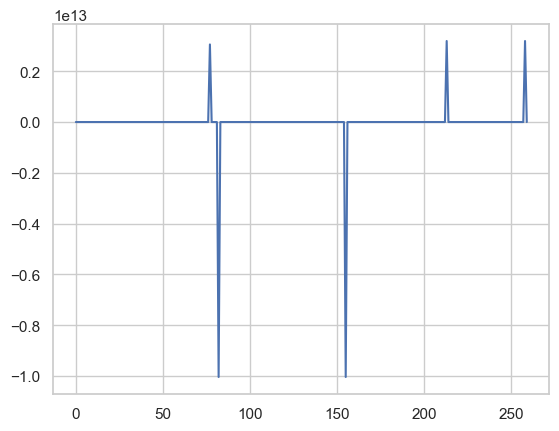

In [ ]:
plt.plot((errore_linear_regression).tolist())

In [ ]:
# DECISION TREE

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train_dataset_ridotto_encoding,y_train_dataset_ridotto_encoding)

tree_reg_train_preds = tree_reg.predict(X_test_dataset_ridotto_encoding)

rms_decision_tree = np.sqrt(mean_squared_error(y_test_dataset_ridotto_encoding, tree_reg_train_preds))
print(f"Il valore di RMS (Mean Squared Error) è: {rms_decision_tree }")
# Calcolo della Mean Absolute Error (MAE)
mae_decision_tree = mean_absolute_error(y_test_dataset_ridotto_encoding,tree_reg_train_preds)
print(f"Il valore di MAE (Mean Absolute Error) è: {mae_decision_tree }")


Il valore di RMS (Mean Squared Error) è: 0.1610500424018693
Il valore di MAE (Mean Absolute Error) è: 0.12808982340623268


In [ ]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train_dataset_ridotto_encoding, y_train_dataset_ridotto_encoding)

forest_reg_train_preds = forest_reg.predict(X_test_dataset_ridotto_encoding)

rms_random_forest = np.sqrt(mean_squared_error(y_test_dataset_ridotto_encoding, forest_reg_train_preds))
print(f"Il valore di RMS (Mean Squared Error) è: {rms_random_forest }")
# Calcolo della Mean Absolute Error (MAE)
mae_random_forest = mean_absolute_error(y_test_dataset_ridotto_encoding,forest_reg_train_preds)
print(f"Il valore di MAE (Mean Absolute Error) è: {mae_random_forest }")

Il valore di RMS (Mean Squared Error) è: 0.15764867334791058
Il valore di MAE (Mean Absolute Error) è: 0.12583871296933563


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

nn = tf.keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(X_train_dataset_ridotto_encoding.shape[-1],)),
    layers.Dense(64, activation="relu"),
    layers.Dense(1),
])

nn.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae","mse"]
)

nn.summary()

history = nn.fit(
    X_train_dataset_ridotto_encoding,
    y_train_dataset_ridotto_encoding,
    epochs=100,
    verbose=False
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 128)            │         7,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,361 (60.00 KB)

 Trainable params: 15,361 (60.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
nn.evaluate(X_test_dataset_ridotto_encoding, y_test_dataset_ridotto_encoding)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0246 - mae: 0.1283 - mse: 0.0246  


[0.025771742686629295, 0.12845492362976074, 0.025771742686629295]

In [ ]:
# Numero di fold per la cross-validation
n_splits = 3

# Inizializza l'oggetto KFold
kf = KFold(n_splits=n_splits)

# List per memorizzare gli errori di ogni fold
mse_scores = []

# Itera attraverso i fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Addestra il modello su questo fold
    model.fit(X_train, y_train)
    
    # Valuta il modello sul fold di test
    y_pred = model.predict(X_test)
    
    # Calcola l'errore (in questo caso MSE)
    mse = mean_squared_error(y_test, y_pred)
    
    # Aggiungi l'errore alla lista
    mse_scores.append(mse)

# Calcola la media degli errori MSE
mean_mse = np.mean(mse_scores)

# Calcola l'RMSE medio (radice quadrata della media degli MSE)
mean_rmse = np.sqrt(mean_mse)

print("Mean RMSE:", mean_rmse)

# FASE 12: GRAFICO DELLE PAROLE PIÙ PRESENTI NEL DATASET

In [ ]:
dataset

experience_level                  job_title  salary company_location
0                  SE   Principal Data Scientist   80000               ES
1                  MI                ML Engineer   30000               US
2                  MI                ML Engineer   25500               US
3                  SE             Data Scientist  175000               CA
4                  SE             Data Scientist  120000               CA
...               ...                        ...     ...              ...
1809               SE              Data Engineer  182000               US
1814               SE  Machine Learning Engineer  261500               US
1815               SE  Machine Learning Engineer  134500               US
1817               MI             Data Scientist  130000               US
1818               MI             Data Scientist   90000               US

[1049 rows x 4 columns]

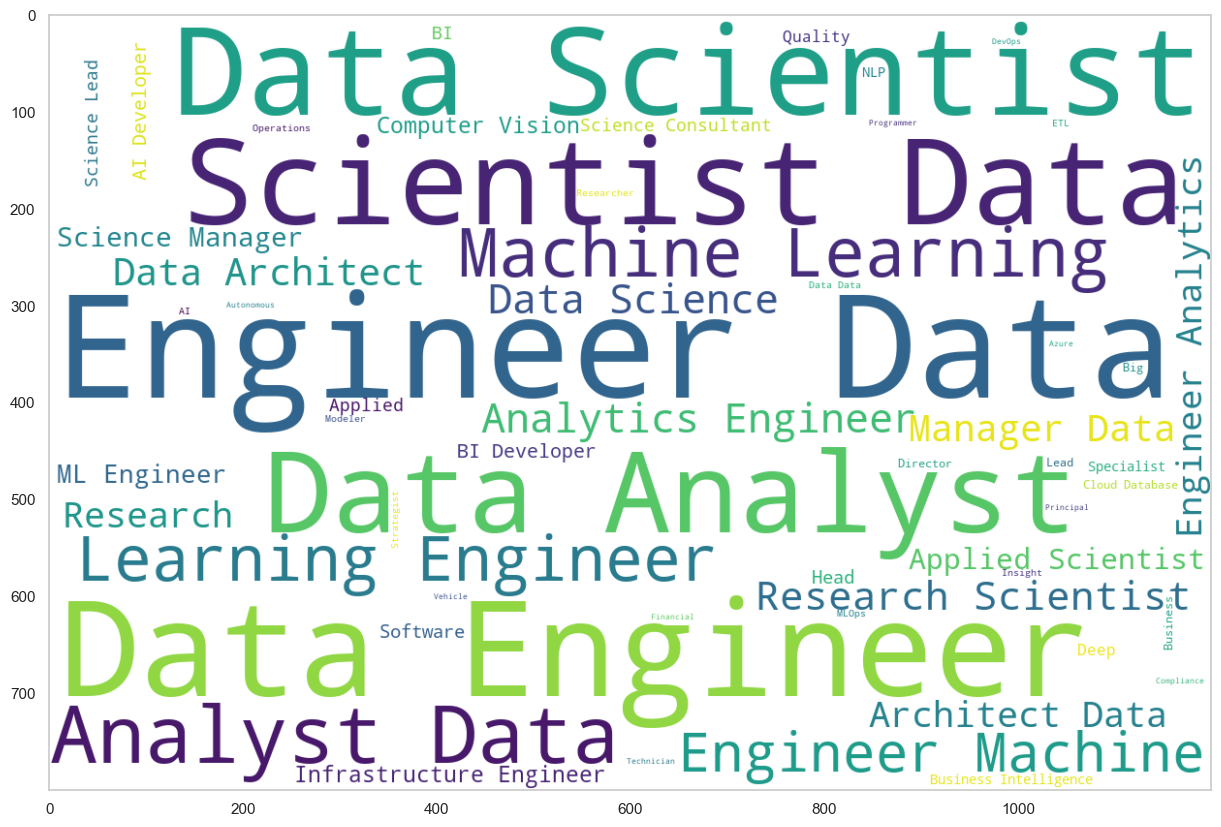

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assicurati di aver caricato correttamente il tuo dataframe e di riferirti alla colonna corretta
# Supponendo che il dataframe sia chiamato df e la colonna contenente i nomi sia 'name'

world = dataset['job_title'] 

plt.figure(figsize=(15, 20))
wordcloud = WordCloud(min_font_size=3, max_words=2500, width=1200, height=800, background_color='white').generate(" ".join(world))
plt.imshow(wordcloud, interpolation='bilinear')
plt.grid(False)
plt.show()

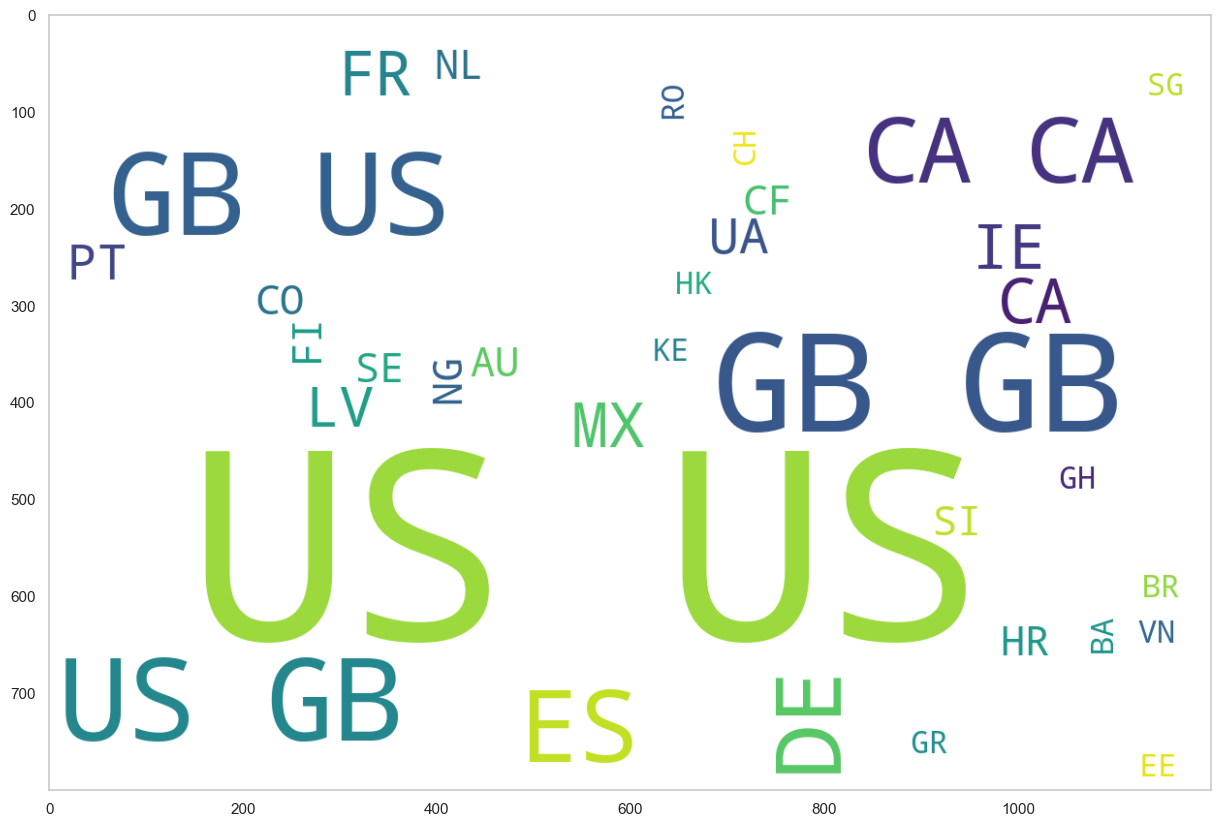

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assicurati di aver caricato correttamente il tuo dataframe e di riferirti alla colonna corretta
# Supponendo che il dataframe sia chiamato df e la colonna contenente i nomi sia 'name'

world = dataset['company_location'] 

plt.figure(figsize=(15, 20))
wordcloud = WordCloud(min_font_size=3, max_words=2500, width=1200, height=800, background_color='white').generate(" ".join(world))
plt.imshow(wordcloud, interpolation='bilinear')
plt.grid(False)
plt.show()

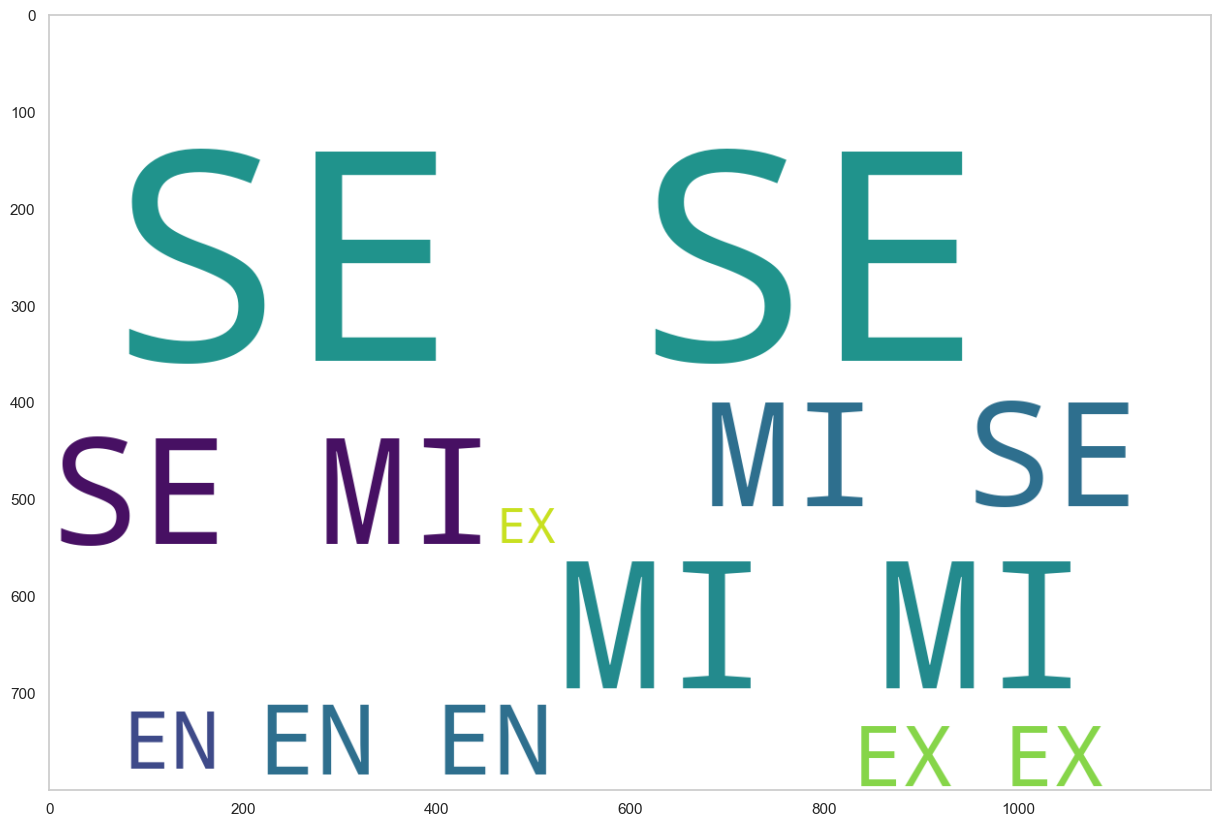

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assicurati di aver caricato correttamente il tuo dataframe e di riferirti alla colonna corretta
# Supponendo che il dataframe sia chiamato df e la colonna contenente i nomi sia 'name'

world = dataset['experience_level'] 

plt.figure(figsize=(15, 20))
wordcloud = WordCloud(min_font_size=3, max_words=2500, width=1200, height=800, background_color='white').generate(" ".join(world))
plt.imshow(wordcloud, interpolation='bilinear')
plt.grid(False)
plt.show()

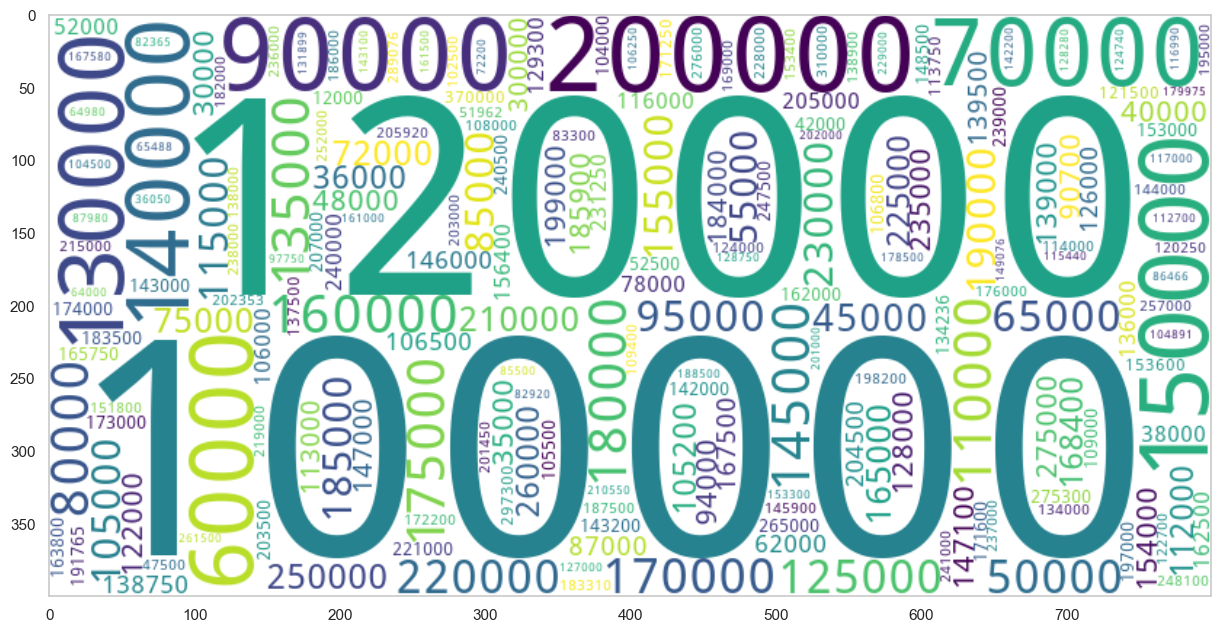

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Converti i valori numerici della colonna 'salary' in stringhe
dataset['salary'] = dataset['salary'].astype(str)

# Conta le frequenze dei valori nella colonna 'salary'
frequenze_salario = dataset['salary'].value_counts().to_dict()

plt.figure(figsize=(15, 20))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frequenze_salario)
plt.imshow(wordcloud, interpolation='bilinear')
plt.grid(False)
plt.show()